In [2]:
%matplotlib inline
from context import spew
from scipy.optimize import curve_fit, minimize
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import scipy.ndimage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import colors as mcolors
from matplotlib.collections import PolyCollection
import pandas as pd
import scipy.stats as stats

plt.style.use('ggplot')


rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)



In [5]:
param = "plume_height"
label = "H"
units = "km"
trial = 7
vals = np.linspace(10000, 40000, 21)

vals = [int(val) for val in vals]

def disp_func(col):
    return col / 1000

eruptions = dict()

In [6]:
for v in vals:
    filename = '../data/%s_trial_%d/%s_trial_%d.txt' % (
        param, trial, param, v)
    eruptions[v] = spew.core.eruption.Eruption(data=filename, vent=Point(532290, 1382690), test=False)
    eruptions[v].df = eruptions[v].df[(eruptions[v].df["MassArea"] != 0)
                                      & (eruptions[v].df["MassArea"] > 0.1)
                                      & (eruptions[v].df["radius"] < 40000)]
phis = eruptions[vals[0]].phi_labels
rows = int(len(phis) / 2)

In [7]:
centroids = eruptions[vals[0]].phi_centroids

In [8]:
display(eruptions[40000].df)

Easting  Northing  Elevation  MassArea  [-4.5,-4.07143)  \
2917   525487   1421887          0   16.5480     2.390240e-19   
2918   527487   1421887          0   16.9539     4.556780e-19   
2919   529487   1421887          0   17.2288     6.954510e-19   
2920   531487   1421887          0   17.3620     8.497920e-19   
2921   533487   1421887          0   17.3481     8.314170e-19   
2922   535487   1421887          0   17.1877     6.513030e-19   
2923   537487   1421887          0   16.8872     4.084870e-19   
2924   539487   1421887          0   16.4583     2.050940e-19   
3013   519487   1419887          0   17.1653     6.348750e-19   
3014   521487   1419887          0   18.0588     2.356850e-18   
3015   523487   1419887          0   18.8590     7.002020e-18   
3016   525487   1419887          0   19.5374     1.665270e-17   
3017   527487   1419887          0   20.0678     3.171150e-17   
3018   529487   1419887          0   20.4282     4.836160e-17   
3019   531487   1419887          0   20.6031     5.907320e-17   
3020   533487   1419887          0   20.5848     5.779800e-17   
3021   535487   1419887          0   20.3741     4.529650e-17   
3022   537487   1419887          0   19.9803     2.843250e-17   
3023   539487   1419887          0   19.4203     1.429240e-17   
3024   541487   1419887          0   18.7169     5.752370e-18   
3025   543487   1419887          0   17.8971     1.853260e-18   
3026   545487   1419887          0   16.9893     4.778050e-19   
3109   513487   1417887          0   16.3783     1.824960e-19   
3110   515487   1417887          0   17.6528     1.320600e-18   
3111   517487   1417887          0   18.9227     7.641290e-18   
3112   519487   1417887          0   20.1559     3.536840e-17   
3113   521487   1417887          0   21.3154     1.310040e-16   
3114   523487   1417887          0   22.3616     3.884430e-16   
3115   525487   1417887          0   23.2542     9.223290e-16   
3116   527487   1417887          0   23.9556     1.754210e-15   
...       ...       ...        ...       ...              ...   
6590   545487   1347887          0   20.5510     5.716720e-17   
6591   547487   1347887          0   19.2466     1.182670e-17   
6592   549487   1347887          0   17.9130     1.957110e-18   
6593   551487   1347887          0   16.5828     2.589560e-19   
6675   517487   1345887          0   16.6782     3.073300e-19   
6676   519487   1345887          0   17.6826     1.425420e-18   
6677   521487   1345887          0   18.6207     5.289450e-18   
6678   523487   1345887          0   19.4620     1.570900e-17   
6679   525487   1345887          0   20.1760     3.734950e-17   
6680   527487   1345887          0   20.7347     7.110830e-17   
6681   529487   1345887          0   21.1147     1.084280e-16   
6682   531487   1345887          0   21.2992     1.324340e-16   
6683   533487   1345887          0   21.2798     1.295760e-16   
6684   535487   1345887          0   21.0576     1.015580e-16   
6685   537487   1345887          0   20.6425     6.375800e-17   
6686   539487   1345887          0   20.0526     3.205720e-17   
6687   541487   1345887          0   19.3125     1.290620e-17   
6688   543487   1345887          0   18.4507     4.159550e-18   
6689   545487   1345887          0   17.4980     1.072850e-18   
6690   547487   1345887          0   16.4845     2.213790e-19   
6777   523487   1343887          0   16.5146     2.355200e-19   
6778   525487   1343887          0   17.0624     5.608030e-19   
6779   527487   1343887          0   17.4890     1.068910e-18   
6780   529487   1343887          0   17.7781     1.631140e-18   
6781   531487   1343887          0   17.9183     1.993010e-18   
6782   533487   1343887          0   17.9036     1.949930e-18   
6783   535487   1343887          0   17.7349     1.527620e-18   
6784   537487   1343887          0   17.4188     9.582410e-19   
6785   539487   1343887          0   16.9681     4.812170e-19   
6786   541487   1343887          0   16.3

c:\users\nmostert\envs\spew\lib\site-packages\scipy\optimize\_minimize.py:518: RuntimeWarning: Method Nelder-Mead cannot handle constraints nor bounds.
  RuntimeWarning)
c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


_______Phi:[-4.5,-4.07143) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.28327196 -0.00355283  1.61563844]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.15888183 -0.00352983  0.00310363]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.49619943 -0.00367439  0.41381048]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.64923322e+00 -3.80452456e-03  1.54088764e-04]


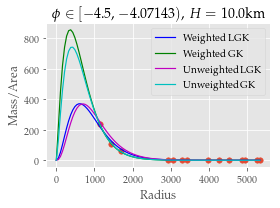

_______Phi:[-4.5,-4.07143) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.19615674 -0.00286329  1.5994625 ]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.25639932e+00 -3.09809588e-03  1.12303490e-03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.30620404 -0.00290135  0.76746329]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.79790291e+00 -3.37764902e-03  3.86177273e-05]


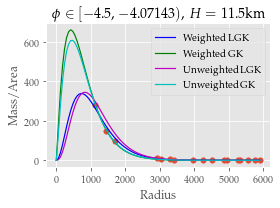

_______Phi:[-4.5,-4.07143) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.03580825e+00 -2.45069152e-03  3.32363050e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.04172148 -0.00270171  0.00356471]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.54732733e-01 -2.32488407e-03  5.05177747e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.51977799e+00 -2.95185646e-03  1.98296495e-04]


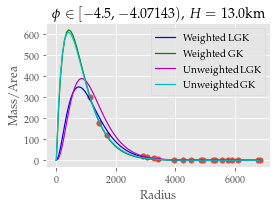

_______Phi:[-4.5,-4.07143) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.08595297 -0.00228724  2.00133616]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.99521794 -0.00240929  0.00351094]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.90084842e-01 -2.03648379e-03  5.86534557e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.19115108e+00 -2.53615159e-03  1.18668121e-03]


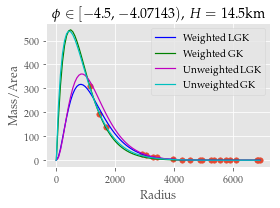

_______Phi:[-4.5,-4.07143) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.2892213  -0.00224785  0.46004871]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.86630744 -0.00218946  0.0068801 ]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.33727355e-01 -1.74622276e-03  1.27737244e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.02963273 -0.00229412  0.00295136]


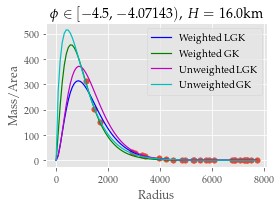

_______Phi:[-4.5,-4.07143) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.06197498 -0.00198862  1.68268665]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.8125488  -0.00200386  0.00789067]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.07599249e-01 -1.53731640e-03  2.41822006e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.03942985e+00 -2.10006888e-03  1.89444945e-03]


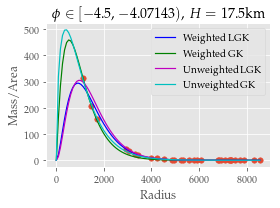

_______Phi:[-4.5,-4.07143) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.84274375e-01 -1.74506095e-03  4.36963103e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.5489514  -0.00178267  0.03893652]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.12477352e-01 -1.43797888e-03  2.03670721e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.99762436e+00 -1.92139983e-03  1.81722942e-03]


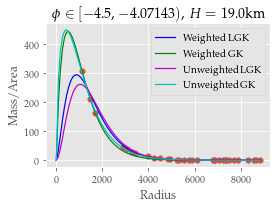

_______Phi:[-4.5,-4.07143) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.24265138e-01 -1.64147166e-03  5.78429029e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.38671385 -0.00162393  0.09961758]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.98971624e-01 -1.34751932e-03  1.96324691e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.92121257e+00 -1.77678250e-03  2.47722679e-03]


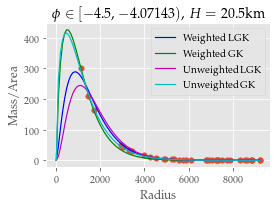

_______Phi:[-4.5,-4.07143) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.18367064e-01 -1.64557309e-03  2.91413923e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.31519526 -0.00151572  0.14155529]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.49386178e-01 -1.19820587e-03  4.63396345e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.83347367e+00 -1.65813670e-03  3.93202660e-03]


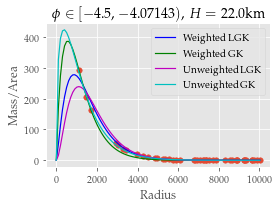

_______Phi:[-4.5,-4.07143) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.1362673  -0.00172854  0.67172859]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.173625   -0.00139455  0.32672693]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.63325867e-01 -1.13974505e-03  3.81721034e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.79793957e+00 -1.55007454e-03  4.03537899e-03]


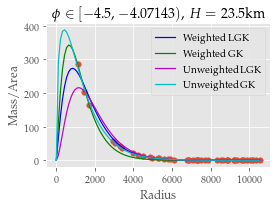

_______Phi:[-4.5,-4.07143) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.12824425e-01 -1.38134513e-03  8.70409316e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.06413375 -0.00129547  0.6162017 ]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.05093686e-01 -1.07053870e-03  5.21759075e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.77246686e+00 -1.46032043e-03  3.97599222e-03]


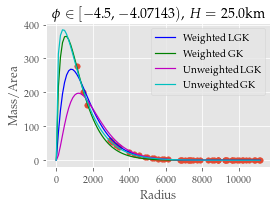

_______Phi:[-4.5,-4.07143) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.25536913e-01 -1.28507248e-03  1.39826360e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.0048653  -0.0012216   0.83140333]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.56366660e-01 -1.00607342e-03  6.60145007e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.76097704e+00 -1.38774318e-03  3.65645701e-03]


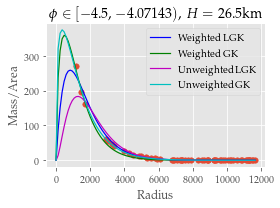

_______Phi:[-4.5,-4.07143) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.36909881e-01 -1.19044523e-03  2.26678639e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 9.15631406e-01 -1.14445094e-03  1.38654787e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.92584600e-01 -9.82262376e-04  4.76797180e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.66464159e+00 -1.30483335e-03  6.35159510e-03]


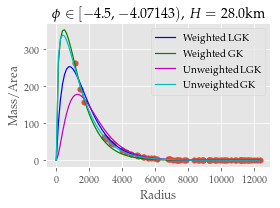

_______Phi:[-4.5,-4.07143) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.88705891e-01 -1.10073107e-03  2.79898115e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 8.13631681e-01 -1.07009014e-03  2.56404083e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.94524066e-01 -9.03503748e-04  8.56156330e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.60473741e+00 -1.23258755e-03  8.32964069e-03]


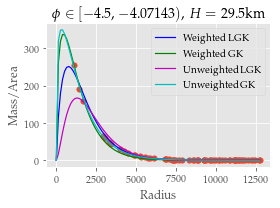

_______Phi:[-4.5,-4.07143) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.36182717e-01 -1.04567431e-03  3.68869466e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 7.60945466e-01 -1.01588645e-03  3.39202585e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.03572378e-01 -8.80367223e-04  7.59373597e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.54636905e+00 -1.17209066e-03  1.12814524e-02]


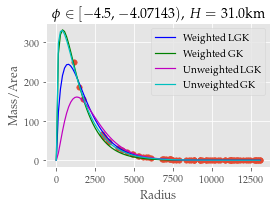

_______Phi:[-4.5,-4.07143) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.41106766e-01 -1.02206658e-03  3.37796909e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 7.24064202e-01 -9.70880475e-04  4.05692191e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.32343502e-01 -8.25328036e-04  1.15435340e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.57507150e+00 -1.13087993e-03  7.96398078e-03]


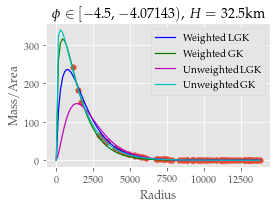

_______Phi:[-4.5,-4.07143) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.31243733e-01 -9.89478692e-04  3.36787306e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 6.53118021e-01 -9.17558987e-04  6.09454082e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.75705658e-01 -7.69507917e-04  1.55597828e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.45308522e+00 -1.06598152e-03  1.72590234e-02]


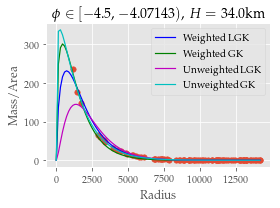

_______Phi:[-4.5,-4.07143) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.18754230e-01 -9.62168785e-04  3.47710978e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.98724003e-01 -8.73571853e-04  8.29461354e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.71708608e-01 -7.44418762e-04  1.50948597e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.40173505e+00 -1.01882007e-03  2.26061371e-02]


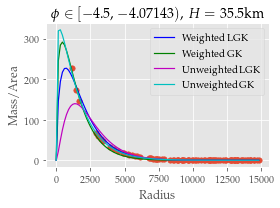

_______Phi:[-4.5,-4.07143) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.91141719e-01 -9.24469244e-04  3.94063866e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.56814740e-01 -8.36124983e-04  1.04178735e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.63881970e-01 -7.70234195e-04  7.85372685e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.41086154e+00 -9.84727527e-04  1.88314311e-02]


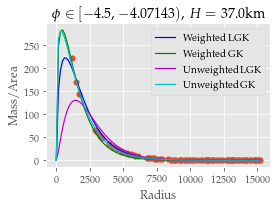

_______Phi:[-4.5,-4.07143) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.64790509e-01 -9.34943673e-04  2.30296664e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.36235559e-01 -8.07402392e-04  1.13618316e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.69485768e-01 -7.53926950e-04  7.22819793e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.40331553e+00 -9.53182549e-04  1.82199438e-02]


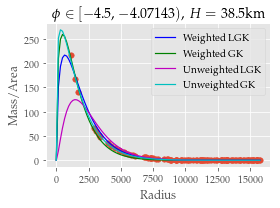

_______Phi:[-4.5,-4.07143) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.53703403e-01 -9.13923987e-04  2.36555845e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.02969288e-01 -7.75645086e-04  1.34215647e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.18486482e-01 -6.81282117e-04  1.88934904e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.38440142e+00 -9.19338383e-04  1.88425657e-02]


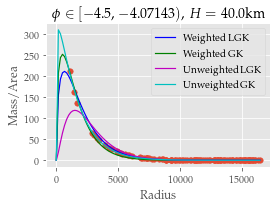

_______Phi:[-4.07143,-3.64286) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.19788613 -0.0026579   2.022461  ]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.37169683e+00 -3.40606292e-03  1.25975078e-03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.52239192 -0.00287352  0.26267028]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.80533683e+00 -3.66686333e-03  9.62672334e-05]


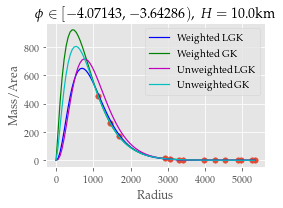

_______Phi:[-4.07143,-3.64286) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.87475624e-01 -2.22362528e-03  6.14509721e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.45288191e+00 -3.02633414e-03  4.97653894e-04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.24607276 -0.00238338  1.19081737]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.44052436e+00 -3.03187598e-03  5.53307538e-04]


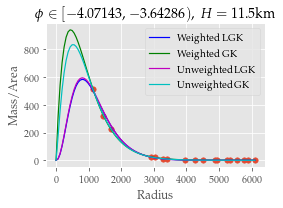

_______Phi:[-4.07143,-3.64286) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.22287425 -0.00221797  1.22256868]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.45148986e+00 -2.70290964e-03  3.50502370e-04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.07175073e+00 -2.07088144e-03  2.97755221e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.25933725e+00 -2.68953551e-03  1.57385087e-03]


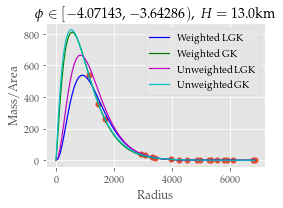

_______Phi:[-4.07143,-3.64286) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.19618601 -0.002055    1.24179943]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.14979000e+00 -2.36500496e-03  2.01852976e-03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.55726603e-01 -1.77435319e-03  9.86517329e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.03191609 -0.00237884  0.00570565]


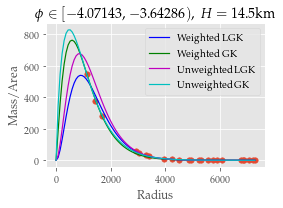

_______Phi:[-4.07143,-3.64286) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.26959969 -0.00200784  0.70637548]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.98289596 -0.00212426  0.00494442]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.06944815e-01 -1.62219821e-03  1.16870232e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.19949251e+00 -2.21497348e-03  1.25839464e-03]


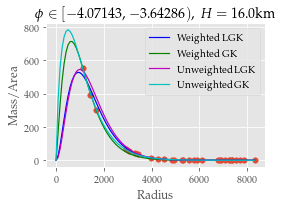

_______Phi:[-4.07143,-3.64286) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.10830664 -0.00179441  1.70076729]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.65530374 -0.00186246  0.03671065]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.25542586e-01 -1.42315881e-03  3.31605430e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.03484243e+00 -1.98014029e-03  2.77433398e-03]


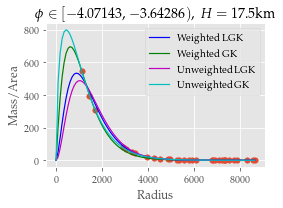

_______Phi:[-4.07143,-3.64286) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.14551935e-01 -1.52984891e-03  9.71461484e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.5062198  -0.00169564  0.08428324]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.19355588e-01 -1.34487899e-03  3.07804946e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.95187641e+00 -1.82763601e-03  3.97404869e-03]


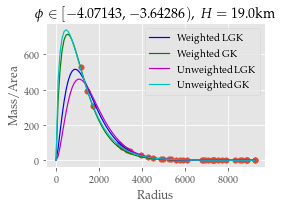

_______Phi:[-4.07143,-3.64286) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.04755272e-01 -1.52528355e-03  4.98045398e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.37181964 -0.00155554  0.18027283]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.14609038e-01 -1.27106430e-03  2.83248514e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.90246510e+00 -1.69714179e-03  4.45958926e-03]


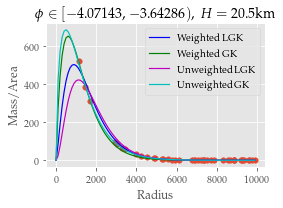

_______Phi:[-4.07143,-3.64286) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.40039870e-01 -1.37586644e-03  1.31296884e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.2275959  -0.00142799  0.4209994 ]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.36444456e-01 -1.18143556e-03  4.34296282e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.83231457e+00 -1.57649474e-03  5.86923506e-03]


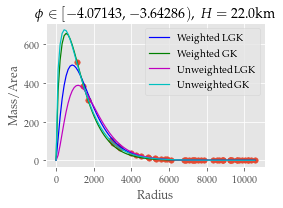

_______Phi:[-4.07143,-3.64286) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.37204488e-01 -1.31412088e-03  1.19931384e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.05760023 -0.0013008   1.16806195]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.74416261e-01 -1.09499930e-03  5.87820069e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.68280144e+00 -1.45012634e-03  1.38398430e-02]


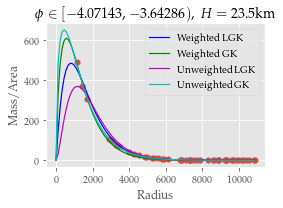

_______Phi:[-4.07143,-3.64286) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.30276851e-01 -1.27058093e-03  1.15345688e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.02206132e+00 -1.23098148e-03  1.33042746e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.29636167e-01 -1.03491469e-03  7.26310273e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.79318682e+00 -1.39923041e-03  5.20347522e-03]


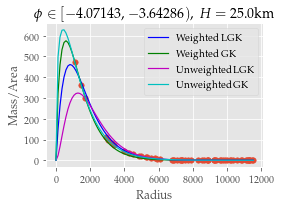

_______Phi:[-4.07143,-3.64286) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.48770974e-01 -1.18617415e-03  1.82620008e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 9.07099057e-01 -1.14595070e-03  2.67652369e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.56682278e-01 -1.01152242e-03  5.72350742e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.69052999e+00 -1.31003471e-03  9.28324725e-03]


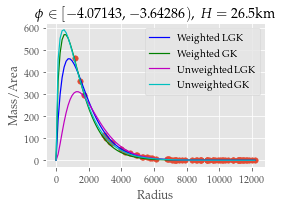

_______Phi:[-4.07143,-3.64286) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.40605194e-01 -1.15355965e-03  1.81001417e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 8.15716773e-01 -1.07202539e-03  4.54855451e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.70908579e-01 -9.32030711e-04  9.28384469e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.60749526e+00 -1.23311120e-03  1.45456732e-02]


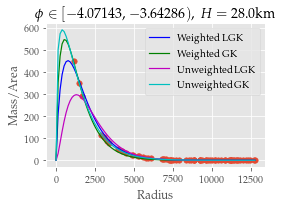

_______Phi:[-4.07143,-3.64286) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.65015574e-01 -1.08824016e-03  2.77705105e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 7.54991951e-01 -1.01400202e-03  6.34195933e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.84321549e-01 -9.11793427e-04  7.94191848e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.52920071e+00 -1.16779868e-03  2.27892314e-02]


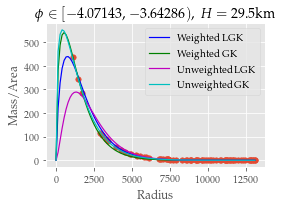

_______Phi:[-4.07143,-3.64286) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.55257482e-01 -1.03944011e-03  2.68805387e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 7.28924833e-01 -9.68067968e-04  6.89400367e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.12348632e-01 -8.47764681e-04  1.18115176e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.55733489e+00 -1.12349360e-03  1.59290609e-02]


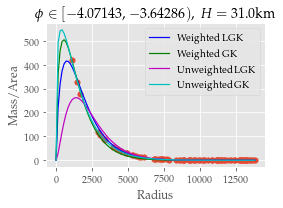

_______Phi:[-4.07143,-3.64286) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.79730052e-01 -9.83230048e-04  4.18980750e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 6.48517621e-01 -9.12649937e-04  1.11524346e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.14921514e-01 -8.27471026e-04  1.09875799e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.46027804e+00 -1.06168054e-03  2.86491422e-02]


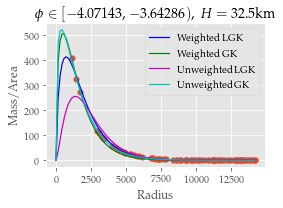

_______Phi:[-4.07143,-3.64286) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.46241703e-01 -9.50939680e-04  5.00449691e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.85478827e-01 -8.66252179e-04  1.61412274e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.20142407e-01 -8.18178652e-04  1.02657928e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.40212749e+00 -1.01225699e-03  3.92147090e-02]


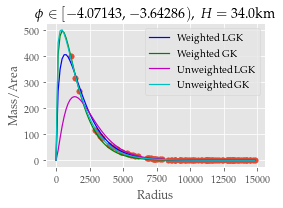

_______Phi:[-4.07143,-3.64286) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.20886549e-01 -9.52839443e-04  2.82834262e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.62698616e-01 -8.31463556e-04  1.74617935e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.22693164e-01 -7.88850583e-04  9.27486646e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.40229996e+00 -9.76569450e-04  3.49075609e-02]


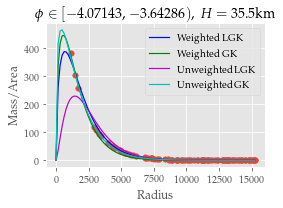

_______Phi:[-4.07143,-3.64286) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.82886040e-01 -8.67127311e-04  6.66586815e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.32619680e-01 -8.00445948e-04  2.03907796e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.28063554e-01 -7.34093134e-04  1.67341364e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.40092995e+00 -9.44817437e-04  3.19779851e-02]


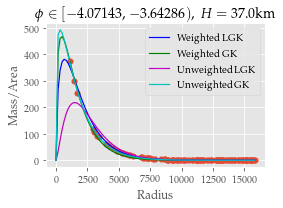

_______Phi:[-4.07143,-3.64286) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.37757436e-01 -8.86653919e-04  4.46126009e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.98103850e-01 -7.67000995e-04  2.41168336e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.55806801e-01 -7.26727585e-04  1.31094785e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.35931903e+00 -9.06839037e-04  3.91455299e-02]


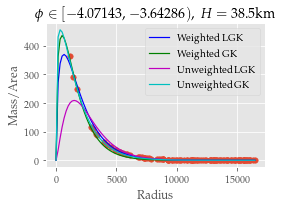

_______Phi:[-4.07143,-3.64286) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.29560663e-01 -8.82183161e-04  4.63945012e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.37930773e-01 -7.31531151e-04  3.49027647e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.03069404e-01 -7.34130660e-04  9.31429973e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.29077181e+00 -8.67625469e-04  5.94628125e-02]


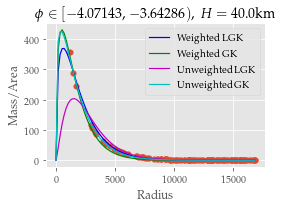

_______Phi:[-3.64286,-3.21429) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.56049798 -0.00265233  0.30059448]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.35452871e+00 -3.23851243e-03  2.26238965e-03]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 1.56837685 -0.00265605  0.28552843]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.52043915e+00 -3.44161905e-03  1.24747336e-03]


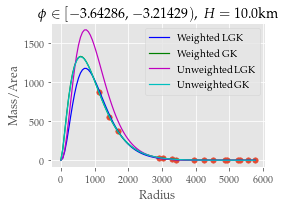

_______Phi:[-3.64286,-3.21429) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.09720834e+00 -2.12479864e-03  4.65972662e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.64035955e+00 -2.96088266e-03  2.23194978e-04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.26882845 -0.0022446   1.5944453 ]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.41871286e+00 -2.96608346e-03  1.39812953e-03]


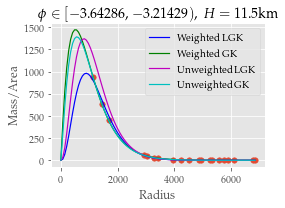

_______Phi:[-3.64286,-3.21429) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.26309583 -0.00210442  1.43956905]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.22829704 -0.00250021  0.00240633]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.16177600e+00 -2.00825697e-03  2.62144141e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.29411505e+00 -2.55852583e-03  1.77859097e-03]


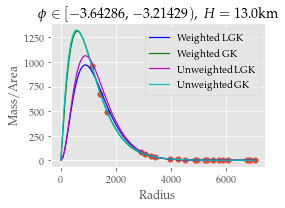

_______Phi:[-3.64286,-3.21429) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.02648382e+00 -1.82924000e-03  5.62060060e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 2.05422826 -0.00222794  0.00598255]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.06361348e+00 -1.82026849e-03  4.24966021e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.23060824e+00 -2.29858059e-03  1.92197126e-03]


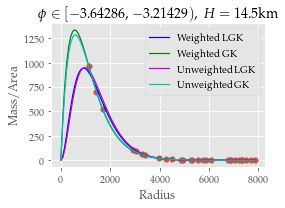

_______Phi:[-3.64286,-3.21429) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.04481823e+00 -1.76050711e-03  4.50876149e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.67019281 -0.00192143  0.06277345]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.15605446e-01 -1.62311239e-03  9.48400267e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.10538546e+00 -2.05774840e-03  3.22585742e-03]


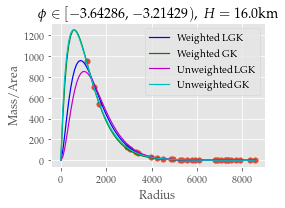

_______Phi:[-3.64286,-3.21429) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.28749027e-01 -1.60784272e-03  8.33444275e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.53918782 -0.00174574  0.12468628]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.75187037e-01 -1.50939968e-03  1.07057342e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.14238488e+00 -1.91415939e-03  1.89367693e-03]


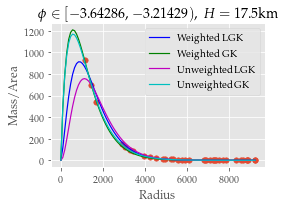

_______Phi:[-3.64286,-3.21429) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.99461451e-01 -1.52210352e-03  9.02162702e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.31836514 -0.00156324  0.46847029]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.90905466e-01 -1.39170029e-03  1.64968822e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.95555842e+00 -1.72909284e-03  5.33417839e-03]


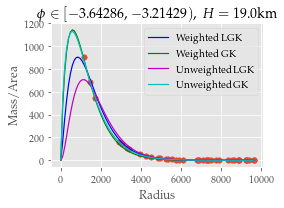

_______Phi:[-3.64286,-3.21429) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.97638580e-01 -1.38685939e-03  1.51407081e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.18335298 -0.00142702  0.99235239]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.30959399e-01 -1.29128808e-03  2.14060303e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.83795372e+00 -1.58690235e-03  9.57854453e-03]


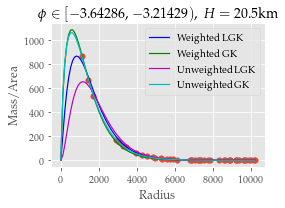

_______Phi:[-3.64286,-3.21429) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.55345407e-01 -1.26050374e-03  3.49814173e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.02184814e+00 -1.30263221e-03  2.64045895e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.62641190e-01 -1.20799370e-03  3.07618584e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.75343054e+00 -1.47169282e-03  1.41966624e-02]


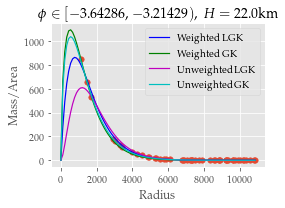

_______Phi:[-3.64286,-3.21429) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.76167990e-01 -1.22504574e-03  2.78502947e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 9.78575056e-01 -1.22599084e-03  3.14156076e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.43749793e-01 -1.15212652e-03  3.16204210e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.75624987e+00 -1.39555637e-03  1.17125816e-02]


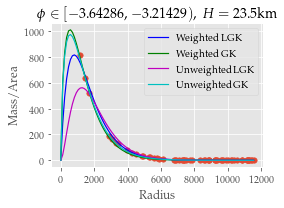

_______Phi:[-3.64286,-3.21429) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.55118501e-01 -1.24190440e-03  1.56691827e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 8.73211101e-01 -1.13769334e-03  5.76975768e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.45375615e-01 -1.06287771e-03  5.54653322e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.63949125e+00 -1.29852736e-03  2.26873484e-02]


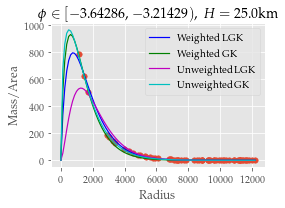

_______Phi:[-3.64286,-3.21429) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.95229417e-01 -1.24474679e-03  1.14710018e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 7.74765937e-01 -1.05959744e-03  1.02454455e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.59741629e-01 -1.02946366e-03  4.62561093e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.56214567e+00 -1.21964413e-03  3.37930086e-02]


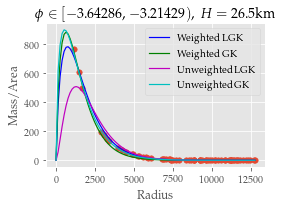

_______Phi:[-3.64286,-3.21429) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.04622564e-01 -1.21539645e-03  1.00856536e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 7.31349486e-01 -1.00595781e-03  1.26727717e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.19997917e-01 -9.93032494e-04  5.71804155e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.56309027e+00 -1.16688847e-03  2.92116914e-02]


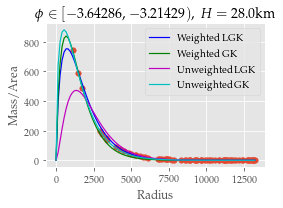

_______Phi:[-3.64286,-3.21429) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.09970980e-01 -1.13121944e-03  1.74214647e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 6.66588712e-01 -9.50843985e-04  1.82958845e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.36065421e-01 -9.17617792e-04  9.21394130e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.50729569e+00 -1.10757436e-03  3.84294887e-02]


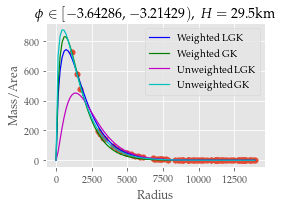

_______Phi:[-3.64286,-3.21429) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.87289091e-01 -1.07904405e-03  1.81886068e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 6.30956158e-01 -9.03838224e-04  2.12015486e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.68210442e-01 -8.91395760e-04  6.73145496e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.47396888e+00 -1.05608113e-03  4.27318349e-02]


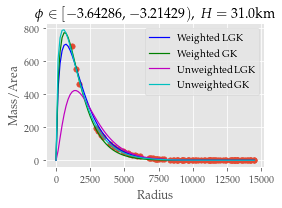

_______Phi:[-3.64286,-3.21429) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.69502672e-01 -1.11006004e-03  1.03834106e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.49421206e-01 -8.51961321e-04  3.48580584e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.97370710e-01 -8.56684546e-04  1.05515065e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.38399493e+00 -9.99588315e-04  7.35854475e-02]


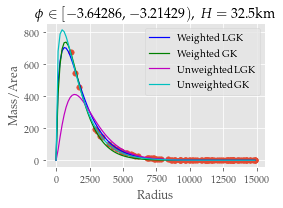

_______Phi:[-3.64286,-3.21429) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.27967096e-01 -9.44518869e-04  4.51618399e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.38526018e-01 -8.19381793e-04  3.45521669e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.64394991e-01 -8.07061472e-04  1.19168464e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.39722230e+00 -9.65647167e-04  5.92700505e-02]


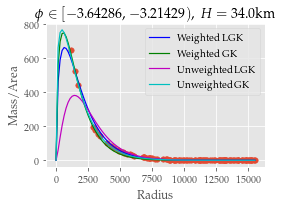

_______Phi:[-3.64286,-3.21429) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.59612608e-01 -9.79463940e-04  3.70384379e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.96561396e-01 -7.85533135e-04  4.39119264e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.80440617e-01 -7.57152539e-04  2.02320292e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.38013367e+00 -9.30634337e-04  6.08598130e-02]


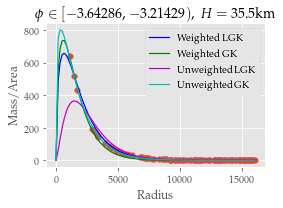

_______Phi:[-3.64286,-3.21429) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.82159392e-01 -9.51458580e-04  2.92559161e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.54363460e-01 -7.48944321e-04  5.44500120e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.34317512e-01 -7.24150055e-04  2.59098645e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.31107398e+00 -8.87314753e-04  9.09717072e-02]


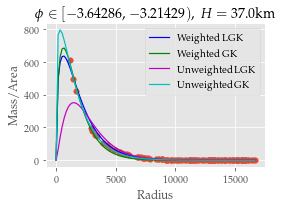

_______Phi:[-3.64286,-3.21429) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.73661222e-01 -9.41628228e-04  3.04166289e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 3.99028498e-01 -7.15924077e-04  7.66250140e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.88058414e-01 -7.30417435e-04  1.76211643e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.27319964e+00 -8.53708311e-04  1.10178229e-01]


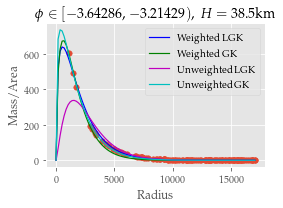

_______Phi:[-3.64286,-3.21429) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.23676897e-01 -9.54037879e-04  2.08073034e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.09573470e-01 -6.98125302e-04  6.66987061e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.55133111e-01 -6.96480580e-04  2.03694035e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.32334902e+00 -8.36182149e-04  6.88379956e-02]


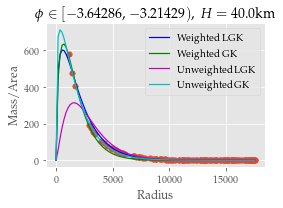

_______Phi:[-3.21429,-2.78571) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.34978617 -0.00246     1.95130182]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.37708205 -0.00307177  0.00281528]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 1.40579999 -0.00250019  1.37699984]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.43489519 -0.00316459  0.00246687]


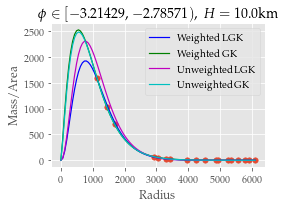

_______Phi:[-3.21429,-2.78571) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.24907215e+00 -2.21984170e-03  3.12912692e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.21875246 -0.00263812  0.0052322 ]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.16071716e+00 -2.14284822e-03  5.33369615e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.50479282e+00 -2.76495128e-03  8.47725433e-04]


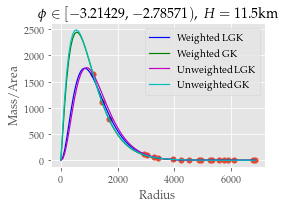

_______Phi:[-3.21429,-2.78571) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.05795602e+00 -1.93595863e-03  8.56114755e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.99704068 -0.00229235  0.01629167]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.97428589e-01 -1.87107899e-03  1.21287815e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.29457161 -0.00240565  0.00231921]


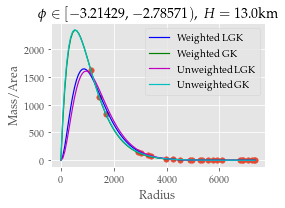

_______Phi:[-3.21429,-2.78571) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.07062918e+00 -1.84949825e-03  6.97716010e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.72174942 -0.00200068  0.07965773]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.97394380e-01 -1.68611233e-03  1.94564758e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.26809703e+00 -2.16545513e-03  1.85665784e-03]


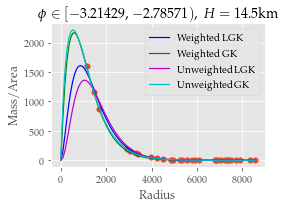

_______Phi:[-3.21429,-2.78571) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.00659623e+00 -1.71621122e-03  9.08000353e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.43231033 -0.00174448  0.4426746 ]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.42869790e-01 -1.54236168e-03  2.32754583e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.11174129e+00 -1.93078652e-03  3.83509662e-03]


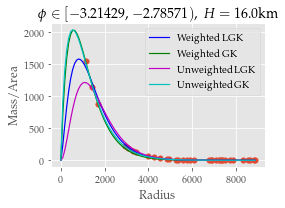

_______Phi:[-3.21429,-2.78571) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.00153052e+00 -1.64314262e-03  8.38410864e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.29461693 -0.00158121  0.93574662]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.38505991e-01 -1.39698400e-03  3.98034240e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.06586872e+00 -1.77485242e-03  4.00490783e-03]


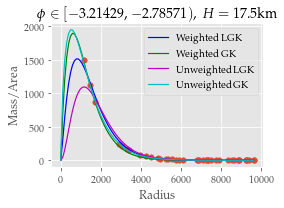

_______Phi:[-3.21429,-2.78571) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.04142579e-01 -1.52813264e-03  1.41963806e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.11000650e+00 -1.42382758e-03  2.79663749e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.17037973e-01 -1.33437645e-03  4.19028718e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.87351839e+00 -1.60674098e-03  1.22561201e-02]


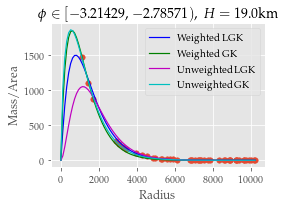

_______Phi:[-3.21429,-2.78571) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.58950652e-01 -1.42820639e-03  1.66117818e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 9.65306943e-01 -1.29372459e-03  6.40082105e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.80247920e-01 -1.24338618e-03  4.64596856e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.72048727e+00 -1.46805091e-03  2.90332812e-02]


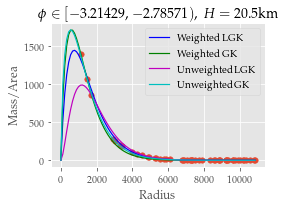

_______Phi:[-3.21429,-2.78571) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.21691812 -0.00162081  1.59237891]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 9.12606380e-01 -1.20971023e-03  8.05001855e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.39203678e-01 -1.17175257e-03  5.47382206e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.72220813e+00 -1.38509054e-03  2.36626567e-02]


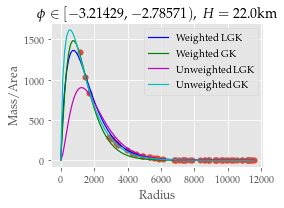

_______Phi:[-3.21429,-2.78571) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.94968952e-01 -1.36565467e-03  1.10250376e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 8.16539913e-01 -1.12163899e-03  1.37986435e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.67474667e-01 -1.13116875e-03  4.10101268e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.62926431e+00 -1.29058046e-03  3.85100103e-02]


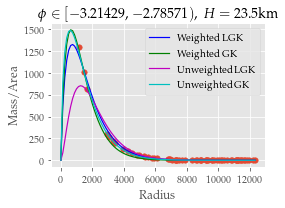

_______Phi:[-3.21429,-2.78571) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.15402671e-01 -1.28306779e-03  1.70232330e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 6.94336935e-01 -1.03391066e-03  2.86546596e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.44752046e-01 -1.04094867e-03  8.53491616e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.48715175e+00 -1.19512017e-03  9.08934320e-02]


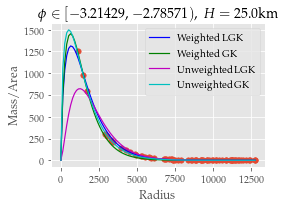

_______Phi:[-3.21429,-2.78571) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.44436361e-01 -1.14655981e-03  4.71061793e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 6.79893913e-01 -9.88295090e-04  2.90192238e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.17902210e-01 -9.98496948e-04  9.49831399e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.54828377e+00 -1.15378347e-03  5.06203670e-02]


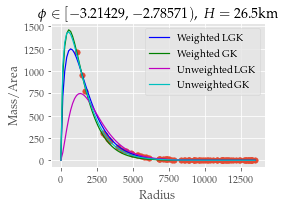

_______Phi:[-3.21429,-2.78571) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.66253219e-01 -1.18658217e-03  1.97637453e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 6.23833041e-01 -9.29383107e-04  3.82150063e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.21507436e-01 -9.59793030e-04  8.32360971e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.46472268e+00 -1.08531827e-03  7.98423131e-02]


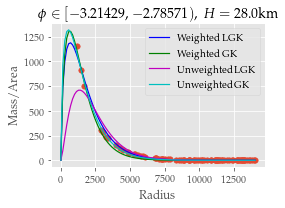

_______Phi:[-3.21429,-2.78571) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.77851735e-01 -1.12315455e-03  3.36118639e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.41466316e-01 -8.72924594e-04  6.26096838e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.46320352e-01 -9.50606520e-04  6.72188853e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.38072977e+00 -1.02456192e-03  1.29800916e-01]


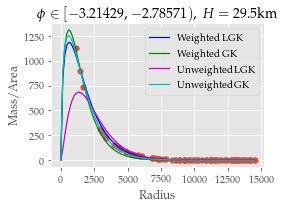

_______Phi:[-3.21429,-2.78571) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.34636356e-01 -1.12887155e-03  2.20443084e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.85902128e-01 -8.28772191e-04  8.61389577e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.39162051e-01 -8.81234518e-04  1.29115296e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.35924468e+00 -9.81130303e-04  1.35141348e-01]


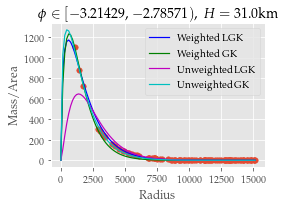

_______Phi:[-3.21429,-2.78571) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.64135648e-01 -1.06292796e-03  3.22204576e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.86132677e-01 -7.99179668e-04  7.90316684e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.72677661e-01 -8.69592523e-04  9.70676527e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.38784154e+00 -9.49708019e-04  9.69939003e-02]


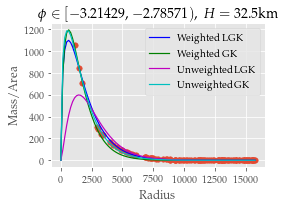

_______Phi:[-3.21429,-2.78571) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.85800104e-01 -1.01497755e-03  5.20229622e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.24313408e-01 -7.59739094e-04  1.15032429e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.76012753e-01 -8.10588084e-04  1.75311410e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.33445843e+00 -9.07558222e-04  1.29671850e-01]


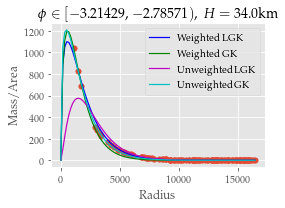

_______Phi:[-3.21429,-2.78571) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.53343339e-01 -9.64636074e-04  5.90004687e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 3.76718747e-01 -7.21692854e-04  1.47967785e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.13722835e-01 -8.42045149e-04  6.51722368e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.25202107e+00 -8.61972554e-04  2.13898012e-01]


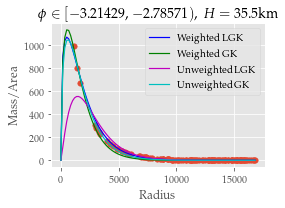

_______Phi:[-3.21429,-2.78571) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.96654709e-01 -1.01774574e-03  2.18280093e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 3.85255375e-01 -7.01520003e-04  1.29949642e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.14445040e-01 -7.41803318e-04  2.29659676e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.30186071e+00 -8.42392624e-04  1.33186558e-01]


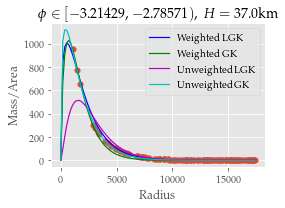

_______Phi:[-3.21429,-2.78571) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.80489053e-01 -9.50264746e-04  4.54161784e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 3.32242469e-01 -6.71676567e-04  1.81009688e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.86676920e-01 -7.04891147e-04  2.63232405e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.02640412e+00 -7.84675931e-04  1.07313659e+00]


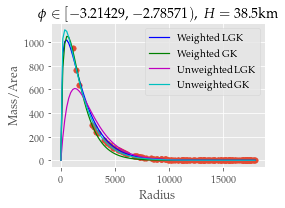

_______Phi:[-3.21429,-2.78571) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.14976613e-01 -9.65708730e-04  3.49293777e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 3.09154339e-01 -6.46334575e-04  1.99127109e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.56277562e-01 -7.19897702e-04  1.57447537e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.23079126e+00 -7.81505736e-04  1.88944542e-01]


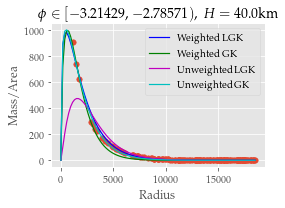

_______Phi:[-2.78571,-2.35714) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.36273854e+00 -2.46142969e-03  2.90963548e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.31954968 -0.0028653   0.00525881]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.39852152 -0.00246465  2.26282508]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.55964050e+00 -3.01796653e-03  1.38140575e-03]


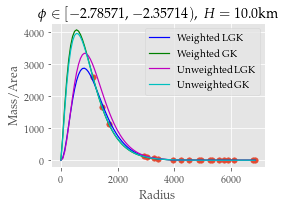

_______Phi:[-2.78571,-2.35714) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.67681937 -0.00252369  0.34261143]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 2.01941379 -0.00240918  0.02531025]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.13493425e+00 -2.09227198e-03  9.45211603e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.45816867e+00 -2.55834486e-03  1.29107895e-03]


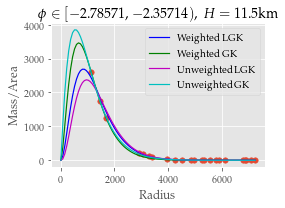

_______Phi:[-2.78571,-2.35714) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.65544285 -0.00238134  0.33122815]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.71597391 -0.00206696  0.14147938]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.98250110e-01 -1.84716784e-03  1.82303464e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.19869056 -0.00221785  0.00520408]


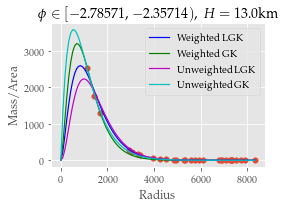

_______Phi:[-2.78571,-2.35714) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.82999668 -0.00239658  0.09448475]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.32201106 -0.00174642  1.52820074]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.05518006e-01 -1.65105206e-03  2.68491066e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 2.05259197e+00 -1.95017769e-03  9.31324767e-03]


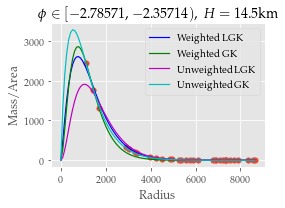

_______Phi:[-2.78571,-2.35714) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.13111185e+00 -1.81645322e-03  6.44673307e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.23962933e+00 -1.58728627e-03  2.17071157e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.14648558e-01 -1.55209899e-03  2.13870726e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 2.03689834e+00 -1.78945711e-03  7.77984136e-03]


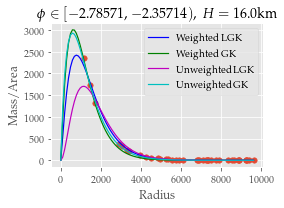

_______Phi:[-2.78571,-2.35714) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.38673391 -0.00193421  1.17950482]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.05671995e+00 -1.42019244e-03  6.29446978e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.50883716e-01 -1.37232500e-03  5.33134299e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.85375847e+00 -1.61129869e-03  2.17531110e-02]


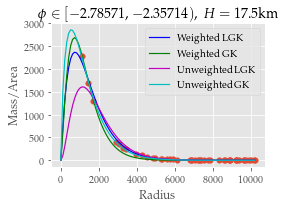

_______Phi:[-2.78571,-2.35714) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.05309150e+00 -1.61898305e-03  8.19971378e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 8.92573701e-01 -1.27670301e-03  1.62410768e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.36366450e-01 -1.30999415e-03  5.24268815e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.67140081e+00 -1.45665379e-03  6.22775536e-02]


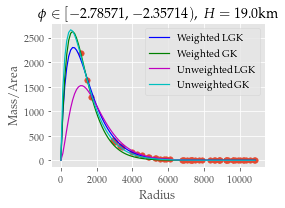

_______Phi:[-2.78571,-2.35714) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.52588435 -0.001899    0.38402504]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 8.45267668e-01 -1.19010493e-03  1.95273894e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.96187668e-01 -1.21985684e-03  5.97676825e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.68548234e+00 -1.37104126e-03  4.58677870e-02]


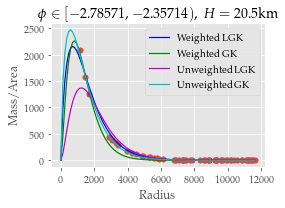

_______Phi:[-2.78571,-2.35714) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.01414850e+00 -1.51620251e-03  8.79534063e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 7.23272358e-01 -1.09035251e-03  3.96136571e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.49920257e-01 -1.15772199e-03  7.39023074e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.54483322e+00 -1.26129527e-03  1.03822617e-01]


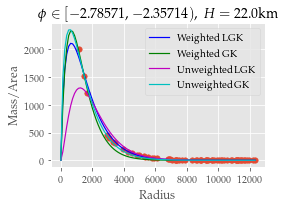

_______Phi:[-2.78571,-2.35714) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.64508231e-01 -1.42801624e-03  1.08206006e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 6.26882579e-01 -1.00896077e-03  6.86626324e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.31175768e-01 -1.10706395e-03  7.60677965e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.46267259e+00 -1.17683361e-03  1.58066906e-01]


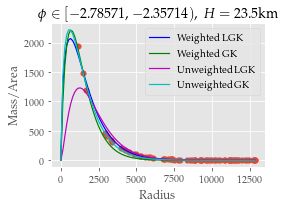

_______Phi:[-2.78571,-2.35714) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.13594705e-01 -1.27176126e-03  2.47252142e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 6.20309413e-01 -9.59443638e-04  6.39710155e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.94669815e-01 -1.03833333e-03  8.58357335e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.48444360e+00 -1.12331598e-03  1.14710177e-01]


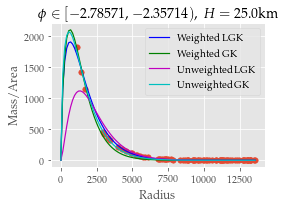

_______Phi:[-2.78571,-2.35714) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.27040908e-01 -1.25943205e-03  2.15481378e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.38025466e-01 -8.96958439e-04  1.03307285e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.78011988e-01 -9.45749593e-04  1.69893737e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.40411996e+00 -1.05606505e-03  1.78181449e-01]


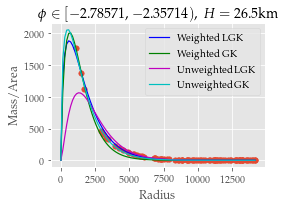

_______Phi:[-2.78571,-2.35714) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.04840956e-01 -1.18375099e-03  4.55868994e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 4.65972742e-01 -8.42852982e-04  1.57061407e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.43701887e-01 -9.16809693e-04  2.05952956e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.34638515e+00 -9.99649310e-04  2.37879404e-01]


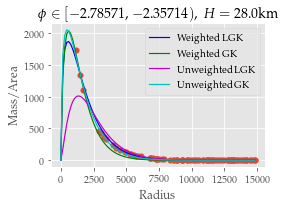

_______Phi:[-2.78571,-2.35714) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.93052326e-01 -1.19643123e-03  2.35795334e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.54720176e-01 -8.06745233e-04  1.55039402e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.57045431e-01 -9.29566908e-04  8.84015749e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.36245084e+00 -9.61619854e-04  1.85283178e-01]


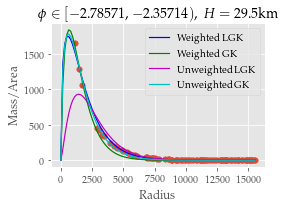

_______Phi:[-2.78571,-2.35714) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.02732076e-01 -1.11945858e-03  3.98980257e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.13070389e-01 -7.69723639e-04  1.94547541e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.56767147e-01 -8.69875036e-04  1.63024956e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.34976860e+00 -9.23270007e-04  1.81444598e-01]


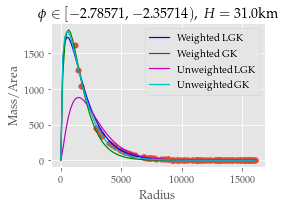

_______Phi:[-2.78571,-2.35714) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.67222178e-01 -1.13102999e-03  2.44083418e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.63524115e-01 -7.29025623e-04  2.52684457e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.28753803e-01 -8.22883999e-04  1.78876626e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.27069314e+00 -8.75190538e-04  2.89355705e-01]


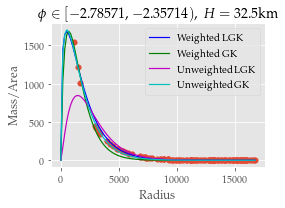

_______Phi:[-2.78571,-2.35714) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.63269126e-01 -1.02589504e-03  4.29647044e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 3.55121773e-01 -7.02378015e-04  2.48429750e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.10019894e-01 -7.53673568e-04  3.70406154e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.08914292e+00 -8.24282627e-04  1.09929802e+00]


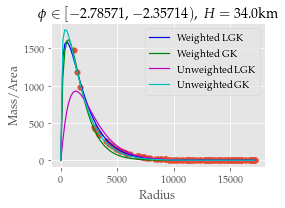

_______Phi:[-2.78571,-2.35714) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.00325682e-01 -1.06229170e-03  3.42349355e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.13958401e-01 -6.73641011e-04  3.16373850e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.48733871e-01 -7.60553852e-04  2.78364219e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.27282882e+00 -8.17867358e-04  2.31948147e-01]


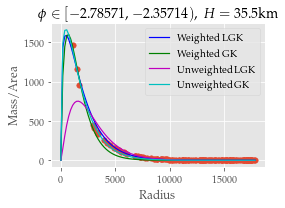

_______Phi:[-2.78571,-2.35714) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.06729111e-01 -9.85994487e-04  5.82874784e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.85441858e-01 -6.45741563e-04  3.60567916e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.81482570e-01 -7.16097016e-04  4.12998819e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.23094938e+00 -7.85045806e-04  2.87022958e-01]


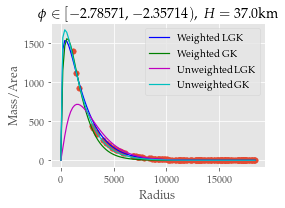

_______Phi:[-2.78571,-2.35714) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.47052877e-01 -9.73515103e-04  4.14920706e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 2.71026210e-01 -6.23200024e-04  3.73877889e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.68899178e-01 -6.89200963e-04  4.19028941e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.22074831e+00 -7.59505407e-04  2.81677702e-01]


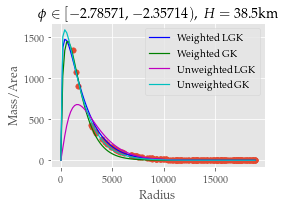

_______Phi:[-2.78571,-2.35714) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.83011612e-01 -9.54768556e-04  6.34731248e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.27329433e-01 -5.99118248e-04  4.90731508e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.59467659e-01 -6.74737999e-04  4.31013214e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.20319082e+00 -7.35574305e-04  2.96464925e-01]


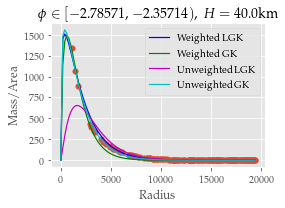

_______Phi:[-2.35714,-1.92857) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.33113199e+00 -2.40746229e-03  5.04393883e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 2.0028994  -0.00253137  0.04825205]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.05732126e+00 -2.18041914e-03  2.66849582e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.74747898e+00 -2.78480477e-03  3.03947280e-04]


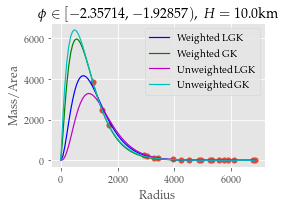

_______Phi:[-2.35714,-1.92857) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.36692868e+00 -2.27070085e-03  3.26834904e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.7867373  -0.00217121  0.14119216]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.25622662e-01 -1.89253966e-03  4.70711562e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.46586749e+00 -2.37453833e-03  1.29852590e-03]


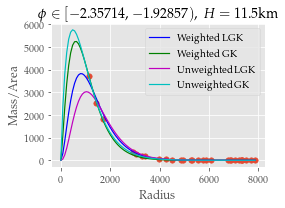

_______Phi:[-2.35714,-1.92857) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.29575403e+00 -2.10667959e-03  4.33623816e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.36355963 -0.00180835  1.7938026 ]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.03295104e+00 -1.80234393e-03  1.90793690e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 2.14559164e+00 -2.02610545e-03  7.62093755e-03]


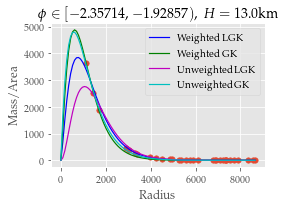

_______Phi:[-2.35714,-1.92857) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.52933441 -0.00218992  0.88381232]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.12525659e+00 -1.57082964e-03  7.02041204e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.09178270e-01 -1.60332547e-03  3.45570551e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.90438986e+00 -1.77474756e-03  2.92073361e-02]


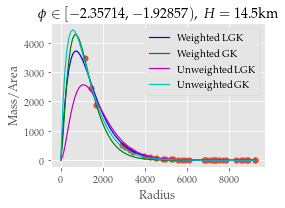

_______Phi:[-2.35714,-1.92857) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.40302943 -0.00199095  1.61137429]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.01003267e+00 -1.41220971e-03  1.24383573e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.26896750e-01 -1.50893181e-03  2.58809813e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.80464913e+00 -1.60451153e-03  4.40185171e-02]


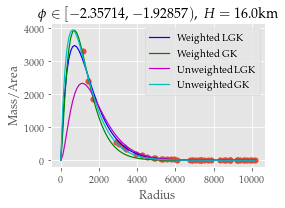

_______Phi:[-2.35714,-1.92857) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.92848436 -0.00230798  0.05419156]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 8.47869694e-01 -1.26157016e-03  3.12179563e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.62441329e-01 -1.27292066e-03  1.20861274e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.63300949e+00 -1.44306387e-03  1.14486512e-01]


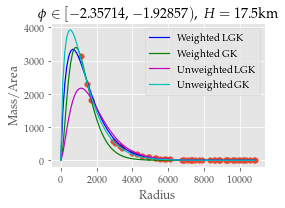

_______Phi:[-2.35714,-1.92857) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.14156388e+00 -1.68370505e-03  6.53811894e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 7.77427787e-01 -1.16559465e-03  4.41504458e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.38975483e-01 -1.32163312e-03  3.52137312e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.63801203e+00 -1.34988713e-03  8.92253132e-02]


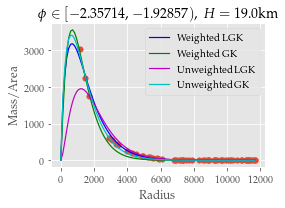

_______Phi:[-2.35714,-1.92857) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.39516797 -0.00179694  1.17038542]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 6.70266266e-01 -1.06359230e-03  7.89374366e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.93310772e-01 -1.27905805e-03  2.13805141e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.50064533e+00 -1.23523472e-03  1.93184593e-01]


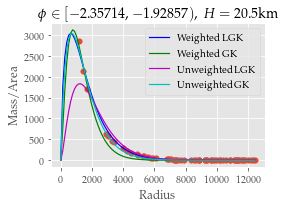

_______Phi:[-2.35714,-1.92857) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.37975841 -0.00174246  1.17289252]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 6.07004880e-01 -9.90466893e-04  1.08489674e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.35342663e-01 -1.09571884e-03  1.02103439e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.48574660e+00 -1.16276585e-03  1.79440592e-01]


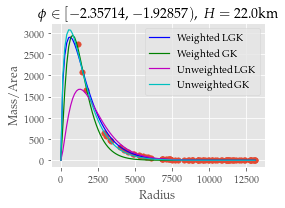

_______Phi:[-2.35714,-1.92857) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.30013028e-01 -1.39555908e-03  1.80696094e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 5.44116333e-01 -9.26008268e-04  1.50827136e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.53533147e-01 -1.07706693e-03  8.53355618e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.43789505e+00 -1.09301477e-03  2.15300798e-01]


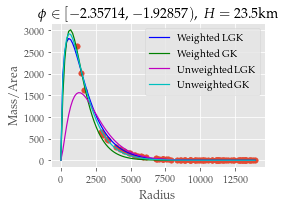

_______Phi:[-2.35714,-1.92857) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.51833266 -0.00174176  0.39974206]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 4.84045928e-01 -8.65427673e-04  2.04103996e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.98832756e-01 -1.05426441e-03  5.62894807e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.36293873e+00 -1.02448192e-03  3.16722514e-01]


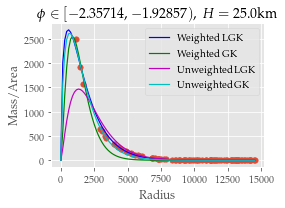

_______Phi:[-2.35714,-1.92857) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.11206081e+00 -1.46678337e-03  4.99833636e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.29069290e-01 -8.15664229e-04  2.74812031e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.93488801e-01 -9.25313775e-04  2.02224847e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.34206134e+00 -9.74445372e-04  3.21032860e-01]


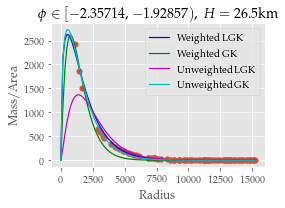

_______Phi:[-2.35714,-1.92857) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.15977900e+00 -1.43591100e-03  3.24403296e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 4.20061272e-01 -7.80290633e-04  2.66982348e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.86066324e-01 -8.87300987e-04  1.92927919e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.35837250e+00 -9.35942052e-04  2.48521674e-01]


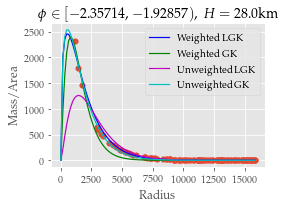

_______Phi:[-2.35714,-1.92857) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.33812372 -0.00155136  1.02731474]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.48477060e-01 -7.34172171e-04  4.09342801e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.78519704e-01 -8.74483237e-04  1.95118712e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.16262643e+00 -8.70827640e-04  9.90272038e-01]


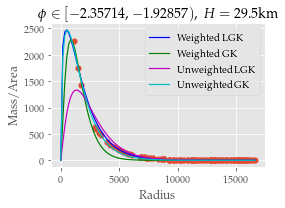

_______Phi:[-2.35714,-1.92857) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.18885432e+00 -1.39670605e-03  2.34902715e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.24867508e-01 -7.01348747e-04  4.45264111e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.55521376e-01 -8.18273384e-04  2.02999036e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.14131607e+00 -8.34500934e-04  1.03846822e+00]


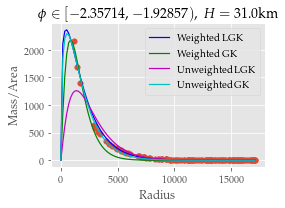

_______Phi:[-2.35714,-1.92857) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.55001535e-01 -1.14280654e-03  3.68497942e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.98250142e-01 -6.73763147e-04  5.07279929e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.27724766e-01 -7.92676479e-04  2.33884549e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.28307139e+00 -8.22037970e-04  3.06354533e-01]


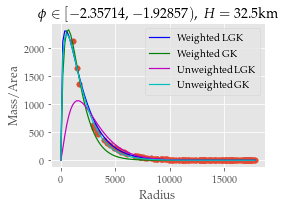

_______Phi:[-2.35714,-1.92857) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.45434143e-01 -1.16280186e-03  1.91012198e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.56177328e-01 -6.41036719e-04  6.33430497e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.41578213e-01 -7.39485859e-04  3.91229965e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.21500157e+00 -7.82937880e-04  4.58103227e-01]


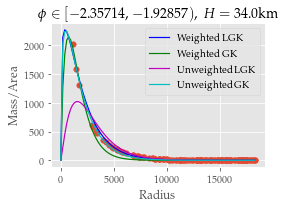

_______Phi:[-2.35714,-1.92857) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.10932503e-01 -1.09990939e-03  2.16108810e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.46228129e-01 -6.18798049e-04  6.35969181e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.96805411e-01 -7.05366881e-04  4.96602681e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.22457312e+00 -7.58944299e-04  3.85377744e-01]


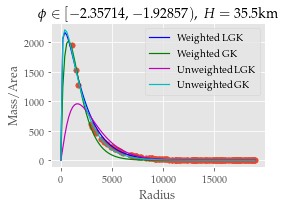

_______Phi:[-2.35714,-1.92857) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.34858231e-01 -1.03918272e-03  3.33936423e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.39684840e-01 -5.98943556e-04  6.25255227e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.51407692e-01 -7.71598047e-04  1.72972221e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.23366897e+00 -7.36777748e-04  3.26687882e-01]


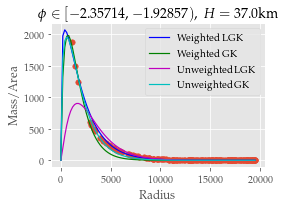

_______Phi:[-2.35714,-1.92857) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.06408144e+00 -1.25949676e-03  4.14049133e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.96505693e-01 -5.74673174e-04  8.13464389e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.56306550e-01 -7.07637156e-04  3.06320173e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.20509652e+00 -7.11228403e-04  3.72189390e-01]


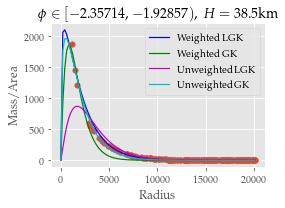

_______Phi:[-2.35714,-1.92857) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.04691136e-01 -9.54269038e-04  7.21192445e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.71267467e-01 -5.53039629e-04  9.17123073e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.15639666e-01 -6.82953141e-04  3.86554248e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.17017463e+00 -6.85789633e-04  4.44040815e-01]


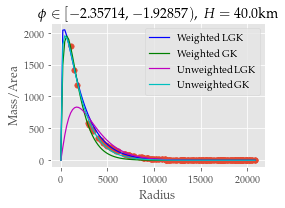

_______Phi:[-1.92857,-1.5) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.72187451 -0.00264312  0.56820676]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.75296502 -0.00225507  0.27305128]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.62049751e+00 -3.20931737e-03  1.90545310e-03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.44422895e+00 -2.47408088e-03  2.36793418e-03]


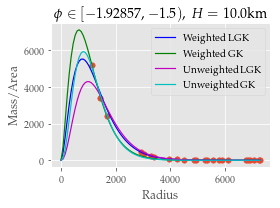

_______Phi:[-1.92857,-1.5) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.61508329 -0.00241155  0.88976428]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.40485743e+00 -1.87685901e-03  1.98009338e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.27340683e+00 -2.01849086e-03  6.14383956e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 2.20101097e+00 -2.10186224e-03  7.70231887e-03]


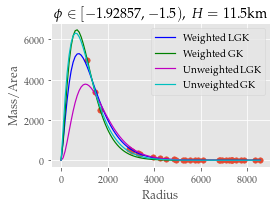

_______Phi:[-1.92857,-1.5) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.5904317  -0.00227864  0.86384436]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.15553028e+00 -1.60764256e-03  8.01029510e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.30269074e+00 -1.88678808e-03  4.04898618e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.97239754e+00 -1.82153437e-03  2.55682397e-02]


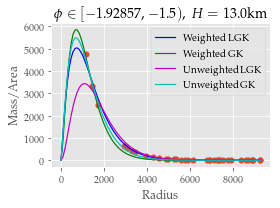

_______Phi:[-1.92857,-1.5) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.22228448e+00 -1.91868596e-03  7.27989303e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 9.76604828e-01 -1.41250015e-03  2.14698628e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.78595461e-01 -1.55919926e-03  2.59150017e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.79838753e+00 -1.61153577e-03  6.27044244e-02]


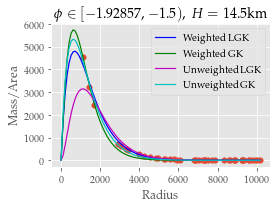

_______Phi:[-1.92857,-1.5) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.31652771e+00 -1.90426781e-03  3.47447408e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 8.10092560e-01 -1.25063749e-03  5.45828734e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.15280240e+00 -1.55250263e-03  6.99739316e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.64141810e+00 -1.44114446e-03  1.43037878e-01]


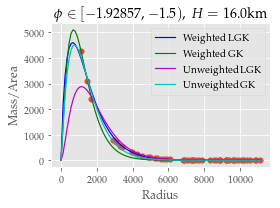

_______Phi:[-1.92857,-1.5) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.14434292e+00 -1.71727029e-03  8.92334287e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 7.50580451e-01 -1.14825975e-03  6.95754543e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.06690807e+00 -1.44953502e-03  1.07433872e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.63213868e+00 -1.33458687e-03  1.19688062e-01]


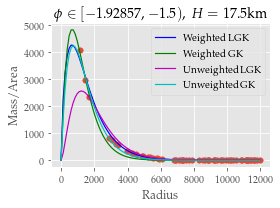

_______Phi:[-1.92857,-1.5) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.09860724e+00 -1.62379865e-03  1.05192496e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 6.10134492e-01 -1.03457642e-03  1.56818828e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.85780933e-01 -1.34949267e-03  1.62311946e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.48092897e+00 -1.21209517e-03  2.83370982e-01]


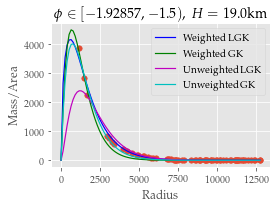

_______Phi:[-1.92857,-1.5) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.30971678e-01 -1.37402932e-03  4.90424920e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 5.92580574e-01 -9.70644624e-04  1.54659968e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.76241255e-01 -1.21090044e-03  2.79602987e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.51265542e+00 -1.14539409e-03  1.84546057e-01]


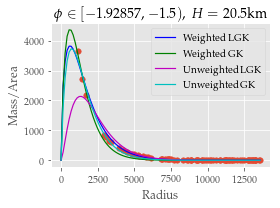

_______Phi:[-1.92857,-1.5) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.05420094e-01 -1.33565391e-03  5.36846262e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 4.87278696e-01 -8.90921026e-04  2.84726743e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.76070967e-01 -1.17669729e-03  2.54083827e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.29162392e+00 -1.04305177e-03  8.03369424e-01]


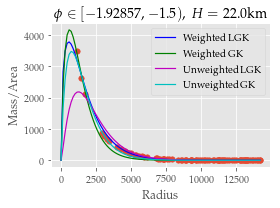

_______Phi:[-1.92857,-1.5) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.12563385e+00 -1.53275788e-03  6.75026290e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 4.11186220e-01 -8.27740182e-04  4.34960626e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.08792018e-01 -1.02010941e-03  1.38410304e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.31971117e+00 -9.88971146e-04  5.34235928e-01]


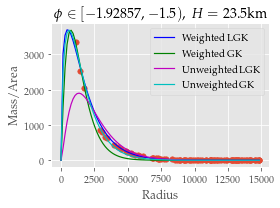

_______Phi:[-1.92857,-1.5) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.87886482e-01 -1.30298199e-03  2.63747259e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 4.08317282e-01 -7.90034006e-04  4.02301818e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.02483173e-01 -9.68041203e-04  1.26350412e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.37079283e+00 -9.51108644e-04  3.15393812e-01]


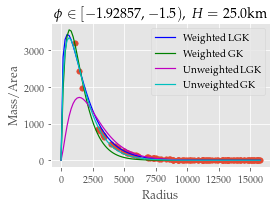

_______Phi:[-1.92857,-1.5) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.17651176e+00 -1.47876074e-03  4.05786883e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.37728555e-01 -7.39449689e-04  6.03598286e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.90007399e-01 -1.03720567e-03  3.50711504e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.28543340e+00 -8.93742726e-04  5.15935895e-01]


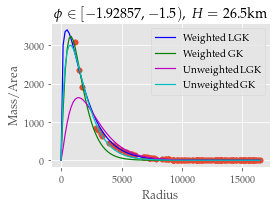

_______Phi:[-1.92857,-1.5) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.07000086e-01 -1.25608868e-03  2.00553356e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.94644944e-01 -6.98619361e-04  7.46750995e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.07305216e-01 -9.59802638e-04  5.47816192e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.18286046e+00 -8.41488226e-04  9.95570070e-01]


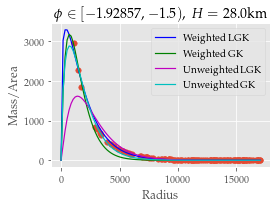

_______Phi:[-1.92857,-1.5) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.98735643e-01 -1.29430643e-03  1.04348356e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.95153354e-01 -6.73012948e-04  6.88332838e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.85087831e-01 -8.41148084e-04  2.20880217e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.28187892e+00 -8.21586363e-04  4.09824397e-01]


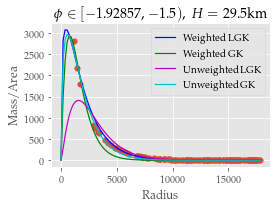

_______Phi:[-1.92857,-1.5) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.08343687e-01 -1.16508855e-03  3.36256949e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.38708234e-01 -6.36782160e-04  9.57063562e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.54033345e-01 -7.95743510e-04  2.50483046e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.22135698e+00 -7.81352577e-04  5.75493802e-01]


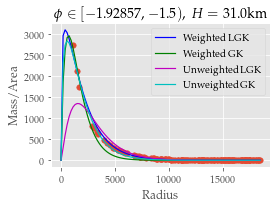

_______Phi:[-1.92857,-1.5) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.14693187e+00 -1.35450021e-03  3.65924913e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.17231934e-01 -6.10223574e-04  1.03749516e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.02205315e-01 -7.98860973e-04  1.71542746e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.21034000e+00 -7.51767357e-04  5.59904852e-01]


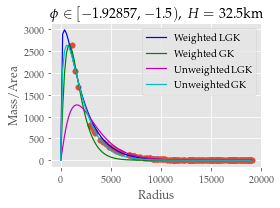

_______Phi:[-1.92857,-1.5) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.73947172e-01 -1.23043988e-03  1.03732624e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.05233694e-01 -5.87991007e-04  1.05694874e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.67716688e-01 -8.51213146e-04  5.40569198e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.21406794e+00 -7.26858208e-04  4.90232825e-01]


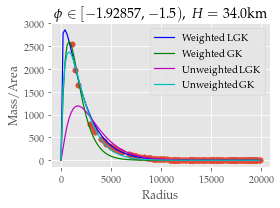

_______Phi:[-1.92857,-1.5) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.06918335e-01 -1.09759539e-03  2.77511272e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.80897522e-01 -5.64157090e-04  1.17595393e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.03550090e-01 -7.24476429e-04  2.92601447e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.18175601e+00 -6.98585527e-04  5.66511451e-01]


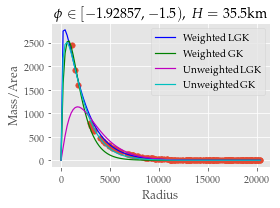

_______Phi:[-1.92857,-1.5) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.34108017 -0.00143255  0.92388201]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.42390716e-01 -5.40623093e-04  1.47125995e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.39137877e-01 -6.94099240e-04  4.43052550e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.07140595e+00 -6.65573497e-04  1.25087951e+00]


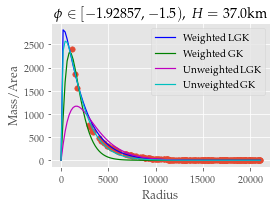

_______Phi:[-1.92857,-1.5) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.58326976e-01 -1.10986127e-03  1.86331683e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.40781098e-01 -5.25546525e-04  1.40987401e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.47203068e-01 -6.26510313e-04  7.46939302e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.18436924e+00 -6.57566365e-04  4.62674177e-01]


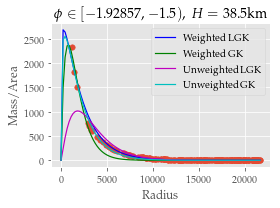

_______Phi:[-1.92857,-1.5) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.96794215e-01 -1.18640943e-03  7.35864305e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.14798223e-01 -5.05548500e-04  1.60335084e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.91070305e-01 -6.32172698e-04  5.27656290e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.14131415e+00 -6.33051548e-04  5.89568567e-01]


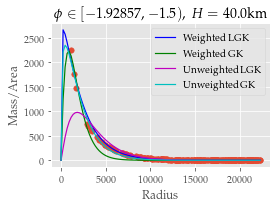

_______Phi:[-1.5,-1.07143) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.37392420e+00 -2.31213839e-03  5.62270926e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.50250867 -0.00198768  1.45453607]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.04094800e+00 -1.96565665e-03  3.88294481e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.30841686e+00 -2.21919076e-03  5.34900747e-03]


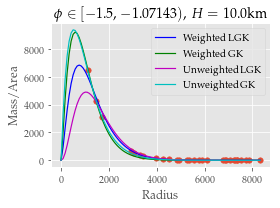

_______Phi:[-1.5,-1.07143) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.26251297e+00 -2.08271179e-03  8.93772517e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.22069387e+00 -1.66652174e-03  6.91687399e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.12103317e+00 -1.83002888e-03  1.76117859e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 2.08477402e+00 -1.89285951e-03  1.58448405e-02]


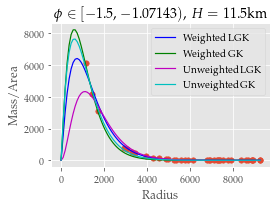

_______Phi:[-1.5,-1.07143) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.62441396 -0.00224749  0.79463309]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 9.81800080e-01 -1.42656074e-03  2.67109402e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.03607795e+00 -1.63659953e-03  2.41501160e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.82271191e+00 -1.63028688e-03  6.81244010e-02]


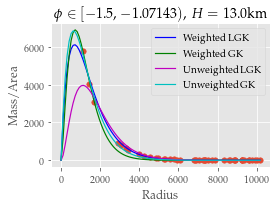

_______Phi:[-1.5,-1.07143) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.37992176e+00 -1.98364350e-03  3.08837384e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 7.99531824e-01 -1.24611750e-03  7.37915901e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.34516686e-01 -1.39603550e-03  7.01126769e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.65786639e+00 -1.44113126e-03  1.58394159e-01]


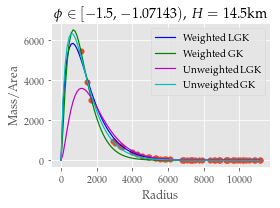

_______Phi:[-1.5,-1.07143) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.28660002e+00 -1.83252882e-03  4.71317501e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 7.06238225e-01 -1.12422625e-03  1.16196439e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.16965499e+00 -1.49607596e-03  6.84505914e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.59198988e+00 -1.31017746e-03  1.92922191e-01]


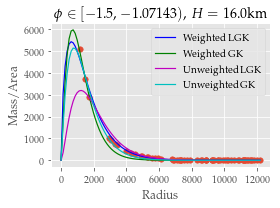

_______Phi:[-1.5,-1.07143) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.28846183e+00 -1.75928827e-03  4.00678298e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 5.48494704e-01 -1.00007983e-03  2.90841064e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.24977330e+00 -1.44380894e-03  3.39463194e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.41119421e+00 -1.17478856e-03  5.54568190e-01]


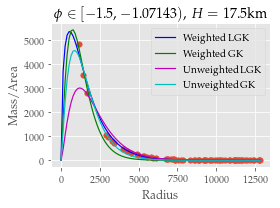

_______Phi:[-1.5,-1.07143) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.07903582e+00 -1.57218415e-03  1.34951413e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 5.10004311e-01 -9.28875460e-04  3.31407333e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.31527520e-01 -1.18901609e-03  4.69441271e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.42427705e+00 -1.10079327e-03  4.09387046e-01]


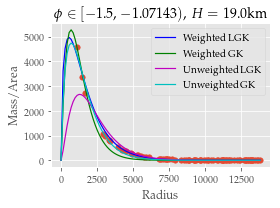

_______Phi:[-1.5,-1.07143) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.31308281e+00 -1.66663673e-03  2.69622253e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 4.57682879e-01 -8.60039389e-04  4.14758545e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.48481235e-01 -1.19762279e-03  1.93013471e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.34014951e+00 -1.01742677e-03  6.21168826e-01]


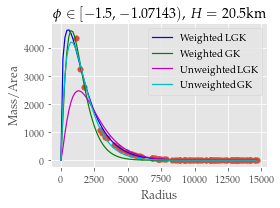

_______Phi:[-1.5,-1.07143) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.04035670e+00 -1.44868075e-03  1.37284932e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.80425685e-01 -7.96558060e-04  6.38938376e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.64320214e-01 -1.11464070e-03  3.02791399e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.29763790e+00 -9.54682509e-04  7.22780433e-01]


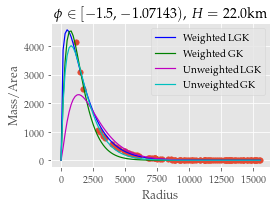

_______Phi:[-1.5,-1.07143) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.20999125e+00 -1.52694815e-03  4.31243191e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.42451024e-01 -7.48067654e-04  7.48868997e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.60244701e-01 -1.06792458e-03  2.75736419e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.30051525e+00 -9.04060485e-04  5.92608773e-01]


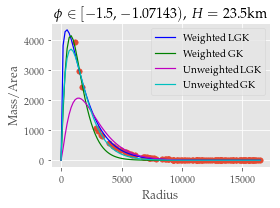

_______Phi:[-1.5,-1.07143) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.06169357e+00 -1.35953651e-03  9.56300823e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.80374526e-01 -6.97469699e-04  1.04318099e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.64867316e-01 -8.89342038e-04  1.73997840e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.21297133e+00 -8.45329303e-04  9.76885660e-01]


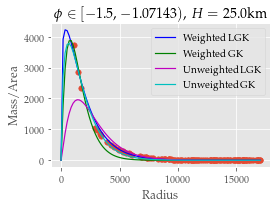

_______Phi:[-1.5,-1.07143) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.02136869e+00 -1.32268039e-03  1.17320644e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.56886390e-01 -6.63811884e-04  1.13624464e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.08811588e-01 -8.43187052e-04  2.37297969e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.24158640e+00 -8.11673882e-04  6.85449233e-01]


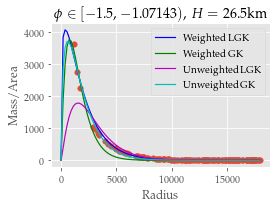

_______Phi:[-1.5,-1.07143) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.68279273e-01 -1.07351407e-03  1.01347381e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.08183588e-01 -6.25000463e-04  1.46697459e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.13321745e-01 -8.78856946e-04  1.12679376e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.16520034e+00 -7.65354641e-04  1.07038763e+00]


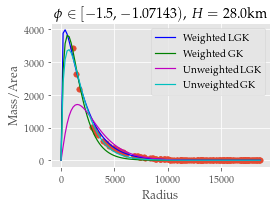

_______Phi:[-1.5,-1.07143) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.77507254e-01 -1.05688645e-03  8.93682266e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.91955491e-01 -5.97552421e-04  1.52307567e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.51074061e-01 -7.81037750e-04  3.02736066e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.18023491e+00 -7.36114151e-04  8.39281414e-01]


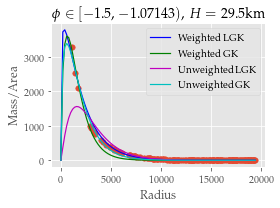

_______Phi:[-1.5,-1.07143) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.54734603e-01 -1.22534211e-03  1.48154021e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.57699602e-01 -5.69664516e-04  1.81740957e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.14497359e-01 -8.43490072e-04  9.78103944e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.13279811e+00 -7.03016991e-04  1.09131754e+00]


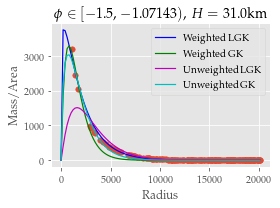

_______Phi:[-1.5,-1.07143) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.92869078e-01 -1.22716843e-03  1.08941826e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.43339900e-01 -5.46012984e-04  1.86070367e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.45039183e-01 -7.45109705e-04  2.76437314e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.10407405e+00 -6.72137321e-04  1.20049162e+00]


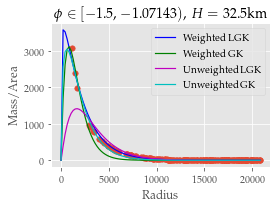

_______Phi:[-1.5,-1.07143) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.40440955e-01 -1.13166429e-03  2.75562295e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.25398889e-01 -5.25770469e-04  2.00235930e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.45122687e-01 -7.20076686e-04  2.61076127e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.08911097e+00 -6.50473591e-04  1.26107641e+00]


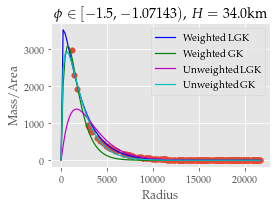

_______Phi:[-1.5,-1.07143) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.20129990e-01 -1.06745145e-03  2.84232451e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 9.45883893e-02 -5.02571003e-04  2.33787952e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.47361300e-01 -7.01371492e-04  2.39498480e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.12041330e+00 -6.29675971e-04  8.62129511e-01]


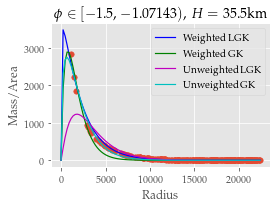

_______Phi:[-1.5,-1.07143) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.60710944e-01 -1.14180223e-03  1.09940128e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 7.22393269e-02 -4.82734767e-04  2.58086678e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.54371552e-01 -6.99476403e-04  2.20803600e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.09564458e+00 -6.06655378e-04  9.48191170e-01]


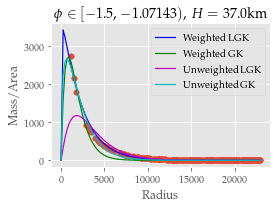

_______Phi:[-1.5,-1.07143) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.87190794e-01 -9.74911868e-04  6.13879064e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 5.11352087e-02 -4.66192836e-04  2.86900957e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.18674357e-01 -6.81797763e-04  2.67266389e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.10035744e+00 -5.89442153e-04  8.38510150e-01]


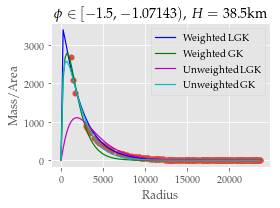

_______Phi:[-1.5,-1.07143) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.91654204e-01 -1.14394514e-03  8.37866987e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.66940180e-02 -4.50770289e-04  3.02010537e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.20882405e-01 -6.17619306e-04  4.80917947e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.09204779e+00 -5.71628440e-04  8.20805731e-01]


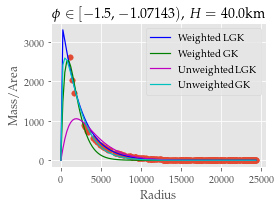

_______Phi:[-1.07143,-0.642857) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.51464065e+00 -2.33831428e-03  2.47408889e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.16926044e+00 -1.69756359e-03  1.25896724e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.40006367e+00 -2.08453413e-03  4.02145199e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.97650263e+00 -1.91939716e-03  4.44561952e-02]


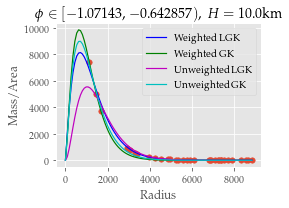

_______Phi:[-1.07143,-0.642857) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.06060704 -0.00260918  0.06719509]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 9.86897559e-01 -1.44834609e-03  3.17931213e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.23787185e+00 -1.77868125e-03  8.16546537e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.83090564e+00 -1.65478545e-03  7.98829478e-02]


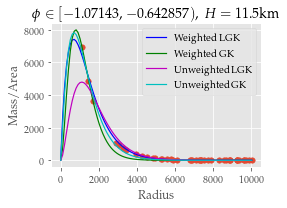

_______Phi:[-1.07143,-0.642857) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.08438095 -0.00253291  0.04860735]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 7.72000034e-01 -1.23863363e-03  1.06119007e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.04855446e+00 -1.52981982e-03  2.16597563e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.62885014e+00 -1.43333032e-03  2.30269540e-01]


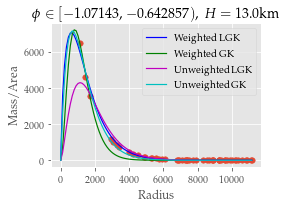

_______Phi:[-1.07143,-0.642857) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.74796416 -0.00217903  0.32150874]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 6.50122159e-01 -1.09599425e-03  1.98137442e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.73876007e-01 -1.38185206e-03  2.85803154e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.52715937e+00 -1.27879657e-03  3.48458922e-01]


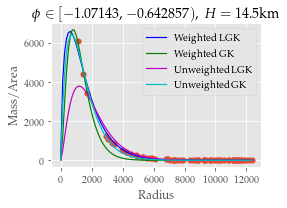

_______Phi:[-1.07143,-0.642857) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.67729085 -0.00207871  0.4431447 ]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 5.19346083e-01 -9.72645521e-04  4.04803551e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.13226410e-01 -1.23181400e-03  6.95962907e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.39921666e+00 -1.14534798e-03  6.64751381e-01]


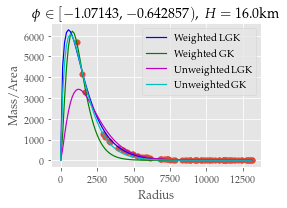

_______Phi:[-1.07143,-0.642857) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.28869285e+00 -1.71515192e-03  4.22518992e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 4.17017550e-01 -8.77269550e-04  7.03690075e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.43179842e-01 -1.07807866e-03  1.83289394e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.30904376e+00 -1.04147349e-03  1.00581997e+00]


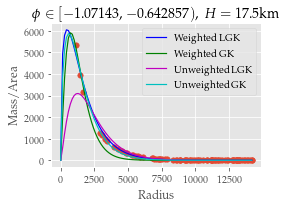

_______Phi:[-1.07143,-0.642857) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.77208313 -0.00200007  0.18171564]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.65122391e-01 -8.06125115e-04  8.73153511e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.70677617e-01 -1.00349005e-03  2.62618454e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.28950226e+00 -9.65069700e-04  9.24600245e-01]


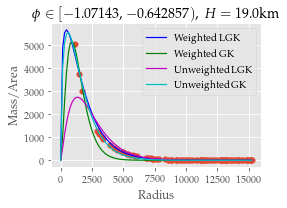

_______Phi:[-1.07143,-0.642857) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.02722877e+00 -1.43772335e-03  1.71613507e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.43640950e-01 -7.53166846e-04  8.92950367e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.17611737e-01 -9.80784531e-04  1.70692346e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.24692060e+00 -8.97967676e-04  1.04859997e+00]


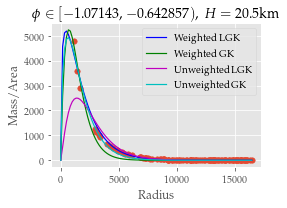

_______Phi:[-1.07143,-0.642857) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.75192556e-01 -1.37702307e-03  2.18194856e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.35123093e-01 -6.86844071e-04  1.70881285e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.01963597e+00 -1.15291809e-03  1.13720524e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.19103026e+00 -8.36047406e-04  1.32335987e+00]


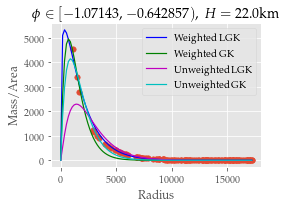

_______Phi:[-1.07143,-0.642857) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.62333496e-01 -1.31617023e-03  2.10608577e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.85580769e-01 -6.40559641e-04  2.18290010e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.13117975e-01 -1.04655524e-03  2.00477291e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.19829265e+00 -7.89309759e-04  1.03308459e+00]


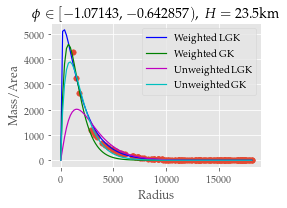

_______Phi:[-1.07143,-0.642857) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.08545176e+00 -1.36692899e-03  8.90130291e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.44230125e-01 -6.01525914e-04  2.66797726e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.45665277e-01 -9.54349793e-04  5.69491519e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.12639865e+00 -7.41514815e-04  1.56442500e+00]


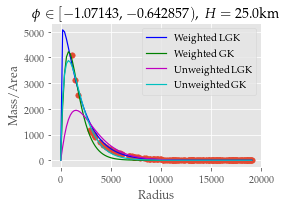

_______Phi:[-1.07143,-0.642857) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.17456902e+00 -1.39892264e-03  4.70861130e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.17755899e-01 -5.69349225e-04  2.95001500e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.82266092e-01 -7.90777731e-04  2.88562339e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.15253540e+00 -7.09198768e-04  1.09696547e+00]


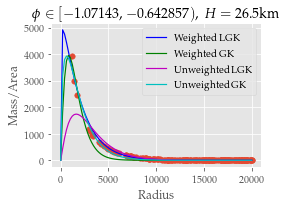

_______Phi:[-1.07143,-0.642857) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.57304346e-01 -1.21432155e-03  1.67127705e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 7.26345296e-02 -5.35274128e-04  3.73157382e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.11075101e-01 -7.75957968e-04  2.18397779e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.05931856e+00 -6.66023435e-04  1.97835316e+00]


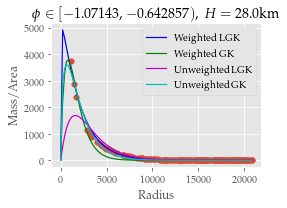

_______Phi:[-1.07143,-0.642857) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.55958003e-01 -1.21453755e-03  1.61801326e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 6.81903044e-02 -5.13979295e-04  3.57981325e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.78755142e-01 -7.21269499e-04  5.07974972e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.11026284e+00 -6.45029225e-04  1.17887772e+00]


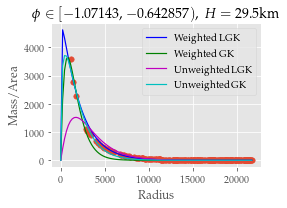

_______Phi:[-1.07143,-0.642857) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.52507068e-01 -1.06741449e-03  5.54192576e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.56887460e-02 -4.86470158e-04  4.52394864e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.13962055e-01 -7.18846495e-04  3.83869346e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.04713015e+00 -6.12167160e-04  1.71431552e+00]


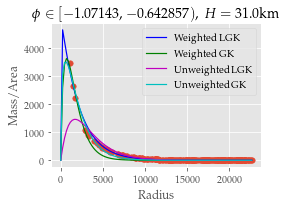

_______Phi:[-1.07143,-0.642857) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.78588129e-01 -9.37249064e-04  1.56964614e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.79998717e-02 -4.68416559e-04  4.48379570e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.07704185e-01 -6.90142929e-04  3.67623839e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.07453393e+00 -5.93234312e-04  1.24491275e+00]


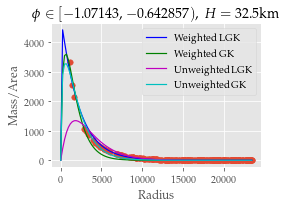

_______Phi:[-1.07143,-0.642857) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.08725055e+00 -1.26694946e-03  6.08331068e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.00337941e-03 -4.48878582e-04  4.85656653e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.47774435e-01 -6.91281243e-04  2.63148622e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.05974473e+00 -5.70663879e-04  1.25762026e+00]


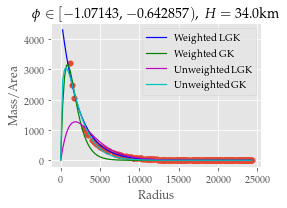

_______Phi:[-1.07143,-0.642857) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.35497192e-01 -1.05604570e-03  2.70657589e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.89932061e-02 -4.31429952e-04  5.16841248e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.16772219e-01 -6.56424255e-04  3.02652017e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.04976375e+00 -5.50636803e-04  1.23254557e+00]


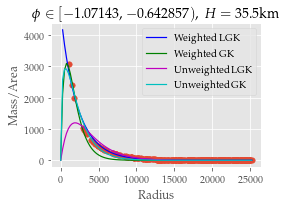

_______Phi:[-1.07143,-0.642857) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.16050309e-01 -9.90394653e-04  5.66148209e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.38435093e-02 -4.17874024e-04  5.06725508e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.15646265e-01 -5.79792303e-04  1.13826522e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.07176512e+00 -5.35881423e-04  9.45089310e-01]


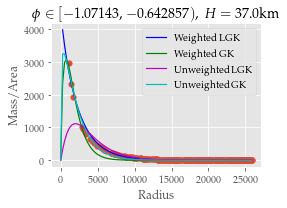

_______Phi:[-1.07143,-0.642857) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.47987525e-01 -1.04130876e-03  2.26282279e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.89113570e-02 -4.00853005e-04  5.73706815e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.17509663e-01 -5.93579447e-04  5.33788982e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.02107263e+00 -5.14403782e-04  1.29058690e+00]


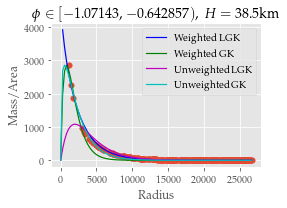

_______Phi:[-1.07143,-0.642857) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.35881647e-01 -9.76272783e-04  4.49257563e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.13727123e-02 -3.89635886e-04  5.55623181e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.30910796e-01 -5.59213274e-04  9.15510976e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.04972332e+00 -5.02708444e-04  9.45258912e-01]


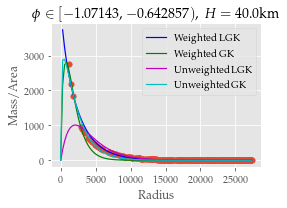

_______Phi:[-0.642857,-0.214286) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.56462627 -0.00230791  1.80226894]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 9.72212318e-01 -1.49267497e-03  4.27113177e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.17147299e+00 -1.80638010e-03  1.55940485e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.79934344e+00 -1.70079641e-03  1.23399209e-01]


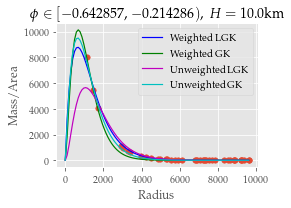

_______Phi:[-0.642857,-0.214286) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.36407860e+00 -2.03341496e-03  4.97426971e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 7.07370979e-01 -1.23295314e-03  1.89466724e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.14593446e+00 -1.63007116e-03  1.38468269e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.54290657e+00 -1.42451103e-03  4.82037932e-01]


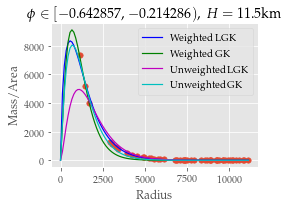

_______Phi:[-0.642857,-0.214286) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.87974414e+00 -3.06147462e-03  3.44477916e-04]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 5.82813783e-01 -1.06762134e-03  3.44718621e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.80099867e-01 -1.36287800e-03  6.11802005e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.39430663e+00 -1.23549400e-03  9.65662273e-01]


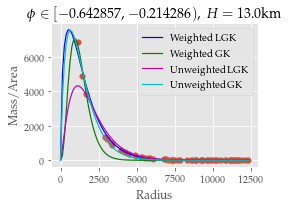

_______Phi:[-0.642857,-0.214286) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.64091042 -0.00206815  0.62806985]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 4.39531928e-01 -9.33680867e-04  7.57074151e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.75636792e-01 -1.26003196e-03  5.12321063e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.34087710e+00 -1.10494587e-03  1.03685253e+00]


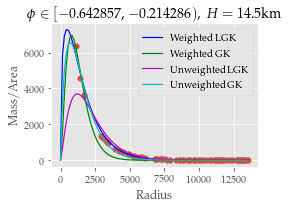

_______Phi:[-0.642857,-0.214286) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.05295527e+00 -1.56141831e-03  2.04891609e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.50172949e-01 -8.32408367e-04  1.17242558e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.08875093e-01 -1.11986343e-03  1.32718507e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.19343481e+00 -9.80349502e-04  2.30343799e+00]


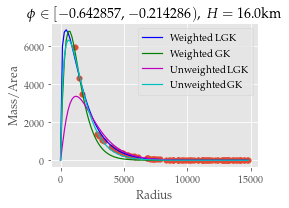

_______Phi:[-0.642857,-0.214286) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.02541921e+00 -1.48397122e-03  2.13023731e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.61367144e-01 -7.51199475e-04  1.87174511e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.59359275e-01 -1.04484778e-03  1.61650653e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.20487056e+00 -9.06060290e-04  1.66456215e+00]


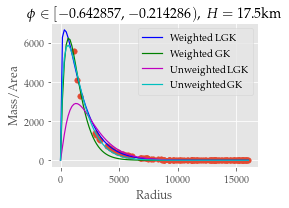

_______Phi:[-0.642857,-0.214286) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.06189071e+00 -1.46345907e-03  1.51083671e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.76855230e-01 -6.79559471e-04  2.94284884e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.42035909e-01 -9.26312727e-04  2.97781942e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.12753193e+00 -8.28141868e-04  2.36864873e+00]


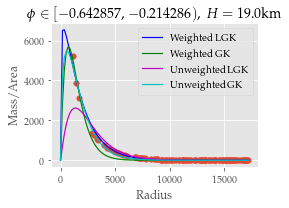

_______Phi:[-0.642857,-0.214286) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.67488236 -0.00186436  0.29682993]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.20230727e-01 -6.43502334e-04  1.89132652e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.40468593e-01 -9.00724707e-04  2.76247629e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.07777946e+00 -7.66341466e-04  2.82300807e+00]


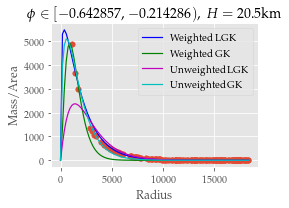

_______Phi:[-0.642857,-0.214286) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.97911177e-01 -1.34483852e-03  1.83826450e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 8.93825864e-02 -5.82167605e-04  4.31255000e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.86898786e-01 -8.25622527e-04  3.44621402e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.06907867e+00 -7.19273435e-04  2.52283123e+00]


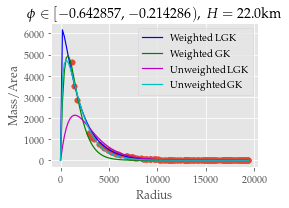

_______Phi:[-0.642857,-0.214286) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.31779875e-01 -1.26905367e-03  2.52499936e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.48813087e-02 -5.40936920e-04  5.74506096e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.47982337e-01 -8.46562403e-04  2.18584481e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.03642275e+00 -6.74794430e-04  2.74131584e+00]


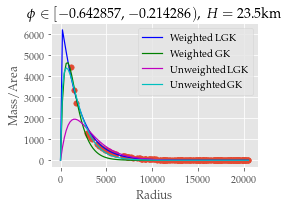

_______Phi:[-0.642857,-0.214286) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.14968858e-01 -1.23929357e-03  2.59684664e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.99420817e-02 -5.11974637e-04  5.83699355e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.55533830e-01 -7.71424567e-04  3.59426453e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.12508522e+00 -6.49679458e-04  1.16028368e+00]


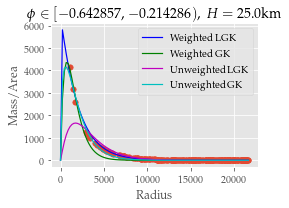

_______Phi:[-0.642857,-0.214286) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.10270915e+00 -1.35408926e-03  7.56152975e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.01391530e-02 -4.78259487e-04  7.65344737e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.13968057e-01 -7.93898754e-04  2.35410734e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.98746964e-01 -6.04605102e-04  2.73310680e+00]


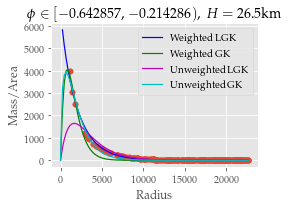

_______Phi:[-0.642857,-0.214286) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.78537440e-01 -1.16288265e-03  2.82048767e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.97911859e-02 -4.56342355e-04  7.58573841e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.46441901e-01 -6.92293198e-04  6.49957794e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.01991880e+00 -5.80472937e-04  2.03890118e+00]


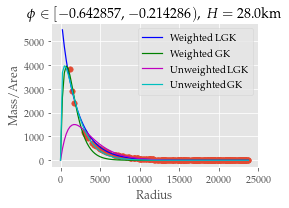

_______Phi:[-0.642857,-0.214286) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.75869892e-01 -1.22006382e-03  1.44235610e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.68047367e-02 -4.32953155e-04  8.56057782e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.45405620e-01 -6.73618266e-04  6.06904358e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.06870350e+00 -5.59391843e-04  1.19255586e+00]


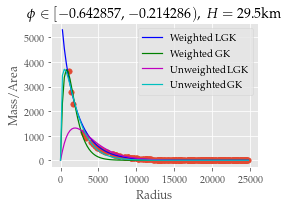

_______Phi:[-0.642857,-0.214286) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.02020506e-01 -9.68359348e-04  1.44451399e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.88806870e-02 -4.14560041e-04  8.72299025e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.76011116e-01 -6.18621967e-04  8.98792323e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.03764051e+00 -5.35519937e-04  1.38320286e+00]


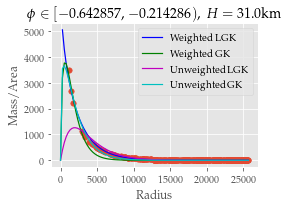

_______Phi:[-0.642857,-0.214286) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.34464292e-01 -9.59878682e-04  1.08597582e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.01327706e-01 -3.95472904e-04  9.59669329e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.40262785e-01 -5.79263201e-04  1.02974522e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.02650866e+00 -5.13768181e-04  1.33974380e+00]


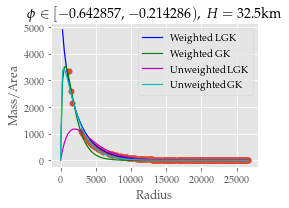

_______Phi:[-0.642857,-0.214286) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.06655229e-01 -9.84299687e-04  6.48746269e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.03180630e-01 -3.82117605e-04  9.16886856e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.48917853e-01 -5.58917664e-04  8.94862336e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.01351655e+00 -4.95981373e-04  1.36959177e+00]


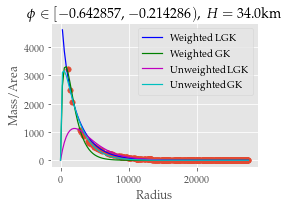

_______Phi:[-0.642857,-0.214286) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.12772491e+00 -1.23811591e-03  4.25459090e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.25484050e-01 -3.66333264e-04  1.02006138e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.99964372e-01 -6.50729750e-04  3.37829654e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.03604336e+00 -4.80670753e-04  1.02062773e+00]


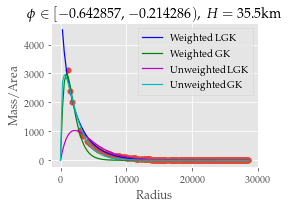

_______Phi:[-0.642857,-0.214286) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.42037000e-01 -9.90859415e-04  4.69856782e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.35154169e-01 -3.53722493e-04  1.03745817e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.95662951e-02 -4.83186426e-04  2.63260809e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.00797806e+00 -4.63949782e-04  1.18341108e+00]


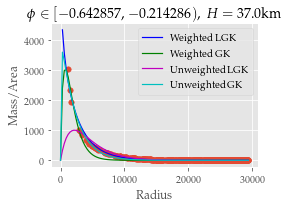

_______Phi:[-0.642857,-0.214286) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.21082159e-01 -1.09972385e-03  1.45244162e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.43431492e-01 -3.42116281e-04  1.04625591e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.68998957e-01 -4.97458859e-04  1.34086927e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.03747566e+00 -4.52140934e-04  8.46013399e-01]


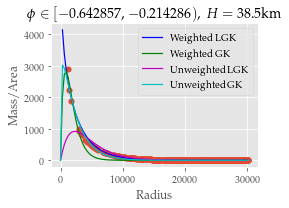

_______Phi:[-0.642857,-0.214286) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.48467843e-01 -9.32630574e-04  8.03921900e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.34068375e-01 -3.33569870e-04  9.24755328e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.33046618e-01 -5.09904517e-04  8.22014530e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.98522470e-01 -4.36362668e-04  1.07589822e+00]


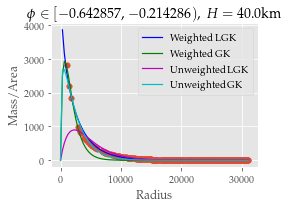

_______Phi:[-0.214286,0.214286) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.34033720e+00 -2.00107251e-03  5.88779929e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 6.30734157e-01 -1.17304500e-03  3.15368479e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.34638982e+00 -1.70717186e-03  3.80385588e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.46645098e+00 -1.35927570e-03  7.84868862e-01]


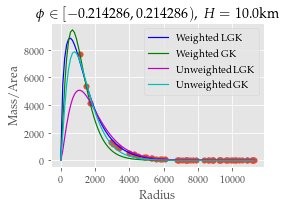

_______Phi:[-0.214286,0.214286) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.22360005e+00 -1.81085026e-03  9.79521321e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 4.61510109e-01 -9.83097850e-04  7.56414895e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.18915233e+00 -1.49834321e-03  8.16435625e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.28824962e+00 -1.14765010e-03  1.84441520e+00]


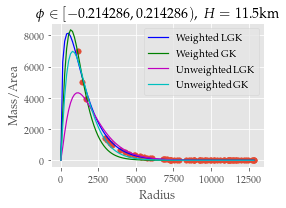

_______Phi:[-0.214286,0.214286) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.23661682e+00 -1.75074461e-03  7.62418873e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.65017739e-01 -8.53750248e-04  1.15820733e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.49794601e-01 -1.20569748e-03  5.77281093e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.20506171e+00 -1.00415375e-03  2.37167656e+00]


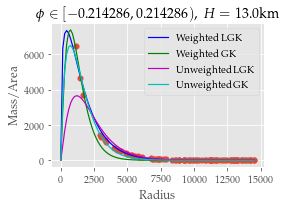

_______Phi:[-0.214286,0.214286) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.02686775e+00 -1.51822979e-03  2.33987523e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.37534579e-01 -7.46709731e-04  2.35247530e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.23882581e-01 -1.13499312e-03  5.90344192e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.16946329e+00 -8.99340754e-04  2.26765608e+00]


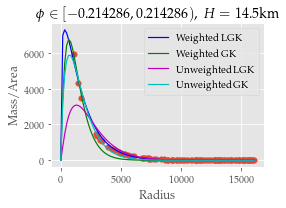

_______Phi:[-0.214286,0.214286) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.04312226e+00 -1.48546353e-03  1.85999382e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.73879162e-01 -6.69353064e-04  3.09020435e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.18460323e-01 -1.00888083e-03  9.83522504e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.11752612e+00 -8.11840729e-04  2.54379245e+00]


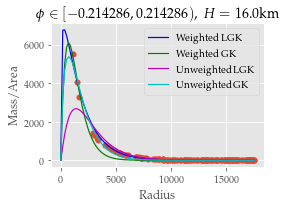

_______Phi:[-0.214286,0.214286) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.05131508e+00 -1.45264204e-03  1.57290690e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 6.96440004e-02 -5.97199782e-04  5.57321672e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.24153394e-01 -8.85159306e-04  3.14885700e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.06014633e+00 -7.38819465e-04  3.07694101e+00]


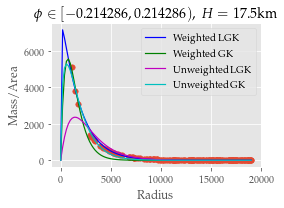

_______Phi:[-0.214286,0.214286) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.48338373e-01 -1.31042113e-03  2.55890987e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.13415667e-02 -5.45880728e-04  6.86829012e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.56234269e-01 -8.11569058e-04  4.29373821e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.01920307e+00 -6.80019844e-04  3.38708240e+00]


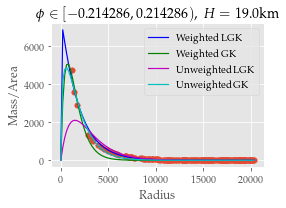

_______Phi:[-0.214286,0.214286) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.45503765e-01 -1.21020595e-03  4.44445706e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.29588859e-02 -5.03754070e-04  8.41575270e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.28421944e-01 -8.65245891e-04  1.25585005e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.00920573e+00 -6.34274751e-04  3.01405460e+00]


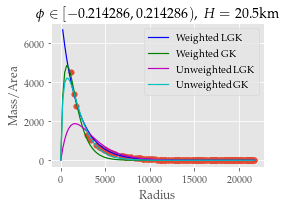

_______Phi:[-0.214286,0.214286) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.82737061e-01 -1.24757435e-03  1.64195576e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.06274750e-02 -4.67528429e-04  9.90639435e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.61329664e-01 -7.72005243e-04  3.49622325e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.89086794e-01 -5.93623267e-04  2.94777495e+00]


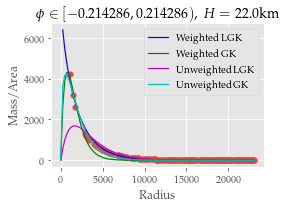

_______Phi:[-0.214286,0.214286) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.01673388e+00 -1.26548815e-03  1.24133609e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.90567713e-02 -4.37535829e-04  1.10347826e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.74538462e-01 -7.30947031e-04  2.79999359e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.76484438e-01 -5.59327435e-04  2.76524644e+00]


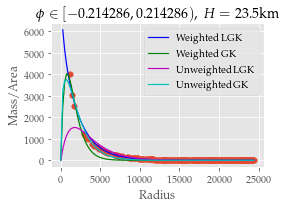

_______Phi:[-0.214286,0.214286) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.50276790e-01 -1.21572568e-03  1.78824300e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.02041938e-02 -4.15121655e-04  1.01114093e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.20190057e-01 -7.28372422e-04  1.92403052e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.76919919e-01 -5.30790145e-04  2.37384069e+00]


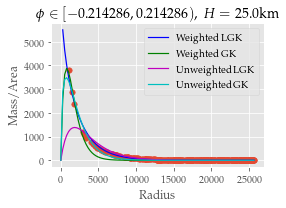

_______Phi:[-0.214286,0.214286) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.47614843e-01 -1.07052845e-03  6.00443340e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.43836529e-01 -3.87325028e-04  1.38157696e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.09527718e-01 -6.18100369e-04  7.10392118e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.40740070e-01 -5.01505878e-04  2.74529603e+00]


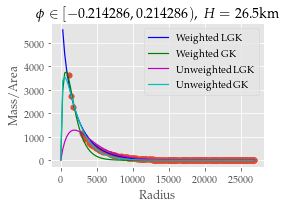

_______Phi:[-0.214286,0.214286) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.11179966e-01 -1.02909405e-03  7.06039924e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.56044294e-01 -3.68981145e-04  1.40221689e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.16950244e-01 -5.73307510e-04  1.24672087e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.04723048e+00 -4.87434693e-04  9.94562656e-01]


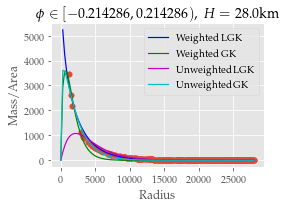

_______Phi:[-0.214286,0.214286) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.99737387e-01 -8.63041004e-04  2.47248548e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.65280742e-01 -3.52177163e-04  1.39425437e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.65213447e-01 -6.06886976e-04  4.19334731e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.96658629e-01 -4.63615446e-04  1.34358631e+00]


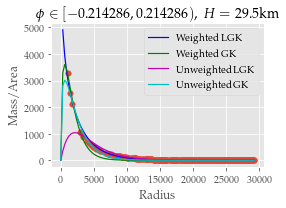

_______Phi:[-0.214286,0.214286) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.46330848e-01 -9.03103748e-04  1.78321024e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.79134126e-01 -3.37449539e-04  1.44958473e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.23451169e-01 -5.08222095e-04  2.05026230e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.73163762e-01 -4.44951461e-04  1.48329501e+00]


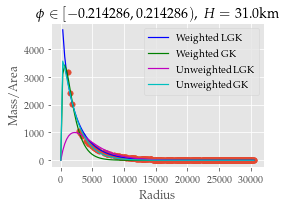

_______Phi:[-0.214286,0.214286) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.06582481e-01 -1.03540470e-03  3.17765042e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.83977433e-01 -3.24746492e-04  1.41304360e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.46928469e-01 -5.91974795e-04  4.40754076e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.71531618e-01 -4.28554249e-04  1.35149697e+00]


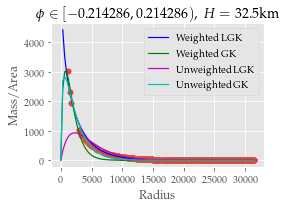

_______Phi:[-0.214286,0.214286) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.88257721e-01 -9.60310254e-04  6.45077736e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.08156131e-01 -3.09816973e-04  1.58614353e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.81973868e-02 -4.42986542e-04  3.22025011e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.53146068e-01 -4.12097305e-04  1.41759020e+00]


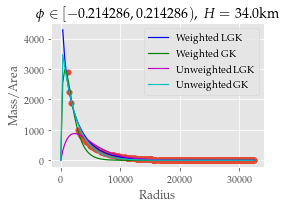

_______Phi:[-0.214286,0.214286) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.97307236e-01 -8.64933291e-04  1.04100269e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.14508143e-01 -2.99092151e-04  1.57356036e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.90070897e-01 -5.38812769e-04  5.63756679e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.64464176e-01 -3.99747544e-04  1.17844140e+00]


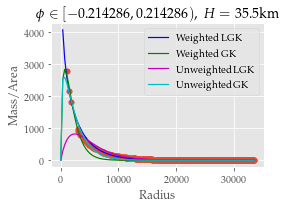

_______Phi:[-0.214286,0.214286) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.42933443e-01 -8.92669157e-04  7.54751249e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.24866650e-01 -2.88398217e-04  1.61004514e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.30334747e-01 -4.48401466e-04  1.50851160e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.57202877e-01 -3.86817667e-04  1.14334314e+00]


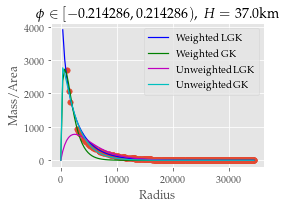

_______Phi:[-0.214286,0.214286) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.19897927e-01 -8.95618292e-04  8.68762139e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.37055290e-01 -2.78343558e-04  1.67720117e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.16291358e-01 -4.34148904e-04  1.55315800e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.11854540e-01 -3.72791403e-04  1.55058276e+00]


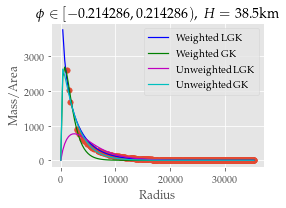

_______Phi:[-0.214286,0.214286) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.31634455e-01 -1.05436788e-03  1.10949429e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.44872477e-01 -2.69562285e-04  1.69460782e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.06356152e-02 -4.26490291e-04  1.81128471e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.95008390e-01 -3.66957444e-04  6.96139904e-01]


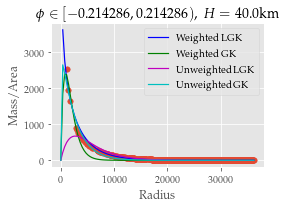

_______Phi:[0.214286,0.642857) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.04513593e+00 -1.63693233e-03  2.71957371e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.65968540e-01 -9.03375445e-04  1.30857374e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 9.24411507e-01 -1.30308304e-03  4.05477707e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.27409038e+00 -1.07337751e-03  1.68477445e+00]


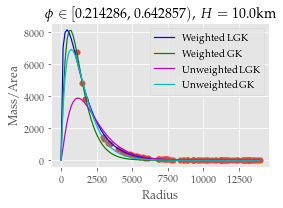

_______Phi:[0.214286,0.642857) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.35274670e+00 -1.78848312e-03  3.31257660e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 3.17667135e-01 -7.77295826e-04  1.37425108e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.45843131e-01 -1.09980460e-03  1.01159289e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.15289792e+00 -9.13418033e-04  2.70625029e+00]


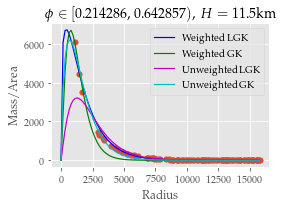

_______Phi:[0.214286,0.642857) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.52303642 -0.00185374  0.9750004 ]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 1.14997230e-01 -6.54219260e-04  4.68305958e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.99939261e-01 -1.05895052e-03  5.85587129e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.10053645e+00 -8.02695626e-04  2.81548789e+00]


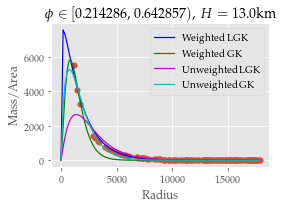

_______Phi:[0.214286,0.642857) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.77129844 -0.00196716  0.17510102]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 2.30915679e-02 -5.72917661e-04  7.44635604e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.16675125e-01 -8.78247392e-04  3.23766077e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.17391215e+00 -7.25292238e-04  1.07849692e+00]


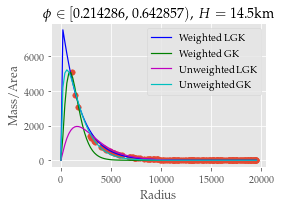

_______Phi:[0.214286,0.642857) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.20103790e-01 -1.28753093e-03  2.98001255e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.29479812e-02 -5.11639913e-04  1.01698304e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.34354646e-01 -7.46920536e-04  9.26271896e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.80690461e-01 -6.43218913e-04  3.94938660e+00]


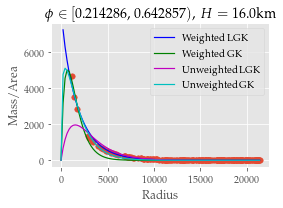

_______Phi:[0.214286,0.642857) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.08584405e+00 -1.38032541e-03  9.53880681e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.43526115e-02 -4.63231859e-04  1.27886922e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.11241431e-01 -7.81298808e-04  2.52210392e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.48371387e-01 -5.88216007e-04  4.00822558e+00]


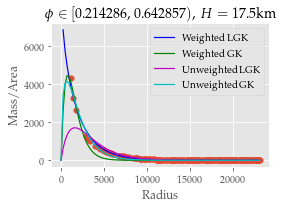

_______Phi:[0.214286,0.642857) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.02792815e+00 -1.28047790e-03  1.17945416e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.18779607e-01 -4.26654138e-04  1.34648412e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.38145493e-01 -7.87858967e-04  1.94577944e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.14705658e-01 -5.42056569e-04  4.22228136e+00]


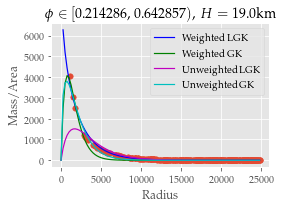

_______Phi:[0.214286,0.642857) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.02300484e-01 -1.14591791e-03  4.67497649e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.70791207e-01 -3.91238920e-04  1.75439718e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.72913092e-01 -6.76989939e-04  5.20632686e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.02949567e-01 -5.05412085e-04  3.83467789e+00]


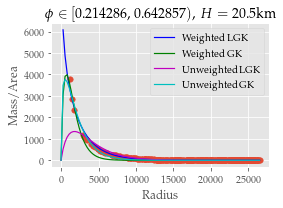

_______Phi:[0.214286,0.642857) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.95396651e-01 -1.12380500e-03  4.47762251e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.92942429e-01 -3.65273972e-04  1.86587745e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.36412302e-01 -5.69426993e-04  1.11229812e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.04865885e+00 -4.85891436e-04  9.51851965e-01]


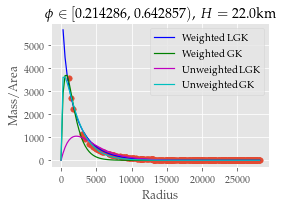

_______Phi:[0.214286,0.642857) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.41226065e-01 -9.85210870e-04  1.06404010e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.09003794e-01 -3.43136052e-04  1.91180631e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.66454852e-01 -5.90412766e-04  8.64142432e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.75535322e-01 -4.54451620e-04  1.50057104e+00]


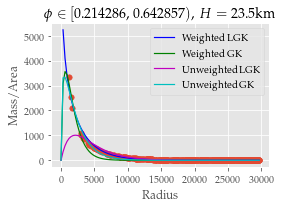

_______Phi:[0.214286,0.642857) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.74992791e+00 -1.70830948e-03  9.27017005e-02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.24841480e-01 -3.23497849e-04  1.96844938e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.87365672e-01 -6.11109994e-04  3.51241653e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.00685801e-01 -4.26208262e-04  2.42941362e+00]


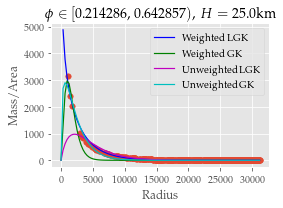

_______Phi:[0.214286,0.642857) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.97084589e-01 -1.03439380e-03  3.35385635e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.52128230e-01 -3.05015046e-04  2.22983296e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.12760222e-02 -4.64954719e-04  3.11184339e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.94742876e-01 -4.05641528e-04  2.22786710e+00]


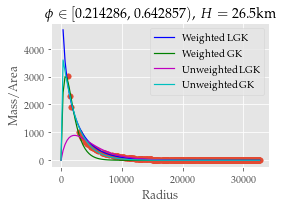

_______Phi:[0.214286,0.642857) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.27891062e-01 -9.33603703e-04  9.42893540e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.57181724e-01 -2.91165520e-04  2.14780840e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.82457303e-01 -5.26556685e-04  5.90553203e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.02400375e-01 -3.88613135e-04  1.84921757e+00]


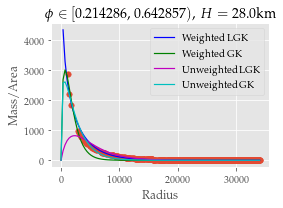

_______Phi:[0.214286,0.642857) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.21652968e-01 -9.25869499e-04  9.25349334e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.79505348e-01 -2.76396622e-04  2.37176051e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.62951199e-01 -4.82195492e-04  1.25733226e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.84092636e-01 -3.77133662e-04  8.08968478e-01]


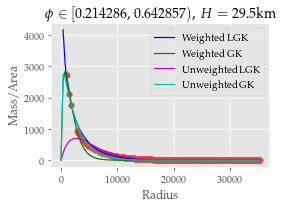

_______Phi:[0.214286,0.642857) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.22059973e+00 -1.26816718e-03  1.90973978e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.96066124e-01 -2.63419069e-04  2.51193612e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.17891725e-01 -4.50735618e-04  1.60866317e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.70848224e-01 -3.55889670e-04  1.90820500e+00]


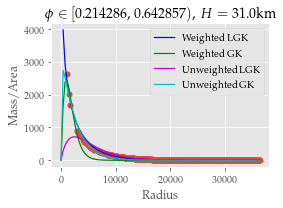

_______Phi:[0.214286,0.642857) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.08406580e+00 -1.19754933e-03  4.45195409e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.10860862e-01 -2.51805212e-04  2.63703147e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.86907591e-03 -3.85800856e-04  3.43108413e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.96573461e-01 -3.44005217e-04  1.36607122e+00]


c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in power
  """


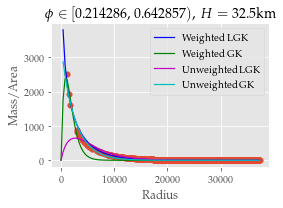

_______Phi:[0.214286,0.642857) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.66090857e-01 -9.71518614e-04  3.10857422e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.31766048e-01 -2.39954307e-04  2.90039991e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 8.40173959e-02 -4.16057555e-04  1.75453844e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.05256248e-01 -3.26314244e-04  2.68318822e+00]


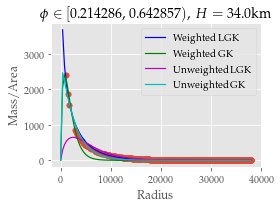

_______Phi:[0.214286,0.642857) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.39369189e-01 -1.08328037e-03  9.93992694e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.53382682e-01 -2.28766190e-04  3.21662443e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.34260519e-01 -5.01660244e-04  3.09878110e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 7.53510228e-01 -3.11828540e-04  3.75668501e+00]


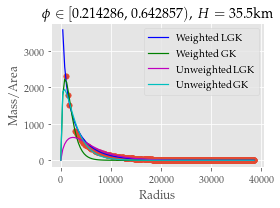

_______Phi:[0.214286,0.642857) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.55310185e-01 -1.00253689e-03  1.58371052e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.75064942e-01 -2.18267817e-04  3.57689063e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.68457191e-01 -2.74769599e-04  1.73585792e+04]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 6.95549025e-01 -2.97889136e-04  5.57251557e+00]


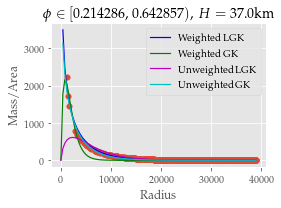

_______Phi:[0.214286,0.642857) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.80748281e-01 -7.90876002e-04  1.68897997e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.78342388e-01 -2.10944781e-04  3.47971968e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.82986591e-01 -2.84026955e-04  8.93917564e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.63037832e-01 -2.96282523e-04  1.15622276e+00]


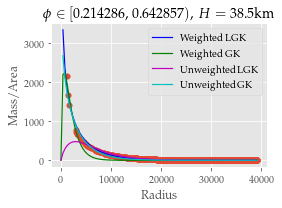

_______Phi:[0.214286,0.642857) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.81365386e-01 -9.02434085e-04  4.47292677e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.10753357e-01 -1.99894484e-04  4.21114551e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.06828126e-01 -2.68194280e-04  1.00802417e+04]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.38886723e-01 -2.85861974e-04  1.29362753e+00]


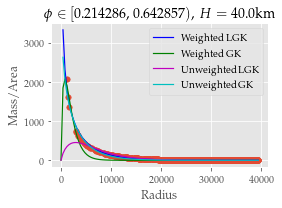

_______Phi:[0.642857,1.07143) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.11500953e+00 -1.57312196e-03  1.24189961e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[ 8.83508263e-02 -6.70316452e-04  5.72822414e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.20040663e-01 -1.06337529e-03  1.05021935e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.02165637e+00 -8.17282231e-04  5.29300442e+00]


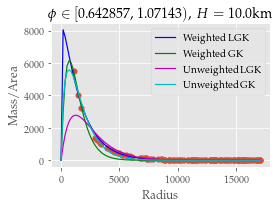

_______Phi:[0.642857,1.07143) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.61897513e-01 -1.38904551e-03  2.60764032e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.35163781e-03 -5.67799006e-04  8.97481492e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.09098397e-01 -8.34450504e-04  6.42832732e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.78719639e-01 -7.05015526e-04  4.91515881e+00]


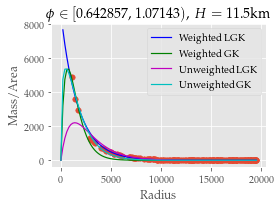

_______Phi:[0.642857,1.07143) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.11644452e+00 -1.43976229e-03  8.32139268e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.39686460e-02 -4.92779968e-04  1.25019546e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 7.94438376e-01 -9.59516340e-04  4.27587918e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.09818580e+00 -6.34790583e-04  1.29273091e+00]


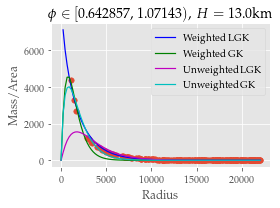

_______Phi:[0.642857,1.07143) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.98945392e-01 -1.31085890e-03  1.49028459e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.54196047e-01 -4.33091799e-04  1.73980991e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.70183999e-01 -7.67572805e-04  3.10439597e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.93914720e-01 -5.53096614e-04  5.00103866e+00]


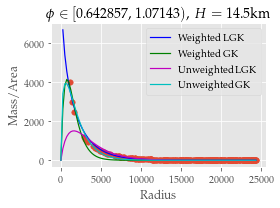

_______Phi:[0.642857,1.07143) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.32434211e-01 -1.22000589e-03  1.97065516e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.05770647e-01 -3.87504936e-04  2.17388108e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.51182812e-01 -6.83312870e-04  5.88849173e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.00643253e+00 -5.11471633e-04  1.48343689e+00]


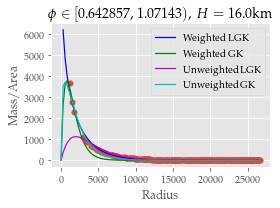

_______Phi:[0.642857,1.07143) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.87881069e-01 -9.77784030e-04  1.56795093e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.40954270e-01 -3.52424228e-04  2.46338340e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.79222824e-01 -6.21556606e-04  8.36133848e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.54978848e-01 -4.60270111e-04  4.17406419e+00]


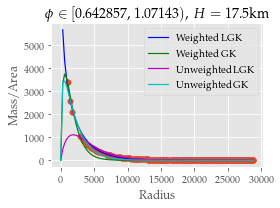

_______Phi:[0.642857,1.07143) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.23204563e-01 -1.14707875e-03  1.63910678e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.70537849e-01 -3.23397701e-04  2.71447958e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.07466641e-01 -6.11032892e-04  6.20106176e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.42331530e-01 -4.26110702e-04  3.76111101e+00]


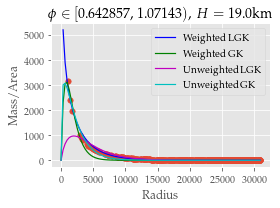

_______Phi:[0.642857,1.07143) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.45496806e-01 -1.05282656e-03  4.86574067e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.95604929e-01 -2.99561783e-04  2.94258452e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.42422298e-01 -5.63891107e-04  8.83530403e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.45444473e-01 -3.98709532e-04  3.04869196e+00]


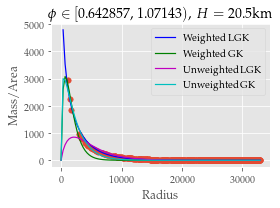

_______Phi:[0.642857,1.07143) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.38414077e-01 -9.51655606e-04  8.60299913e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.19372137e-01 -2.78674028e-04  3.18190719e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.20698509e-01 -5.37369840e-04  9.08079998e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 8.27511472e-01 -3.73458480e-04  2.97704320e+00]


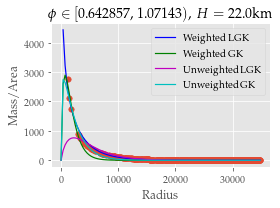

_______Phi:[0.642857,1.07143) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.81274656e-01 -1.03492088e-03  3.23425891e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.43646674e-01 -2.60226375e-04  3.48430014e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.90535390e-01 -5.01757840e-04  1.01892789e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.01321304e-01 -3.50902418e-04  3.15976838e+00]


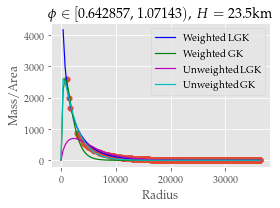

_______Phi:[0.642857,1.07143) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.64766741e-01 -1.04885582e-03  1.71204436e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.67170338e-01 -2.43707719e-04  3.81178777e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.12119295e-02 -4.33872926e-04  2.35393624e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.92765247e-01 -3.37062188e-04  1.21461518e+00]


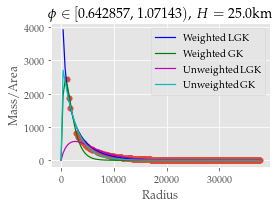

_______Phi:[0.642857,1.07143) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.42796721e-01 -9.86948538e-04  3.58428206e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.94195833e-01 -2.27680888e-04  4.28691106e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.11371320e-01 -4.17594789e-04  1.38722031e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 6.84179048e-01 -3.08543813e-04  6.30829862e+00]


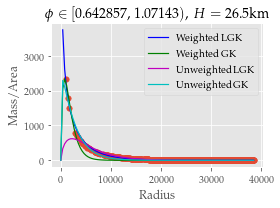

_______Phi:[0.642857,1.07143) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.53723424e-01 -1.04156975e-03  1.65229891e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.33551933e-01 -2.11975104e-04  5.33530850e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.35612091e-01 -3.27481979e-04  6.93684193e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 5.98848626e-01 -2.88530022e-04  1.13284476e+01]


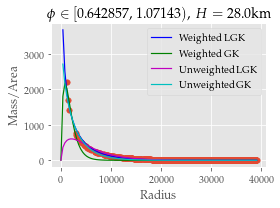

_______Phi:[0.642857,1.07143) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.41670291e-01 -9.49550102e-04  3.10983683e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.64965571e-01 -1.98229097e-04  6.27689766e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-9.93691177e-02 -3.21526211e-04  5.02171305e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.62362608e-01 -2.87903423e-04  9.71388946e-01]


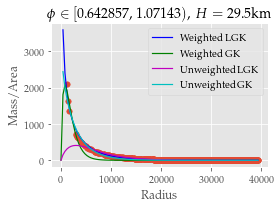

_______Phi:[0.642857,1.07143) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.83829256e-01 -1.02463746e-03  1.19016327e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.92251609e-01 -1.86158586e-04  7.20020047e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.20526795e-01 -3.25190524e-04  5.77276205e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 7.94337206e-01 -2.71989811e-04  1.53248628e+00]


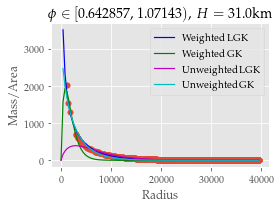

_______Phi:[0.642857,1.07143) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.08090045e-01 -8.60939701e-04  6.62149721e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.18037532e-01 -1.75144961e-04  8.19744469e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-8.38192679e-02 -3.18020826e-04  4.07127989e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 3.79343878e-01 -2.40110235e-04  5.12077756e+01]


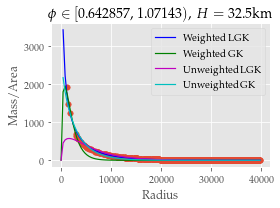

_______Phi:[0.642857,1.07143) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.43235382e-01 -8.34239668e-04  9.72836276e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.41515349e-01 -1.65162355e-04  9.20958288e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.12841235e-02 -3.27818942e-04  2.64186391e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 3.13578346e-01 -2.27030007e-04  8.13493185e+01]


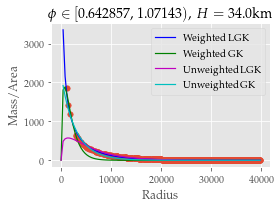

_______Phi:[0.642857,1.07143) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.72506236e-01 -8.21654697e-04  7.46580889e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.61858538e-01 -1.56348353e-04  1.01462716e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-8.70710021e-02 -3.02708852e-04  3.63411862e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 3.79177581e-01 -2.21589526e-04  4.13740559e+01]


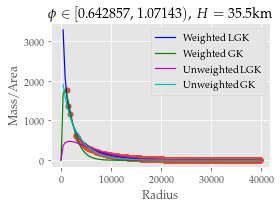

_______Phi:[0.642857,1.07143) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.59752938e-01 -7.38148905e-04  1.44179058e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.75884013e-01 -1.48836965e-04  1.06939696e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.07998325e-01 -2.44571133e-04  7.71078194e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.78140314e-01 -2.08616868e-04  9.06467642e+01]


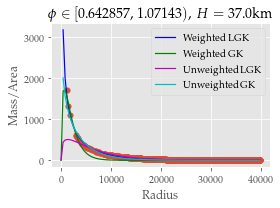

_______Phi:[0.642857,1.07143) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.38218127e-01 -6.85908515e-04  3.12077038e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.91234008e-01 -1.41735254e-04  1.14232618e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.94004844e-01 -2.22204238e-04  1.38564005e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.93336049e-01 -1.96903136e-04  1.73947702e+02]


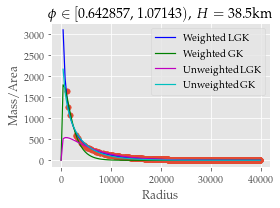

_______Phi:[0.642857,1.07143) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.87005345e-01 -7.00292948e-04  2.15392556e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.07658033e-01 -1.35062615e-04  1.23435950e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.71212548e-01 -1.85217595e-04  2.24955586e+04]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 7.70598663e-01 -2.19517164e-04  1.02539316e+00]


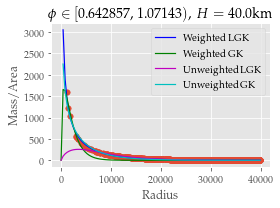

_______Phi:[1.07143,1.5) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.06821125e+00 -1.43484378e-03  1.08732051e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.22710746e-02 -5.00966242e-04  1.23796910e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.57694037e-01 -8.68148668e-04  1.90965289e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.18230454e-01 -6.28419129e-04  5.21802935e+00]


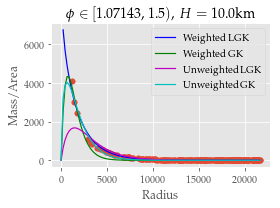

_______Phi:[1.07143,1.5) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.80053077e-01 -1.25874945e-03  2.93286272e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-1.89525706e-01 -4.20657099e-04  1.97161175e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.00217267e-01 -7.58188137e-04  4.54696660e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.02781296e+00 -5.51714496e-04  1.35681461e+00]


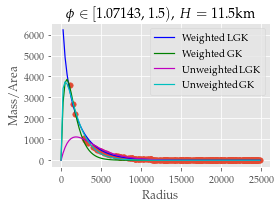

_______Phi:[1.07143,1.5) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.05986881e+00 -1.31637389e-03  7.84903434e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.52030558e-01 -3.65803005e-04  2.58167162e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 4.75526663e-01 -7.26650477e-04  2.24693338e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.36304004e-01 -4.75544051e-04  4.76394684e+00]


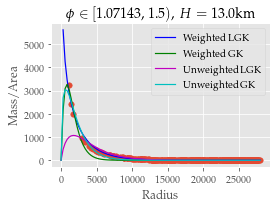

_______Phi:[1.07143,1.5) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.79103320e-01 -1.12414670e-03  4.14509333e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.96056293e-01 -3.22821202e-04  2.99515931e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.67781647e-01 -6.11072116e-04  7.65144732e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 7.83567433e-01 -4.22915641e-04  5.42591839e+00]


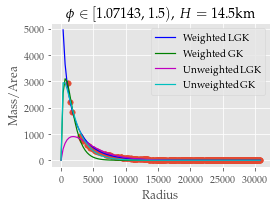

_______Phi:[1.07143,1.5) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.02172729e-01 -1.02369737e-03  5.74470659e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.32169737e-01 -2.90763966e-04  3.39918408e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.65064646e-01 -6.04086710e-04  3.41932998e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 7.89437159e-01 -3.86029285e-04  4.02434175e+00]


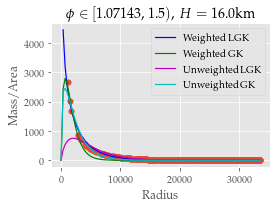

_______Phi:[1.07143,1.5) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.43525647e-01 -9.13004675e-04  1.42736615e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.74906025e-01 -2.62610149e-04  4.12601997e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.52156072e-01 -5.95144590e-04  3.39033064e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 7.57700467e-01 -3.52768699e-04  4.16069111e+00]


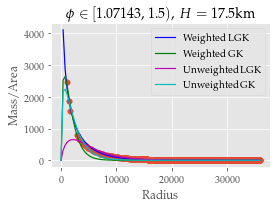

_______Phi:[1.07143,1.5) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.10484343e+00 -1.23804896e-03  3.64611192e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.20944911e-01 -2.37256999e-04  5.15792723e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.49849409e-01 -4.80571718e-04  1.15998796e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.41761124e-01 -3.29626250e-04  1.56541136e+00]


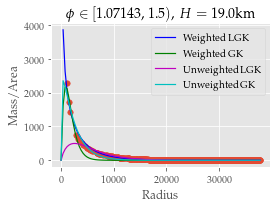

_______Phi:[1.07143,1.5) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.46509146e-01 -9.56040296e-04  6.27046232e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.66008169e-01 -2.14666693e-04  6.43637882e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.41085262e-02 -3.84362292e-04  3.70646511e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.46813552e-01 -3.05581448e-04  1.17328539e+00]


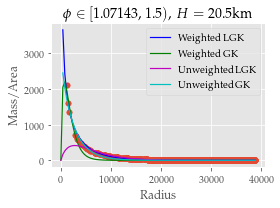

_______Phi:[1.07143,1.5) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.82043417e-01 -1.02211354e-03  2.42291210e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.17699408e-01 -1.94528250e-04  8.58962112e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.59525113e-02 -4.03336513e-04  1.71640504e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 4.34239210e-01 -2.64120474e-04  3.48450083e+01]


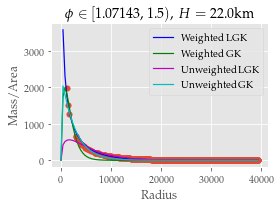

_______Phi:[1.07143,1.5) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.32844129e-01 -9.60548585e-04  2.98736038e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.47995757e-01 -1.77924710e-04  9.78000623e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.45427592e-03 -3.62352665e-04  2.28793197e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 3.26376446e-01 -2.41262217e-04  7.37217598e+01]


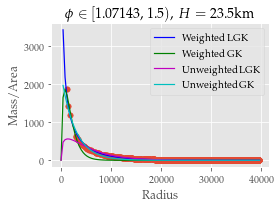

_______Phi:[1.07143,1.5) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.17594009e-01 -8.40749972e-04  1.13424478e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.96623808e-01 -1.61804437e-04  1.29700529e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.10370864e-01 -3.26177666e-04  4.60081231e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.23615864e-01 -2.21236311e-04  1.52567668e+02]


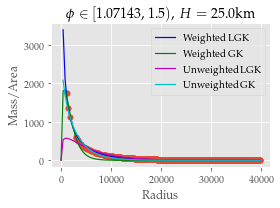

_______Phi:[1.07143,1.5) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.04418114e-01 -8.21550852e-04  1.14623919e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.08112954e-01 -1.51385869e-04  1.30302498e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.82593800e-01 -1.97564968e-04  5.37235096e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.91059405e-01 -2.11727196e-04  7.19344672e+01]


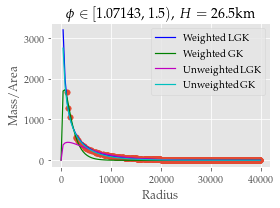

_______Phi:[1.07143,1.5) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.86160509e-01 -7.93085231e-04  1.19740985e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.20874846e-01 -1.42603584e-04  1.33716104e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.02650428e-01 -2.41279186e-04  1.45305542e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.78511771e-01 -1.95310787e-04  1.70319939e+02]


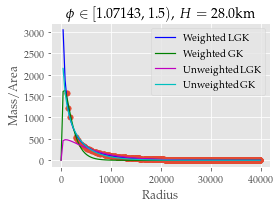

_______Phi:[1.07143,1.5) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.69081617e-01 -7.22928100e-04  2.40727768e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.71786539e-01 -1.29012713e-04  1.83514124e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.86604621e-01 -1.98385523e-04  2.40352460e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 9.99635786e-02 -1.81863689e-04  3.00029762e+02]


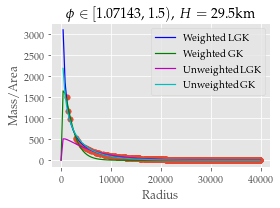

_______Phi:[1.07143,1.5) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.45206721e-01 -7.44546590e-04  1.37526124e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.32502082e-01 -1.38002449e-04  5.96686667e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.53515001e-01 -2.00702286e-04  1.82735793e+04]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 7.38808006e-01 -2.05547823e-04  1.00190548e+00]


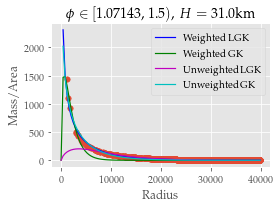

_______Phi:[1.07143,1.5) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.13580358e-01 -7.95287250e-04  8.60044420e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.16530642e-01 -1.23196246e-04  1.07740327e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.30744988e-01 -1.80820638e-04  2.95846226e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.77378610e-01 -1.70079706e-04  1.23080317e+02]


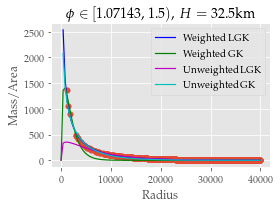

_______Phi:[1.07143,1.5) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.06123437e-01 -7.84621427e-04  8.53807249e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.68534186e-01 -1.12108743e-04  1.48616620e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.20961154e-01 -1.69340239e-04  2.55223830e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.32087443e-01 -1.61612327e-04  1.71059091e+02]


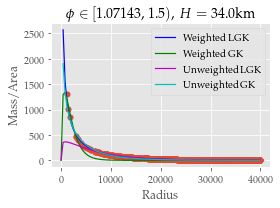

_______Phi:[1.07143,1.5) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.14995819e-01 -7.31698191e-04  1.45954730e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.80059519e-01 -1.06531564e-04  1.55528528e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.03832737e-01 -2.18870949e-04  5.19034413e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 5.39876420e-02 -1.51011854e-04  3.07045371e+02]


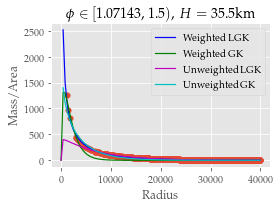

_______Phi:[1.07143,1.5) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.40282308e-01 -6.65587816e-04  2.21210525e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.76057460e-01 -1.01273457e-04  1.42311299e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.81813703e-01 -1.50309399e-04  3.51721070e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 4.90999743e-02 -1.46902589e-04  3.07702953e+02]


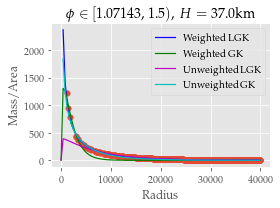

_______Phi:[1.07143,1.5) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.42589253e-01 -7.34746960e-04  1.11645756e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.39766749e-01 -9.18499833e-05  2.21525840e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.81392872e-01 -1.46628049e-04  3.41794000e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 8.66748206e-02 -1.43352532e-04  2.02236120e+02]


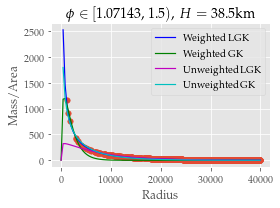

_______Phi:[1.07143,1.5) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.44506276e-01 -6.69343931e-04  2.00257547e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.49829203e-01 -8.76636547e-05  2.29285456e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.79589143e-01 -1.37960998e-04  3.21911485e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.21479284e-02 -1.34516540e-04  4.57430477e+02]


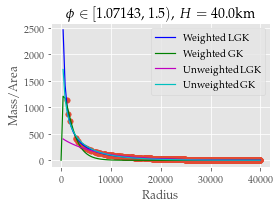

_______Phi:[1.5,1.92857) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.14265758e+00 -1.42060036e-03  4.33906247e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-2.80477170e-01 -3.63685026e-04  2.74507948e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.87977793e-01 -6.97719998e-04  3.53353632e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 7.97797820e-01 -4.72392614e-04  5.48268491e+00]


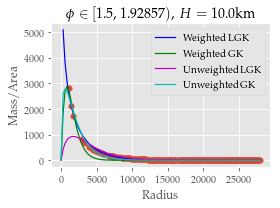

_______Phi:[1.5,1.92857) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.53196516e-01 -1.15539284e-03  2.15051743e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-3.25419126e-01 -3.10042156e-04  3.02208666e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 3.68325861e-01 -6.62472346e-04  3.40963263e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 9.75506070e-01 -4.20058506e-04  7.98887145e-01]


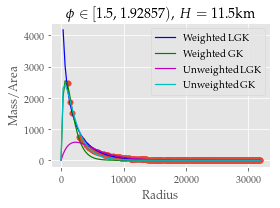

_______Phi:[1.5,1.92857) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.88391110e-01 -9.60172659e-04  9.87131769e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.03363472e-01 -2.66131810e-04  4.54570824e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.49844365e-02 -4.41072758e-04  4.41989460e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 7.17137876e-01 -3.56599689e-04  5.13362613e+00]


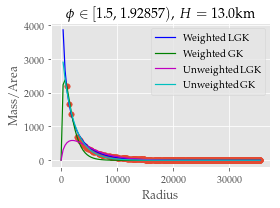

_______Phi:[1.5,1.92857) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.23986658e+00 -1.36437862e-03  1.41525659e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.65173176e-01 -2.30997837e-04  6.10251144e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.52321030e-02 -4.06545987e-04  3.92418609e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.52703702e-01 -3.24902508e-04  1.11753523e+00]


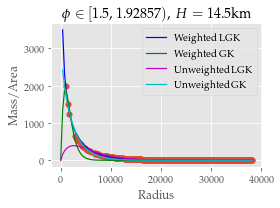

_______Phi:[1.5,1.92857) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.35419984e-01 -9.49838106e-04  5.68289155e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.10586053e-01 -2.02798499e-04  7.35220045e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.08675901e-02 -3.95850706e-04  3.70915025e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 4.47200259e-01 -2.71421777e-04  2.75010136e+01]


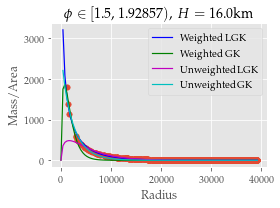

_______Phi:[1.5,1.92857) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.54274364e-01 -9.02954152e-04  8.82923193e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.05490010e-01 -1.73625107e-04  1.31277618e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.90546472e-02 -3.87154847e-04  2.84066196e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 7.56077516e-01 -2.60969050e-04  1.37530298e+00]


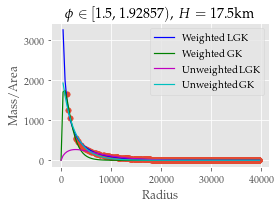

_______Phi:[1.5,1.92857) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.29989092e-01 -8.18433599e-04  1.78917406e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.87856285e-01 -1.58591576e-04  1.00563788e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.74762144e-01 -3.18962347e-04  6.41665336e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.81978365e-01 -2.10845744e-04  1.61877175e+02]


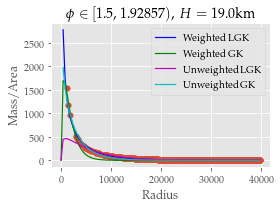

_______Phi:[1.5,1.92857) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.63390090e-01 -8.11646013e-04  1.29182751e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.77167040e-01 -1.39224839e-04  1.80889895e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 6.82819627e-03 -3.60220607e-04  1.64440262e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.21785548e-01 -1.96579894e-04  9.46274060e+01]


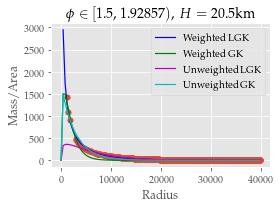

_______Phi:[1.5,1.92857) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.66496793e-01 -8.76164228e-04  6.32350943e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.39203326e-01 -1.30347799e-04  1.18797373e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.77471990e-01 -2.73997909e-04  4.95733849e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.25468783e-01 -1.77606960e-04  1.80629552e+02]


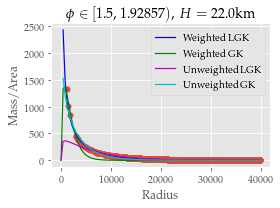

_______Phi:[1.5,1.92857) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.75075073e-01 -8.00548820e-04  1.02723654e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.60114531e-01 -1.10884748e-04  2.81548374e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.38800151e-01 -1.86891119e-04  2.82809502e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.21578743e-01 -1.66623157e-04  1.65865760e+02]


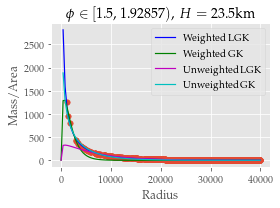

_______Phi:[1.5,1.92857) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.09995669e-01 -7.52093005e-04  1.46361176e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.68109224e-01 -1.03433606e-04  2.77393688e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.98386534e-01 -1.99799590e-04  2.04476743e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 5.83974045e-02 -1.55192794e-04  2.58373705e+02]


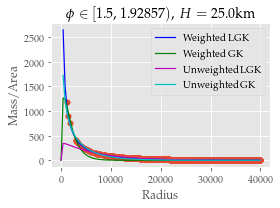

_______Phi:[1.5,1.92857) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.83090363e-01 -7.42228908e-04  1.64731054e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.88425972e-01 -9.38471144e-05  2.97538433e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.40242574e-01 -2.10703920e-04  1.29820461e+04]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 6.52227618e-01 -1.75842332e-04  1.24844571e+00]


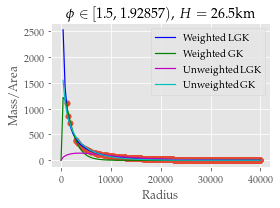

_______Phi:[1.5,1.92857) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.04887051e-01 -6.85960442e-04  2.56050409e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.14543258e-01 -8.62136322e-05  3.43011138e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.25857958e-01 -1.75869839e-04  2.11631689e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.23273202e-01 -1.42428125e-04  1.15272648e+02]


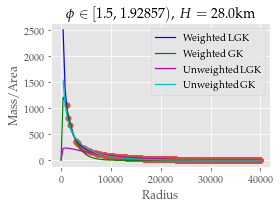

_______Phi:[1.5,1.92857) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.74049438e-01 -7.70289232e-04  8.06702553e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.21500365e-01 -8.09013779e-05  3.40121366e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.35751292e-01 -1.33639234e-04  4.13948187e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-6.24756740e-02 -1.27538517e-04  5.45483411e+02]


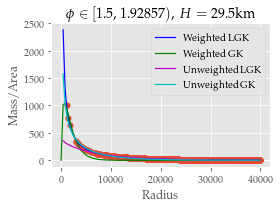

_______Phi:[1.5,1.92857) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.24462854e-01 -8.00093814e-04  5.54597379e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.31010612e-01 -7.52424926e-05  3.44450522e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.38117239e-01 -1.90455821e-04  1.01106023e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.00645539e-01 -1.20962921e-04  7.18047863e+02]


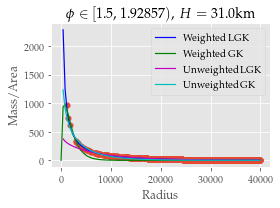

_______Phi:[1.5,1.92857) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.74994552e-01 -7.82984426e-04  7.46072682e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.33988557e-01 -7.14156870e-05  3.36349722e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.18299937e-01 -1.51350459e-04  1.61808675e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.13929359e-01 -1.09808251e-04  1.75566771e+03]


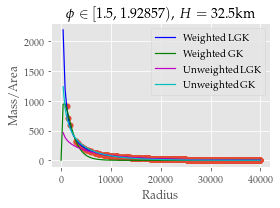

_______Phi:[1.5,1.92857) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.21422267e-01 -6.93473383e-04  1.89460796e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.53761241e-01 -6.57359354e-05  3.69779033e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.66154583e-01 -1.36931494e-04  2.26197389e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.73493022e-01 -1.06024444e-04  1.10997817e+03]


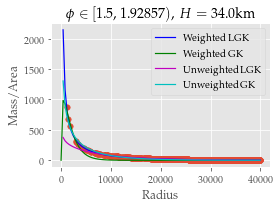

_______Phi:[1.5,1.92857) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.82008071e-01 -7.74224304e-04  6.42630743e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.91231664e-01 -7.04453230e-05  2.18431288e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.19405303e-01 -1.29779071e-04  3.19871317e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.50998145e-01 -9.92453959e-05  2.09264469e+03]


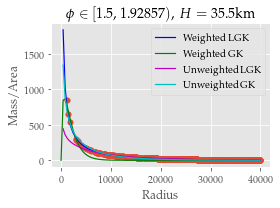

_______Phi:[1.5,1.92857) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.82214398e-01 -6.51208397e-04  2.18851107e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.73282021e-01 -5.77075920e-05  3.89712158e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.04416244e-01 -1.01740449e-04  5.39403611e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.14397565e-01 -1.04084776e-04  6.16579504e+02]


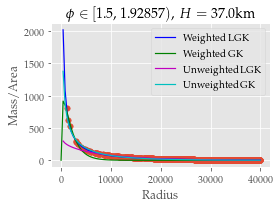

_______Phi:[1.5,1.92857) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.37122865e-01 -6.12116892e-04  2.77234242e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.62421404e-01 -5.63522371e-05  3.43250834e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.42976162e-01 -7.49629730e-05  1.40314650e+05]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.17766583e-01 -9.95976490e-05  5.78544729e+02]


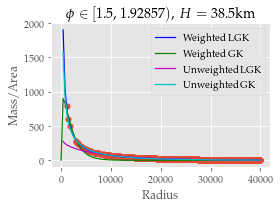

_______Phi:[1.5,1.92857) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.12872993e-01 -7.22610933e-04  8.73772634e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.28096730e-01 -5.69529935e-05  2.50987583e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.48978695e-01 -1.02621171e-04  3.27478691e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.63814288e-01 -9.45801202e-05  8.27345547e+02]


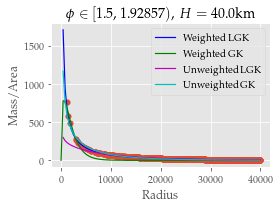

_______Phi:[1.92857,2.35714) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.08555803e-01 -9.38815757e-04  1.39229661e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.36121693e-01 -2.60273463e-04  4.65345285e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 2.17673045e-01 -5.48401521e-04  6.06973086e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 6.69406523e-01 -3.48472441e-04  5.85554428e+00]


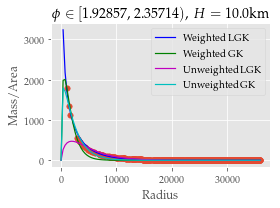

_______Phi:[1.92857,2.35714) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.98587498e-01 -9.04480962e-04  1.25147006e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.87925770e-01 -2.17649267e-04  5.44478931e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.10536311e-01 -3.89929328e-04  4.48481989e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 4.52261573e-01 -2.85534424e-04  2.38947118e+01]


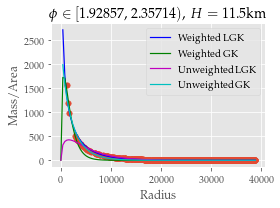

_______Phi:[1.92857,2.35714) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.10485228e-01 -9.05995938e-04  1.01971209e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.29318239e-01 -1.74129672e-04  1.30426510e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.37628714e-01 -3.28611804e-04  9.32634658e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.62801690e-01 -2.37284303e-04  8.22920621e+01]


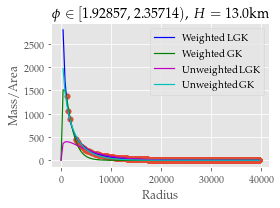

_______Phi:[1.92857,2.35714) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.83748945e-01 -9.70678955e-04  2.87928034e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-5.85685378e-01 -1.56642610e-04  7.75876083e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.16142563e-01 -2.90193647e-04  6.49265584e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.27550335e-01 -2.01416125e-04  1.89716132e+02]


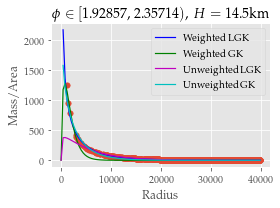

_______Phi:[1.92857,2.35714) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.35000815e-01 -7.92609409e-04  1.23865263e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.32806949e-01 -1.26713248e-04  2.10501365e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.86424395e-01 -1.97902095e-04  3.71927439e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.17568312e-01 -1.79421044e-04  1.57741139e+02]


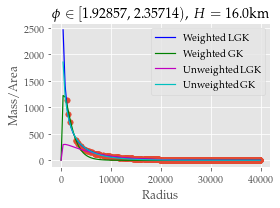

_______Phi:[1.92857,2.35714) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.86191949e-01 -7.53816653e-04  1.52616515e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.59017680e-01 -1.11484203e-04  2.25686646e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.35611977e-01 -2.54834629e-04  5.74022030e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 6.56940533e-01 -1.90486893e-04  1.14408896e+00]


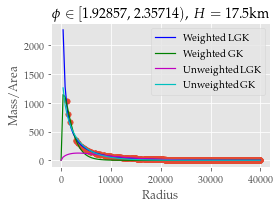

_______Phi:[1.92857,2.35714) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.20635728e-01 -7.76488126e-04  1.13258255e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.36545797e-01 -9.35198513e-05  3.67267675e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.24922140e-01 -2.22859314e-04  1.02101647e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.91021133e-02 -1.42292952e-04  4.62132183e+02]


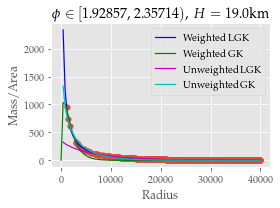

_______Phi:[1.92857,2.35714) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.08873580e-01 -7.58014430e-04  1.11316807e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.89688799e-01 -9.17655155e-05  2.36403144e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.42129571e-01 -1.74793482e-04  2.01831356e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-7.63295699e-02 -1.31314447e-04  5.13540831e+02]


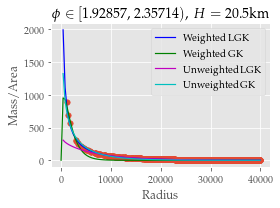

_______Phi:[1.92857,2.35714) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.94931173e-01 -7.02140543e-04  2.19393049e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.78489897e-01 -8.45191545e-05  1.95119977e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.98893416e-01 -1.50439673e-04  2.71441348e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.32900572e-02 -1.24807427e-04  3.10011195e+02]


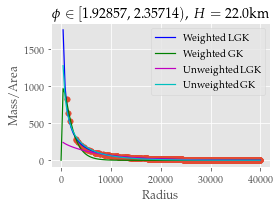

_______Phi:[1.92857,2.35714) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.51237876e-01 -7.82587952e-04  7.44882737e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.93224111e-01 -6.74266358e-05  4.35795889e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.53189867e-01 -1.71334711e-04  8.83505143e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.18498448e-01 -1.13095073e-04  5.77282505e+02]


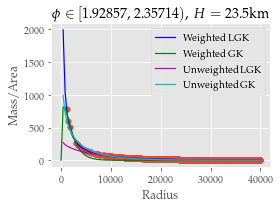

_______Phi:[1.92857,2.35714) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.35177483e-01 -6.97075173e-04  1.43660325e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.90165075e-01 -7.58138030e-05  1.90103176e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.34679875e-01 -1.28208081e-04  2.93191709e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.01924607e-01 -1.08809170e-04  4.62721936e+02]


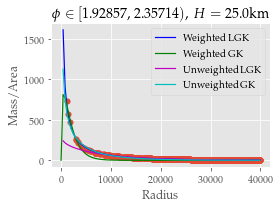

_______Phi:[1.92857,2.35714) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.33187491e-01 -6.87429161e-04  1.36042973e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.49154089e-01 -6.27680391e-05  2.67754419e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.98362013e-01 -1.12259294e-04  4.35158172e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.08042700e-01 -9.21005315e-05  2.48426366e+03]


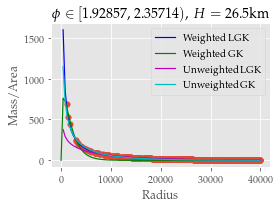

_______Phi:[1.92857,2.35714) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.52590957e-01 -6.84395656e-04  1.11764156e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.20217980e-01 -5.29100352e-05  4.40963627e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.55475374e-01 -1.11343736e-04  3.01625262e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.05228224e-01 -9.69698673e-05  3.76139741e+02]


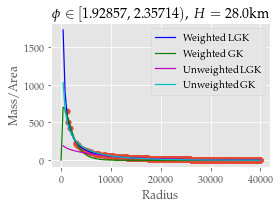

_______Phi:[1.92857,2.35714) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.26808209e-01 -6.63300279e-04  1.23302083e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.78330910e-01 -5.37764985e-05  2.98306428e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.30881404e-01 -1.03896743e-04  5.19068973e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.76391996e-01 -9.07721411e-05  6.80701122e+02]


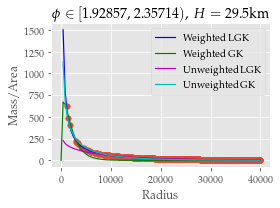

_______Phi:[1.92857,2.35714) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.46084246e-01 -7.01060103e-04  1.08623128e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.03280815e-01 -4.72950273e-05  3.39974281e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-8.02824407e-01 -6.37997107e-05  1.65859672e+05]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.26844381e-01 -8.46472406e-05  9.84060761e+02]


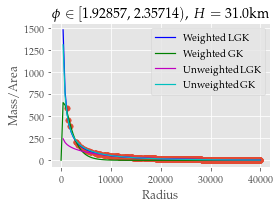

_______Phi:[1.92857,2.35714) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.52738586e-01 -6.25691516e-04  1.82850376e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.40933662e-01 -4.15505804e-05  4.33633030e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-8.4641842e-01 -5.7372652e-05  2.1527020e+05]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.25148714e-01 -8.05377911e-05  8.86106108e+02]


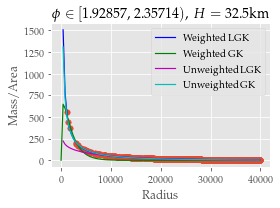

_______Phi:[1.92857,2.35714) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.95227343e-01 -6.56187499e-04  1.34178655e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.00425348e-01 -4.38324016e-05  3.00536147e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.72483673e-01 -9.57887522e-05  2.64399327e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.02246622e-01 -7.48271516e-05  1.65898409e+03]


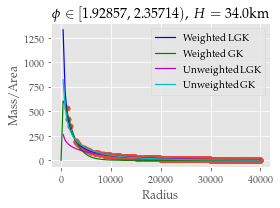

_______Phi:[1.92857,2.35714) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.37319396e-01 -6.61948396e-04  9.62391366e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.61842685e-01 -4.56517913e-05  2.20953237e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.41161464e-01 -8.27424948e-05  4.36659506e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.73048757e-01 -7.52571073e-05  1.26649997e+03]


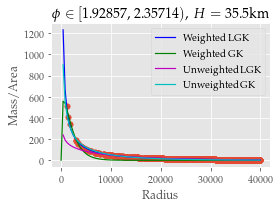

_______Phi:[1.92857,2.35714) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.14714468e-01 -7.14543533e-04  5.62075057e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.87731312e-01 -4.00659989e-05  2.47720754e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.82559701e-01 -8.64963916e-05  2.60218068e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.51781848e-01 -7.63781775e-05  3.85579960e+02]


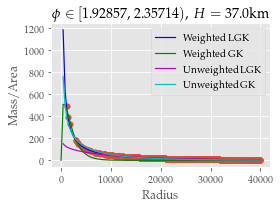

_______Phi:[1.92857,2.35714) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.02117986e-01 -6.36225725e-04  1.09592770e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.38321620e-01 -3.39965381e-05  3.54805774e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.65418659e-01 -7.39125658e-05  4.79904027e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.02257154e-01 -6.85303402e-05  1.41614495e+03]


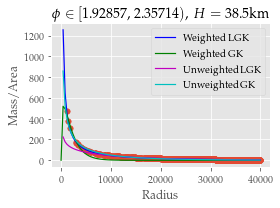

_______Phi:[1.92857,2.35714) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.63285801e-01 -6.00461667e-04  1.33450046e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.34096847e-01 -3.28395977e-05  3.30340819e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.43293824e-01 -6.56689538e-05  8.25708955e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.10624231e-01 -7.24184103e-05  6.23111315e+02]


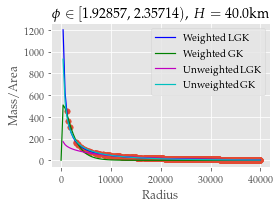

_______Phi:[2.35714,2.78571) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.81810523e-01 -7.85833029e-04  1.63920498e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.54962524e-01 -1.66826412e-04  1.16914200e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.35712048e-01 -3.61349084e-04  3.49114842e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 6.84518209e-01 -2.50845481e-04  1.39829417e+00]


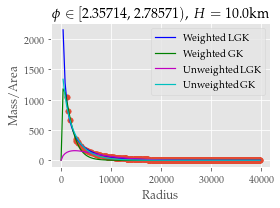

_______Phi:[2.35714,2.78571) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.62049260e-01 -7.68275878e-04  1.61329368e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.61965210e-01 -1.29960938e-04  2.12191532e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.48431213e-01 -2.48008879e-04  1.18134676e+04]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 6.30131136e-01 -2.12384594e-04  1.45818945e+00]


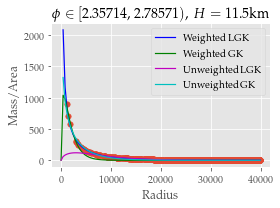

_______Phi:[2.35714,2.78571) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.25464794e-01 -7.28619211e-04  1.76164709e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.21713003e-01 -1.05791157e-04  2.80696933e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.29392195e-01 -2.10919294e-04  1.79352847e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 2.33277944e-02 -1.58511247e-04  2.21442446e+02]


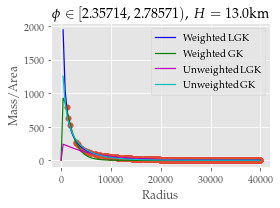

_______Phi:[2.35714,2.78571) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.28490934e-01 -8.29615316e-04  4.18973672e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.55551800e-01 -8.94323712e-05  3.15129608e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.79693403e-01 -2.33305326e-04  5.37470154e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.76693999e-03 -1.40405167e-04  2.17531595e+02]


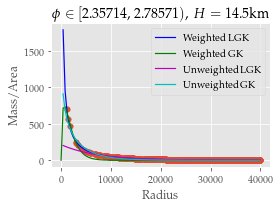

_______Phi:[2.35714,2.78571) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.97471323e-01 -6.66438853e-04  1.59200679e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.83369318e-01 -7.64946894e-05  3.42737836e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.35684861e-01 -2.32836331e-04  3.49764822e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.51258415e-01 -1.18591214e-04  6.40287350e+02]


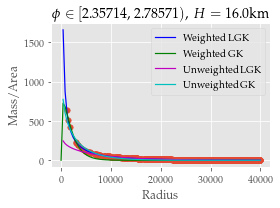

_______Phi:[2.35714,2.78571) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.14989367e-01 -6.86597474e-04  1.33076472e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.05284283e-01 -6.55330193e-05  3.59065454e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.00639854e-01 -1.64845180e-04  9.29150457e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-8.23143353e-02 -1.13139609e-04  3.05864815e+02]


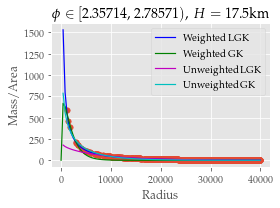

_______Phi:[2.35714,2.78571) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.78163851e-01 -6.05371051e-04  2.92186659e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.27728685e-01 -5.76249902e-05  3.88253811e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.32881849e-01 -1.07716301e-04  4.46195314e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.16799622e-01 -9.70575827e-05  8.44034644e+02]


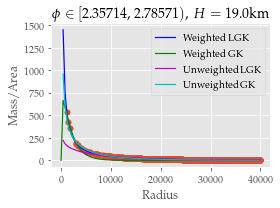

_______Phi:[2.35714,2.78571) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.16159013e-01 -7.09463768e-04  5.64784162e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.42349435e-01 -5.10742600e-05  3.96302383e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.27220496e-01 -1.42668199e-04  9.47068323e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.02468596e-01 -9.68633505e-05  2.75301017e+02]


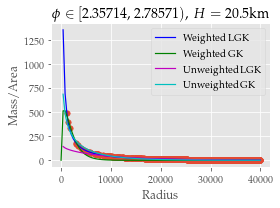

_______Phi:[2.35714,2.78571) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.38190554e-01 -6.68852431e-04  8.64581095e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.22289095e-01 -4.88476978e-05  3.11767033e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.09942734e-01 -8.07813858e-05  6.47080341e+04]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 4.71380090e-01 -1.20221456e-04  1.62415971e+00]


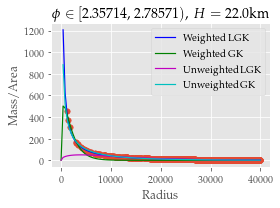

_______Phi:[2.35714,2.78571) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.77478820e-01 -5.54848934e-04  2.20080205e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.56453952e-01 -4.18011166e-05  3.76452759e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.03669535e-01 -9.87570246e-05  2.84785254e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.46393900e-01 -7.90170758e-05  7.70348831e+02]


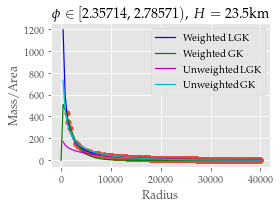

_______Phi:[2.35714,2.78571) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.15140998e-01 -5.84138711e-04  1.63897777e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.29034451e-01 -4.19060027e-05  2.84975791e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.70178263e-01 -6.69312703e-05  8.99176770e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.45756672e-01 -7.66966619e-05  7.27449647e+02]


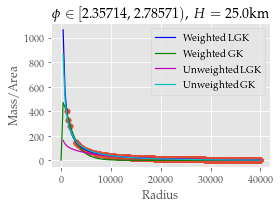

_______Phi:[2.35714,2.78571) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.94400454e-02 -5.03554860e-04  3.37529869e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.63427101e-01 -3.58250547e-05  3.48223180e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.00564661e-01 -7.76522153e-05  4.96414751e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.77954689e-01 -7.18865592e-05  8.88305347e+02]


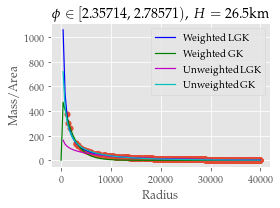

_______Phi:[2.35714,2.78571) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.28507410e-01 -5.64117665e-04  1.27864172e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.61905344e-01 -3.34138074e-05  3.22393424e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.20082504e-01 -9.20318406e-05  2.64287359e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.01817744e-01 -7.26801467e-05  4.21608494e+02]


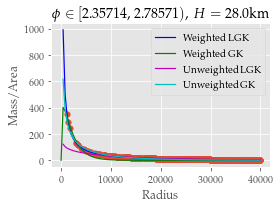

_______Phi:[2.35714,2.78571) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.86226474e-01 -6.53634780e-04  4.38737005e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.89308256e-01 -3.98655162e-05  1.77470708e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.79532928e-01 -5.41554262e-05  7.86483959e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.51753473e-01 -6.97402007e-05  6.37678158e+02]


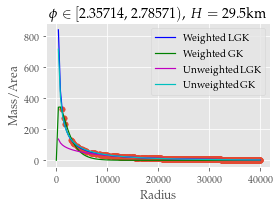

_______Phi:[2.35714,2.78571) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.44006779e-01 -6.18676381e-04  5.39081739e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.69312344e-01 -2.90010203e-05  3.04284384e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.64938415e-01 -8.71942278e-05  1.48331826e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.95398504e-01 -6.36467389e-05  8.43128056e+02]


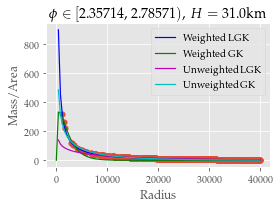

_______Phi:[2.35714,2.78571) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.83598395e-01 -5.41261106e-04  1.45889375e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.37462330e-01 -3.08585373e-05  2.26346246e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.44210120e-01 -9.21796764e-05  1.27285328e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.88278138e-01 -6.28968367e-05  7.56233031e+02]


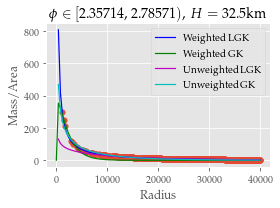

_______Phi:[2.35714,2.78571) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.23118675e-01 -5.50429403e-04  1.05484144e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.25557574e-01 -3.09954575e-05  1.99489628e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.53062975e-01 -6.01195512e-05  5.63960222e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.85238559e-01 -6.16427641e-05  7.04640839e+02]


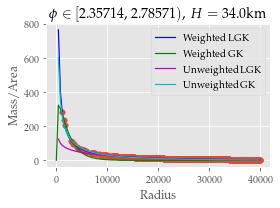

_______Phi:[2.35714,2.78571) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.87764342e-01 -5.83604360e-04  6.59244921e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.64933103e-01 -2.52594082e-05  2.53102825e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.75661311e-01 -4.84964038e-05  6.06724942e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.12593667e-01 -5.85603751e-05  8.42439324e+02]


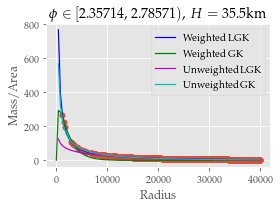

_______Phi:[2.35714,2.78571) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.00852097e-01 -5.28582787e-04  1.09319165e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.12181967e-01 -2.92137394e-05  1.60644770e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-8.30085388e-01 -3.95278902e-05  8.70444509e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.54065970e-01 -5.51972867e-05  1.14206652e+03]


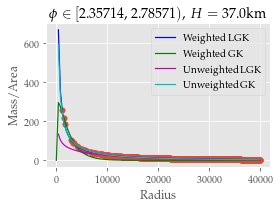

_______Phi:[2.35714,2.78571) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.97323542e-01 -5.23344939e-04  1.06271023e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.59681435e-01 -2.35925381e-05  2.22195445e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-9.37798723e-01 -2.52921979e-05  1.86538104e+05]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.13376258e-01 -5.72401825e-05  8.06713743e+02]


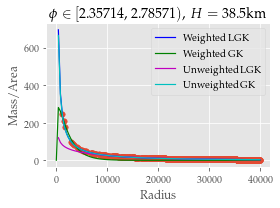

_______Phi:[2.35714,2.78571) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.04980223e-01 -5.15853962e-04  9.54276139e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.17697084e-01 -3.88133197e-05  7.18534539e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.07495112e-01 -5.83016765e-05  3.22681989e+04]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 3.86107890e-01 -8.97963586e-05  1.60293358e+00]


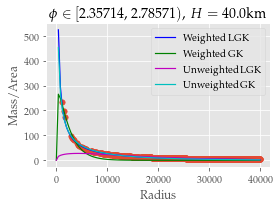

_______Phi:[2.78571,3.21429) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.86480160e-01 -6.97428079e-04  7.28256612e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.53884123e-01 -1.07927464e-04  1.12769980e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.51654607e-01 -2.20347050e-04  7.14463452e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.20881230e-01 -1.41781643e-04  4.73884668e+02]


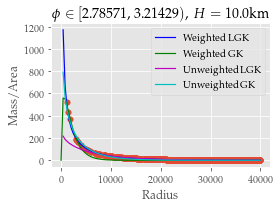

_______Phi:[2.78571,3.21429) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.83346591e-01 -6.20216375e-04  1.18825061e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.06007652e-01 -8.61250834e-05  1.38913665e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.24884042e-01 -1.79486932e-04  9.32967049e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-1.56325361e-01 -1.19614857e-04  4.80016445e+02]


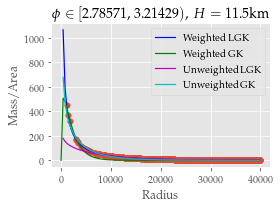

_______Phi:[2.78571,3.21429) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.98428648e-01 -6.04560931e-04  9.11920687e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.07471464e-01 -6.48433824e-05  2.55695655e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.09516291e-01 -1.02990156e-04  6.05258381e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.72279560e-01 -9.90595864e-05  1.03086759e+03]


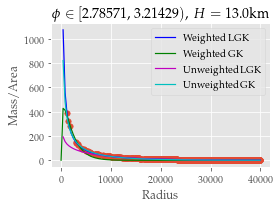

_______Phi:[2.78571,3.21429) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.51352107e-01 -5.80498382e-04  1.10292688e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.62076763e-01 -6.15995147e-05  1.57828932e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.13002643e-01 -1.03933963e-04  2.61810712e+04]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 4.53695338e-01 -1.24869703e-04  1.47241249e+00]


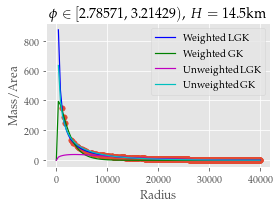

_______Phi:[2.78571,3.21429) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.45169598e-01 -6.18538769e-04  5.31464292e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.89758463e-01 -6.50580200e-05  8.30853423e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.97091827e-01 -1.43791650e-04  1.08891165e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.40589802e-01 -8.46461905e-05  5.84290997e+02]


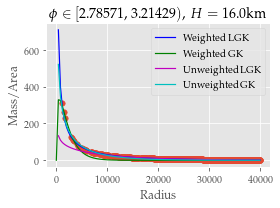

_______Phi:[2.78571,3.21429) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.94741570e-01 -5.88315900e-04  6.63925467e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.45750778e-01 -4.27158640e-05  2.38163606e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.45133980e-01 -9.44939386e-05  2.71983834e+04]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 4.58366019e-01 -1.12292715e-04  1.06386884e+00]


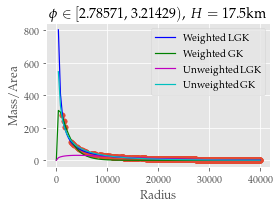

_______Phi:[2.78571,3.21429) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.73430873e-01 -5.00272952e-04  1.28765119e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.84010677e-01 -4.47291797e-05  1.35258490e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.59872889e-01 -1.09903132e-04  1.30357080e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.51902667e-01 -7.33540572e-05  4.85134779e+02]


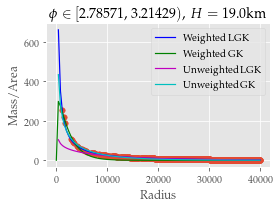

_______Phi:[2.78571,3.21429) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.30414024e-01 -5.73694498e-04  4.24087732e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.08010949e-01 -6.40300938e-05  3.32171247e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.85973866e-01 -7.69097571e-05  2.97732289e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.23271596e-01 -6.49374771e-05  7.85962364e+02]


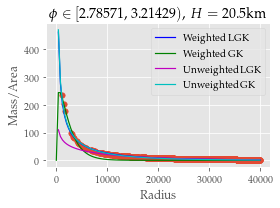

_______Phi:[2.78571,3.21429) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.70725374e-01 -4.96517050e-04  1.10969067e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.48991889e-01 -3.33772664e-05  1.86857075e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.76635585e-01 -5.93691923e-05  5.28810267e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.95712207e-01 -6.39136789e-05  5.69301259e+02]


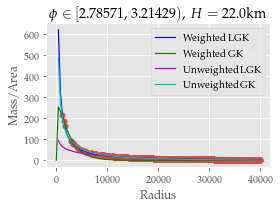

_______Phi:[2.78571,3.21429) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.61849681e-01 -4.84848747e-04  1.07703892e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.49581129e-01 -3.14276647e-05  1.74507250e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.59291570e-01 -5.87579457e-05  4.24313811e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.10415301e-01 -6.14776651e-05  6.14045936e+02]


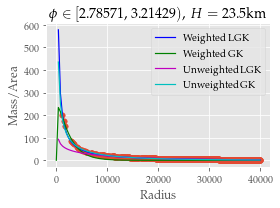

_______Phi:[2.78571,3.21429) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.59380979e-01 -4.69541562e-04  1.00583541e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.30504106e-01 -3.11402185e-05  1.39895551e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.64478988e-01 -6.78874911e-05  1.97614372e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.86834275e-01 -6.08508469e-05  4.65262044e+02]


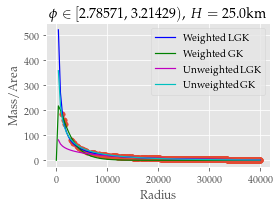

_______Phi:[2.78571,3.21429) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.97220187e-01 -4.81676093e-04  7.24566812e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.43825251e-01 -2.86064921e-05  1.45377822e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-8.51613374e-01 -4.35319999e-05  7.35652242e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.51306993e-01 -5.05859817e-05  1.78001888e+03]


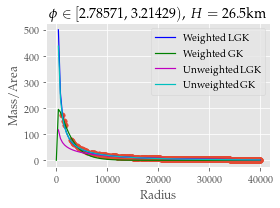

_______Phi:[2.78571,3.21429) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.73508539e-01 -4.68061335e-04  7.89814896e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.23952946e-01 -2.94444924e-05  1.17025678e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.98972207e-01 -6.03341308e-05  2.22824099e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.16169066e-01 -4.98905713e-05  1.21480922e+03]


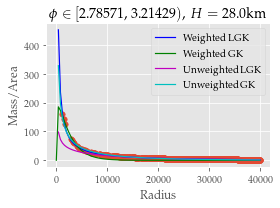

_______Phi:[2.78571,3.21429) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.01254281e-01 -4.32583026e-04  1.19507222e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.33066078e-01 -2.73683479e-05  1.18656543e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.05789211e-01 -5.54896869e-05  2.15400857e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.72969182e-01 -5.22649368e-05  7.99318405e+02]


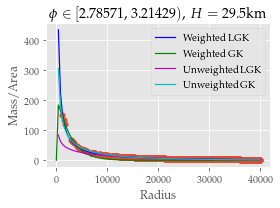

_______Phi:[2.78571,3.21429) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.76340462e-01 -4.52836363e-04  6.74855578e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.27377723e-01 -2.68868601e-05  1.07371095e+05]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.26675963e-01 -6.97144503e-05  1.14275699e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.72982936e-01 -5.23691551e-05  7.96966136e+02]


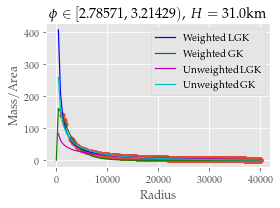

_______Phi:[2.78571,3.21429) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.68057635e-01 -4.38877669e-04  6.63594407e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.11245763e-01 -2.74748032e-05  8.98383011e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-8.31209556e-01 -4.07996987e-05  5.03072139e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.75953190e-01 -4.42220093e-05  1.74327387e+03]


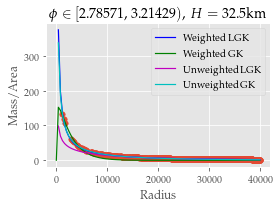

_______Phi:[2.78571,3.21429) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.09209797e-01 -4.64197346e-04  4.81977356e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.13483327e-01 -2.64482570e-05  8.68245498e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.66800896e-01 -5.95426081e-05  1.37420063e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.07430623e-01 -4.81736826e-05  9.55744301e+02]


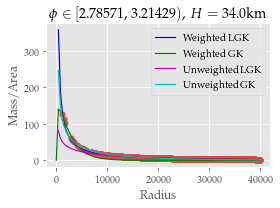

_______Phi:[2.78571,3.21429) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.07668071e-01 -4.39504945e-04  4.46449230e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-9.03926271e-01 -2.71637302e-05  7.70144506e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.91448045e-01 -7.63504284e-05  7.76726986e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.57239649e-01 -4.02732983e-05  3.34546255e+03]


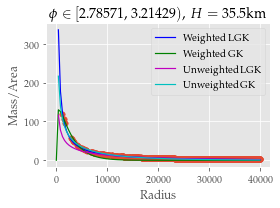

_______Phi:[2.78571,3.21429) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.15246763e-01 -4.03364193e-04  7.82169362e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.86974086e-01 -2.76417232e-05  6.41552604e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-8.21398380e-01 -3.77059297e-05  4.01207761e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.68749495e-01 -4.75230827e-05  5.90153965e+02]


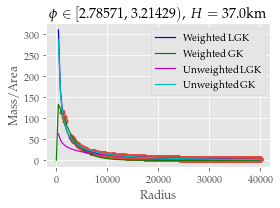

_______Phi:[2.78571,3.21429) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.78342041e-02 -3.60872272e-04  1.07233762e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.83698177e-01 -2.74832885e-05  6.01344513e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.25442517e-01 -7.47574806e-05  4.08111019e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.23742950e-01 -4.56687978e-05  9.57565738e+02]


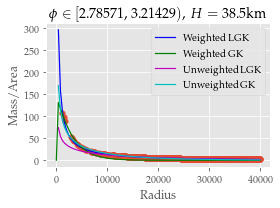

_______Phi:[2.78571,3.21429) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.70420038e-02 -3.72694780e-04  8.35247607e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.87718876e-01 -2.61190313e-05  5.90800641e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.61653872e-01 -4.60246233e-05  2.37338200e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.61958901e-01 -4.34977867e-05  1.28230555e+03]


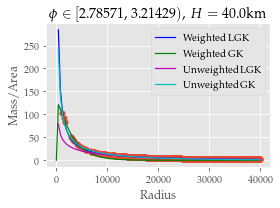

_______Phi:[3.21429,3.64286) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.31787070e-01 -4.62291309e-04  6.04205556e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.22790676e-01 -5.89019775e-05  6.80064379e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.14226659e-01 -1.17619108e-04  7.39548509e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.39171310e-01 -7.73333143e-05  8.67370957e+02]


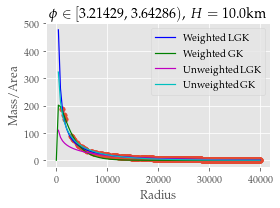

_______Phi:[3.21429,3.64286) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.04238807e-01 -4.46289563e-04  6.14490788e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.63320711e-01 -4.79899018e-05  7.88213226e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.87484858e-01 -6.08193610e-05  4.57756288e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.92715474e-01 -7.27614227e-05  4.81558969e+02]


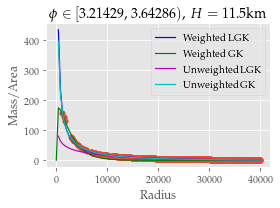

_______Phi:[3.21429,3.64286) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.35650472e-01 -3.96693335e-04  8.14945888e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.66021081e-01 -4.27988533e-05  6.94037500e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.29358722e-01 -7.64750008e-05  1.22367039e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.89369140e-01 -6.17358803e-05  9.35220163e+02]


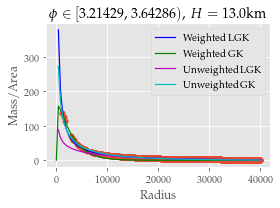

_______Phi:[3.21429,3.64286) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.32172342e-01 -3.92635846e-04  7.36788139e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.40763590e-01 -4.18687233e-05  5.00460886e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.23366716e-01 -7.95353352e-05  1.06236604e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.01601151e-01 -5.77029652e-05  9.30185563e+02]


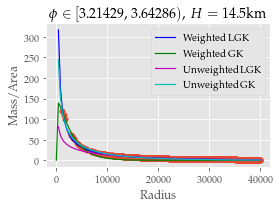

_______Phi:[3.21429,3.64286) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.14231448e-01 -3.79606607e-04  7.30278413e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.58129297e-01 -3.73181224e-05  5.12376162e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.18053988e-01 -5.88052569e-05  1.83734200e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.79804177e-01 -5.08507360e-05  1.64318188e+03]


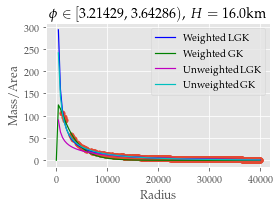

_______Phi:[3.21429,3.64286) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.52353039e-01 -3.87909097e-04  5.04508117e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.52741460e-01 -3.57125998e-05  4.43217378e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.04206683e-01 -5.71131726e-05  1.48803689e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.85863935e-01 -5.39231970e-05  6.44967956e+02]


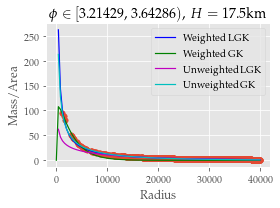

_______Phi:[3.21429,3.64286) __ H:19000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.37618086e-01 -3.77177140e-04  4.99338945e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.43538043e-01 -3.47545541e-05  3.75035686e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.63248075e-01 -4.82374032e-05  2.09038022e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.36916879e-01 -4.81874739e-05  8.87566231e+02]


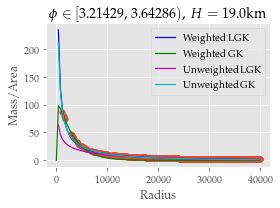

_______Phi:[3.21429,3.64286) __ H:20500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.73000369e-01 -3.79022501e-04  3.55026820e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.34793373e-01 -3.40896317e-05  3.20962130e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.62631978e-01 -6.10023717e-05  8.86759125e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.70731809e-01 -3.94834218e-05  2.60708397e+03]


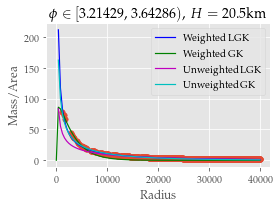

_______Phi:[3.21429,3.64286) __ H:22000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.46477285e-01 -3.65126765e-04  3.86204914e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.25507789e-01 -3.36807768e-05  2.75261204e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.38909101e-01 -4.70878912e-05  1.44627415e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.81670760e-01 -5.00937765e-05  4.90732177e+02]


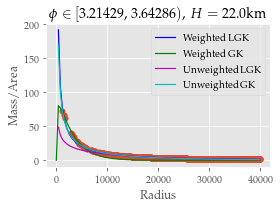

_______Phi:[3.21429,3.64286) __ H:23500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 5.55516545e-02 -3.14070491e-04  6.34242539e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.85979575e-01 -3.59525807e-05  1.86304780e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.59105898e-01 -4.34037227e-05  1.59204295e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.23129467e-01 -4.71060852e-05  6.47460544e+02]


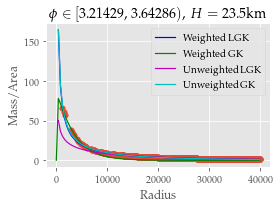

_______Phi:[3.21429,3.64286) __ H:25000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.01745929e-02 -3.23981680e-04  4.63762712e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-8.05365094e-01 -3.34841343e-05  2.03033000e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-5.98819858e-01 -6.20789280e-05  4.50037003e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.26248110e-01 -4.09087846e-05  1.50889373e+03]


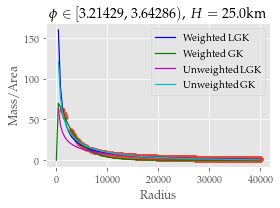

_______Phi:[3.21429,3.64286) __ H:26500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.26392974e-02 -2.96926806e-04  5.83762714e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.94868711e-01 -3.35834743e-05  1.74864723e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.36052771e-01 -5.76038707e-05  5.39863001e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 2.33776412e-01 -7.69776046e-05  1.75210321e+00]


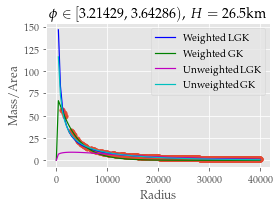

_______Phi:[3.21429,3.64286) __ H:28000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[-6.31080970e-02 -2.47885591e-04  1.09006047e+02]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.84245861e-01 -3.37663070e-05  1.50991730e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.53603939e-01 -3.97753141e-05  1.23087805e+04]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.26324266e-01 -3.97473152e-05  1.33181760e+03]


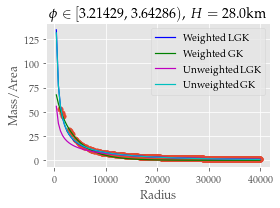

_______Phi:[3.21429,3.64286) __ H:29500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.42863963e-02 -3.02228160e-04  3.81510537e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.73426776e-01 -3.40343363e-05  1.30577223e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.73198082e-01 -4.82477544e-05  6.26128192e+03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 2.19717585e-01 -7.52213106e-05  1.76725727e+00]


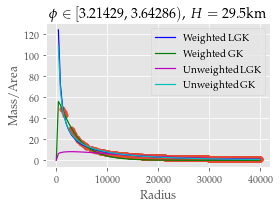

_______Phi:[3.21429,3.64286) __ H:31000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 8.14993691e-01 -6.20405922e-04  2.82655431e-01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.62488667e-01 -3.43653524e-05  1.13130260e+04]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.90767261e-01 -4.64417422e-05  6.80190122e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.60432708e-01 -3.51791461e-05  1.54611375e+03]


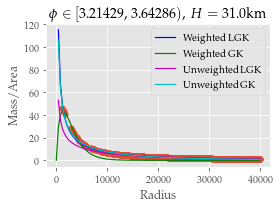

_______Phi:[3.21429,3.64286) __ H:32500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[-2.53811815e-02 -2.41965043e-04  6.77376222e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.51461664e-01 -3.47476596e-05  9.81904815e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.10665365e-01 -5.33404773e-05  3.43491827e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.51697719e-01 -4.02074656e-05  5.63615072e+02]


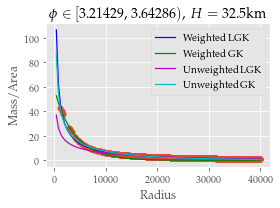

_______Phi:[3.21429,3.64286) __ H:34000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[-2.23549727e-02 -2.42825300e-04  6.22968096e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.40369992e-01 -3.51715493e-05  8.53718012e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-7.03138333e-01 -4.26999441e-05  6.59465103e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.21791840e-01 -3.72094383e-05  1.01504895e+03]


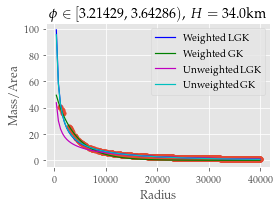

_______Phi:[3.21429,3.64286) __ H:35500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[-1.32880895e-02 -2.36880246e-04  5.44822831e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.29244523e-01 -3.56292120e-05  7.43590107e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.33642873e-01 -1.13983060e-04  1.88445890e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.95096378e-01 -3.72668648e-05  7.41071216e+02]


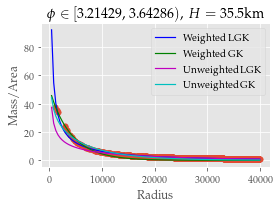

_______Phi:[3.21429,3.64286) __ H:37000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[-6.56130018e-03 -2.36303521e-04  4.91038918e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.18077047e-01 -3.61247544e-05  6.48744760e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.30786068e-01 -5.05749025e-05  3.47442426e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.84167002e-01 -3.76737591e-05  6.46755870e+02]


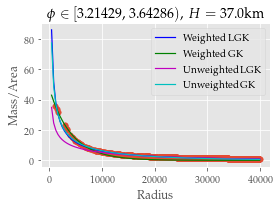

_______Phi:[3.21429,3.64286) __ H:38500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 2.41447103e-01 -3.35330300e-04  8.93277763e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-7.06929615e-01 -3.66225314e-05  5.66908922e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.97092325e-01 -4.10340263e-05  5.43365185e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.74723102e-01 -3.32703233e-05  1.39170826e+03]


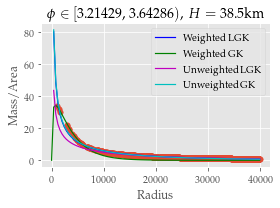

_______Phi:[3.21429,3.64286) __ H:40000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 7.31896684e-03 -2.34587041e-04  3.97492098e+01]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-6.95779722e-01 -3.71483889e-05  4.96229512e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-6.87670745e-01 -4.14365190e-05  4.82251251e+03]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.83809924e-01 -3.90623812e-05  6.26812787e+02]


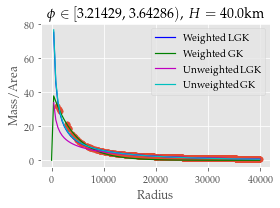

_______Phi:[3.64286,4.07143) __ H:10000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.53771530e-02 -1.80452889e-04  4.02793939e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-4.75435454e-01 -5.95985424e-05  1.21101095e+03]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.93990974e-01 -1.05458812e-04  1.49449013e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.92477752e-01 -4.68498805e-05  1.05954742e+03]


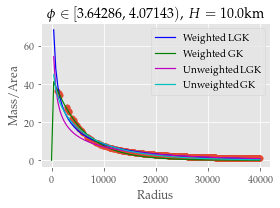

_______Phi:[3.64286,4.07143) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.44295482e-03 -1.72004872e-04  3.59757972e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-4.68615659e-01 -5.72440990e-05  9.73939505e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.64874487e-01 -6.35742996e-05  9.99588874e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.77013223e-01 -4.57363727e-05  8.06661449e+02]


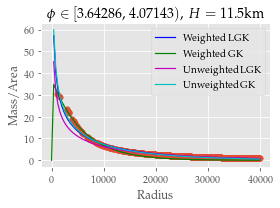

_______Phi:[3.64286,4.07143) __ H:13000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 9.17188827e-02 -1.93354731e-04  1.71681866e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-4.59588659e-01 -5.58491953e-05  7.86103018e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.34393727e-01 -8.74735391e-05  1.42720490e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.87169801e-01 -4.32817402e-05  7.65769257e+02]


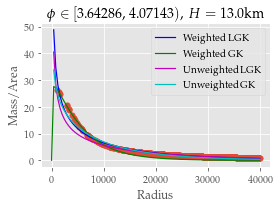

_______Phi:[3.64286,4.07143) __ H:14500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 4.29093964e-01 -3.09411047e-04  1.54481297e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-4.49308169e-01 -5.50375585e-05  6.38272245e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-2.17354003e-01 -8.84890509e-05  1.16061958e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-6.06286672e-01 -3.53510652e-05  1.87590968e+03]


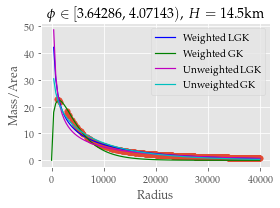

_______Phi:[3.64286,4.07143) __ H:16000______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 1.97797784e-01 -2.19505333e-04  6.37296557e+00]
Weighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_lgk_params:[-4.38292014e-01 -5.46003606e-05  5.21657654e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.56399709e-01 -5.79261637e-05  6.30585124e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.98410905e-01 -4.50346230e-05  2.76893769e+02]


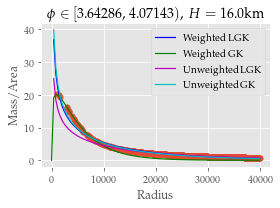

_______Phi:[3.64286,4.07143) __ H:17500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 3.47534335e-01 -2.62652891e-04  2.05777611e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-4.26836752e-01 -5.44140036e-05  4.29123087e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 5.37727007e-01 -2.04246691e-04  3.06939764e-01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.25718588e-01 -3.73692525e-05  7.57941782e+02]


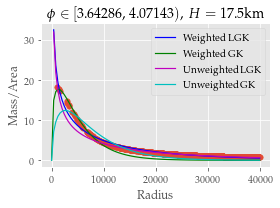

_______Phi:[3.64286,4.07143) __ H:19000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 2.49572083e-02 -1.56464311e-04  1.65752394e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-4.15130607e-01 -5.44005300e-05  3.55199080e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.33469504e-01 -5.76111822e-05  4.28656468e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.35427118e-01 -3.67144787e-05  7.64242602e+02]


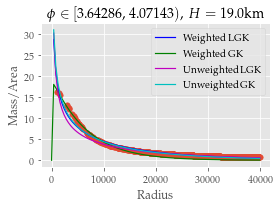

_______Phi:[3.64286,4.07143) __ H:20500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 2.98417979e-02 -1.54301959e-04  1.44636267e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-4.03291896e-01 -5.45091716e-05  2.95721210e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[ 1.31646267e-01 -1.16771289e-04  4.42405415e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.42447738e-01 -6.90692297e-05  1.81967400e+00]


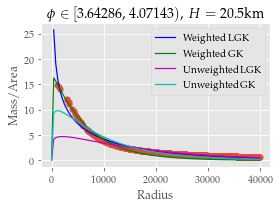

_______Phi:[3.64286,4.07143) __ H:22000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 3.47477041e-02 -1.52269614e-04  1.26935008e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-3.91402216e-01 -5.47052549e-05  2.47540722e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.27309865e-01 -5.59401447e-05  3.42972390e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.43980718e-01 -3.97449295e-05  2.89095610e+02]


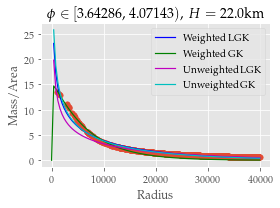

_______Phi:[3.64286,4.07143) __ H:23500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 3.96104349e-02 -1.50334897e-04  1.12003378e+01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-3.79517844e-01 -5.49644360e-05  2.08258942e+02]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-4.19011318e-01 -5.58134411e-05  2.96688973e+02]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.29096406e-01 -6.74607301e-05  1.76474177e+00]


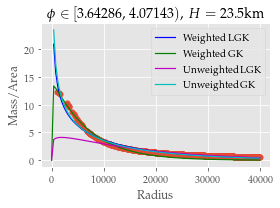

_______Phi:[3.64286,4.07143) __ H:25000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 4.43653087e-02 -1.48469586e-04  9.93463101e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-3.67684150e-01 -5.52688150e-05  1.76045737e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-4.10533263e-01 -5.57651188e-05  2.57438713e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.71005710e-01 -3.23581657e-05  7.60131235e+02]


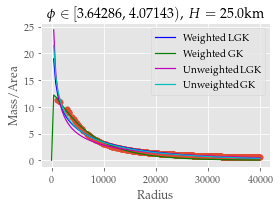

_______Phi:[3.64286,4.07143) __ H:26500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 4.90024014e-02 -1.46662756e-04  8.85426418e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-3.55928398e-01 -5.56058439e-05  1.49477425e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.97655607e-01 -5.60429754e-05  2.16360242e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.03444323e-01 -3.56256317e-05  4.00646627e+02]


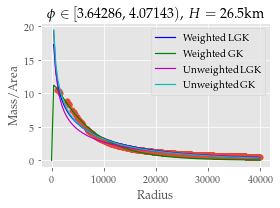

_______Phi:[3.64286,4.07143) __ H:28000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 5.34846340e-02 -1.44897978e-04  7.92793615e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-3.44275029e-01 -5.59655879e-05  1.27451676e+02]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-3.93273141e-01 -5.58337528e-05  1.95564331e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.51658407e-01 -3.70956204e-05  2.34734532e+02]


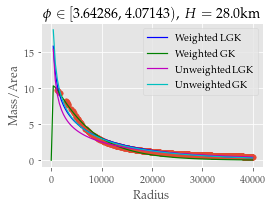

_______Phi:[3.64286,4.07143) __ H:29500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 5.78000906e-02 -1.43167467e-04  7.12947371e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-3.32743252e-01 -5.63405659e-05  1.09104357e+02]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.84622617e-01 -5.59240049e-05  1.71248535e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.09705336e-01 -3.42172833e-05  3.72300886e+02]


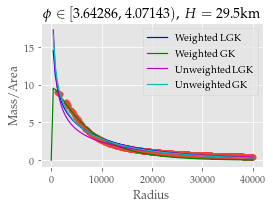

_______Phi:[3.64286,4.07143) __ H:31000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 6.19351245e-02 -1.41464038e-04  6.43806533e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-3.21347447e-01 -5.67249487e-05  9.37517247e+01]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-3.75873859e-01 -5.60440459e-05  1.50246709e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.37764536e-01 -3.29465470e-05  4.52387633e+02]


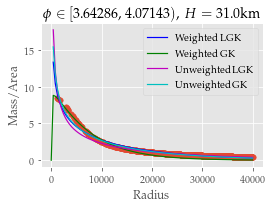

_______Phi:[3.64286,4.07143) __ H:32500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 6.58903228e-02 -1.39784115e-04  5.83631863e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-3.10096075e-01 -5.71144204e-05  8.08483238e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.67185999e-01 -5.61826916e-05  1.32214765e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.87758692e-01 -3.49257176e-05  2.77509059e+02]


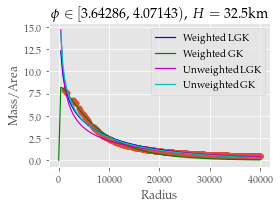

_______Phi:[3.64286,4.07143) __ H:34000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 6.96658404e-02 -1.38125626e-04  5.31022829e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-2.98999182e-01 -5.75053451e-05  6.99605955e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.58164921e-01 -5.63628558e-05  1.16294450e+02]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.20771706e-01 -3.35112763e-05  3.57003473e+02]


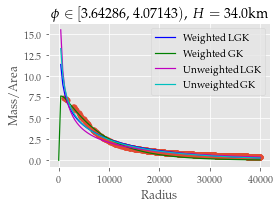

_______Phi:[3.64286,4.07143) __ H:35500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 7.32546241e-02 -1.36484542e-04  4.84859915e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-2.88065816e-01 -5.78946845e-05  6.07396584e+01]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 2.02604957e-01 -1.14966009e-04  1.31076352e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-5.39540071e-01 -3.29869694e-05  4.09086974e+02]


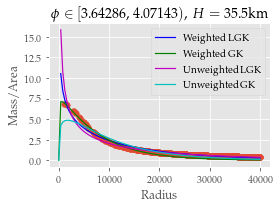

_______Phi:[3.64286,4.07143) __ H:37000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 7.66638238e-02 -1.34860212e-04  4.44173117e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-2.77299357e-01 -5.82802463e-05  5.29010283e+01]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-3.41366310e-01 -5.66736301e-05  9.14234660e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.58913092e-01 -3.63349645e-05  1.89030980e+02]


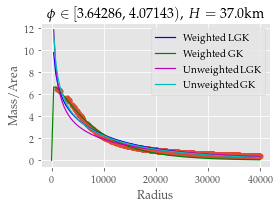

_______Phi:[3.64286,4.07143) __ H:38500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 7.99064183e-02 -1.33254565e-04  4.08147693e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-2.66700520e-01 -5.86604867e-05  4.62131782e+01]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-3.32872214e-01 -5.68515362e-05  8.12112455e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.14105977e-02 -6.26896007e-05  1.58042306e+00]


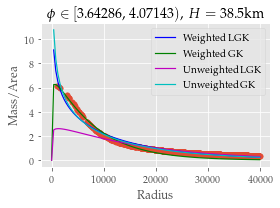

_______Phi:[3.64286,4.07143) __ H:40000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 8.29746580e-02 -1.31664245e-04  3.76166989e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-2.56279046e-01 -5.90334328e-05  4.04906242e+01]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-3.24448448e-01 -5.70324799e-05  7.22938063e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.54240061e-01 -3.59205853e-05  1.66286641e+02]


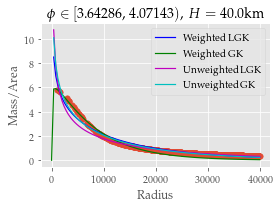

_______Phi:[4.07143,4.5) __ H:10000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.34486922e-01 -1.12601615e-04  2.57371588e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-9.14545907e-02 -6.69120619e-05  1.26253778e+01]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 2.01921999e-01 -9.77674635e-05  1.22254411e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.94387589e-01 -4.03564810e-05  1.35022032e+02]


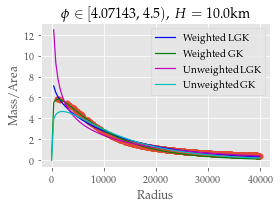

_______Phi:[4.07143,4.5) __ H:11500______
Weighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
w_gk_params:[ 6.89063504e-01 -2.69973409e-04  4.64483732e-02]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-8.48818789e-02 -6.58603747e-05  1.01550912e+01]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-1.60254587e-01 -6.26921372e-05  1.91675050e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.03251038e-01 -3.90131116e-05  1.26182752e+02]


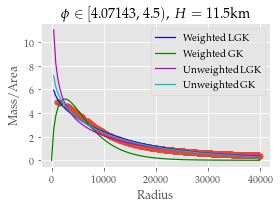

_______Phi:[4.07143,4.5) __ H:13000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.72656478e-01 -1.16191401e-04  1.42132539e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-7.75747454e-02 -6.51532857e-05  8.28007876e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-1.56254499e-01 -6.15440434e-05  1.60252081e+01]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 8.12390640e-02 -6.22856734e-05  1.58066997e+00]


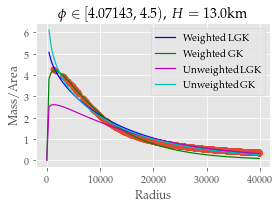

_______Phi:[4.07143,4.5) __ H:14500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.03881972e-01 -9.82775632e-05  2.00510654e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-6.98978448e-02 -6.46556638e-05  6.83263175e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 1.36687271e+00 -1.97901019e-04  5.51551123e-05]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.39241239e-01 -3.60265214e-05  1.35887438e+02]


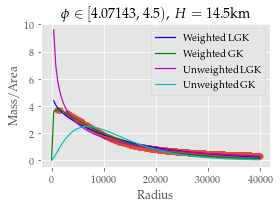

_______Phi:[4.07143,4.5) __ H:16000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.02358429e-01 -9.58510428e-05  1.78536161e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-6.20617026e-02 -6.42901528e-05  5.69798818e+00]
Unweighted Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_gk_params:[-1.44805049e-01 -6.01110128e-05  1.13723315e+01]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.27716502e-01 -3.56081617e-05  1.08832107e+02]


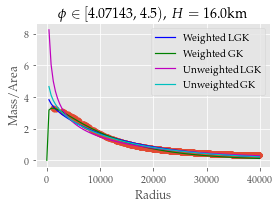

_______Phi:[4.07143,4.5) __ H:17500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.20183344e-01 -9.76495254e-05  1.40012123e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-5.41966191e-02 -6.40097766e-05  4.79644364e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-1.38086226e-01 -5.96497049e-05  9.65578093e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 6.27037866e-02 -5.94980292e-05  1.33659132e+00]


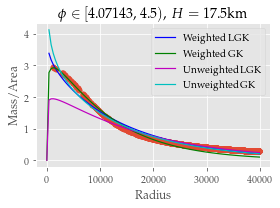

_______Phi:[4.07143,4.5) __ H:19000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 5.80670552e-02 -8.28613643e-05  1.94745121e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-4.63769177e-02 -6.37852969e-05  4.07121619e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-1.31006849e-01 -5.92894847e-05  8.24087138e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.03406611e-02 -5.64615571e-05  1.93132099e+00]


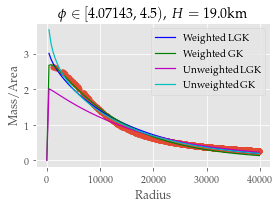

_______Phi:[4.07143,4.5) __ H:20500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 9.50714650e-02 -8.86024463e-05  1.35306508e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-3.86563019e-02 -6.35966537e-05  3.48157300e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-1.23675364e-01 -5.90033210e-05  7.06683732e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[-3.25467262e-02 -5.39035623e-05  2.58333947e+00]


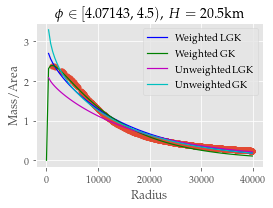

_______Phi:[4.07143,4.5) __ H:22000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 8.19671916e-02 -8.42326509e-05  1.34827486e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-1.75039114e-02 -6.48627138e-05  2.70689605e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 4.79554848e-02 -7.24779970e-05  1.60000464e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[-3.71611498e-02 -5.33321011e-05  2.48734497e+00]


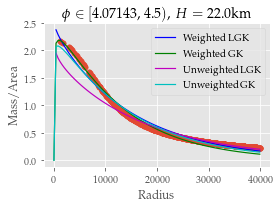

_______Phi:[4.07143,4.5) __ H:23500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.06873508e-01 -8.75826051e-05  1.03167561e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-3.11213089e-02 -6.24963675e-05  2.74699832e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 5.08639632e-02 -7.18181323e-05  1.43619111e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.52671849e-01 -3.69038242e-05  3.63054452e+01]


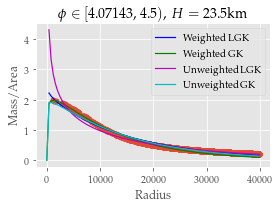

_______Phi:[4.07143,4.5) __ H:25000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[-5.54540161e-04 -6.54158936e-05  2.02977572e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-1.63957741e-02 -6.31320467e-05  2.26278442e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 3.35903066e-02 -6.94843889e-05  1.52680506e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[-5.35068102e-02 -5.18845986e-05  2.48793682e+00]


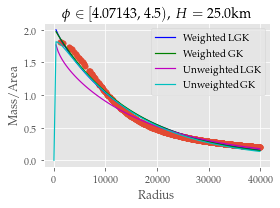

_______Phi:[4.07143,4.5) __ H:26500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.08783653e-01 -8.47329993e-05  8.58994515e-01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-9.33450803e-03 -6.29872631e-05  1.98205238e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 1.28528743e-02 -6.69864334e-05  1.67712520e+00]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[ 1.88323555e-02 -5.51938063e-05  1.23561500e+00]


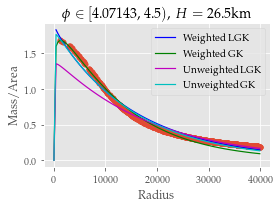

_______Phi:[4.07143,4.5) __ H:28000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.09705471e-01 -8.33766336e-05  7.88385211e-01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[-2.47410067e-03 -6.28398787e-05  1.74479159e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-1.45241298e-02 -6.39341681e-05  1.95137612e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-4.01051902e-01 -3.40201300e-05  4.61186497e+01]


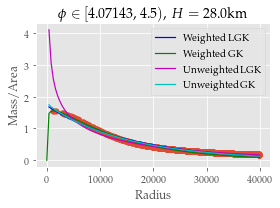

_______Phi:[4.07143,4.5) __ H:29500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[-2.67280324e-02 -5.69471082e-05  1.93267167e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.18415349e-03 -6.26876868e-05  1.54305092e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-2.24779029e-02 -6.25321280e-05  1.94316874e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.81321189e-01 -3.47338681e-05  3.65785351e+01]


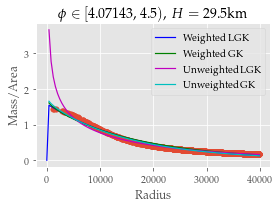

_______Phi:[4.07143,4.5) __ H:31000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.11383601e-01 -8.07663040e-05  6.71139173e-01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.06242807e-02 -6.25276596e-05  1.37071201e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-2.60088100e-02 -6.15127287e-05  1.87252708e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.02061845e-01 -3.85029191e-05  1.72515373e+01]


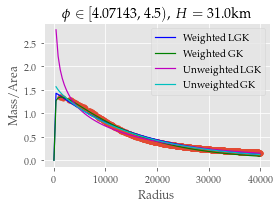

_______Phi:[4.07143,4.5) __ H:32500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.12140582e-01 -7.95090444e-05  6.22149857e-01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 1.68642035e-02 -6.23598079e-05  1.22255826e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-3.50855063e-02 -6.00368111e-05  1.89252933e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.60373137e-01 -3.52539608e-05  2.72260733e+01]


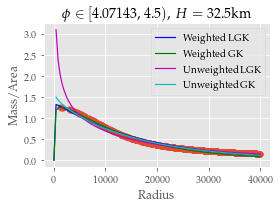

_______Phi:[4.07143,4.5) __ H:34000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.12859401e-01 -7.82855091e-05  5.78304371e-01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 2.28910137e-02 -6.21827823e-05  1.09471361e+00]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-4.07255399e-02 -5.88907073e-05  1.86453159e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.02154042e-01 -3.78460168e-05  1.54554497e+01]


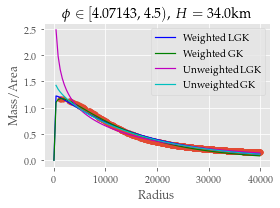

_______Phi:[4.07143,4.5) __ H:35500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[-1.53415663e-01 -3.26175889e-05  3.64774274e+00]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 2.86986729e-02 -6.19936566e-05  9.83939233e-01]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-3.48304834e-02 -5.86753920e-05  1.67461257e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-3.33040993e-01 -3.61083601e-05  1.93354605e+01]


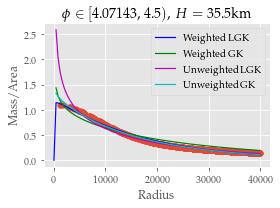

_______Phi:[4.07143,4.5) __ H:37000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.14136665e-01 -7.59194625e-05  5.03529397e-01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 3.43043624e-02 -6.17948737e-05  8.87467926e-01]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[ 6.01557205e-01 -1.07353238e-04  8.14736855e-03]
Unweighted Log Gamma Kernel: True : Optimization terminated successfully.
uw_lgk_params:[-3.17230339e-02 -5.08226673e-05  1.31041702e+00]


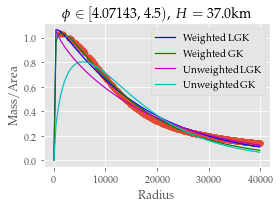

_______Phi:[4.07143,4.5) __ H:38500______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.14709061e-01 -7.47818160e-05  4.71471703e-01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 3.96982811e-02 -6.15844622e-05  8.03187011e-01]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-1.60537870e-01 -4.73986299e-05  4.17974056e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[-2.88116499e-01 -3.78652038e-05  1.18518876e+01]


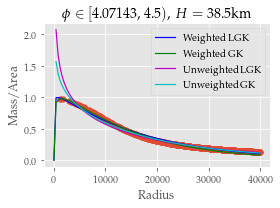

_______Phi:[4.07143,4.5) __ H:40000______
Weighted Gamma Kernel: True : Optimization terminated successfully.
w_gk_params:[ 1.15174301e-01 -7.36527357e-05  4.42578635e-01]
Weighted Log Gamma Kernel: True : Optimization terminated successfully.
w_lgk_params:[ 4.48773943e-02 -6.13600704e-05  7.29299318e-01]
Unweighted Gamma Kernel: True : Optimization terminated successfully.
uw_gk_params:[-1.56324741e-01 -4.71248403e-05  3.82989118e+00]
Unweighted Log Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
uw_lgk_params:[ 1.16684283e-01 -5.69968398e-05  3.18244703e-01]


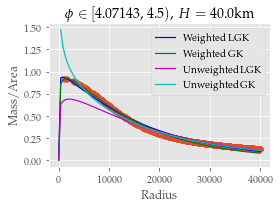

H                  Phi         a         b          c  \
0    10000      [-4.5,-4.07143)  1.283272 -0.003553   1.615638   
1    11500      [-4.5,-4.07143)  1.196157 -0.002863   1.599462   
2    13000      [-4.5,-4.07143)  1.035808 -0.002451   3.323631   
3    14500      [-4.5,-4.07143)  1.085953 -0.002287   2.001336   
4    16000      [-4.5,-4.07143)  1.289221 -0.002248   0.460049   
5    17500      [-4.5,-4.07143)  1.061975 -0.001989   1.682687   
6    19000      [-4.5,-4.07143)  0.884274 -0.001745   4.369631   
7    20500      [-4.5,-4.07143)  0.824265 -0.001641   5.784290   
8    22000      [-4.5,-4.07143)  0.918367 -0.001646   2.914139   
9    23500      [-4.5,-4.07143)  1.136267 -0.001729   0.671729   
10   25000      [-4.5,-4.07143)  0.712824 -0.001381   8.704093   
11   26500      [-4.5,-4.07143)  0.625537 -0.001285  13.982636   
12   28000      [-4.5,-4.07143)  0.536910 -0.001190  22.667864   
13   29500      [-4.5,-4.07143)  0.488706 -0.001101  27.989811   
14   31000      [-4.5,-4.07143)  0.436183 -0.001046  36.886947   
15   32500      [-4.5,-4.07143)  0.441107 -0.001022  33.779691   
16   34000      [-4.5,-4.07143)  0.431244 -0.000989  33.678731   
17   35500      [-4.5,-4.07143)  0.418754 -0.000962  34.771098   
18   37000      [-4.5,-4.07143)  0.391142 -0.000924  39.406387   
19   38500      [-4.5,-4.07143)  0.464791 -0.000935  23.029666   
20   40000      [-4.5,-4.07143)  0.453703 -0.000914  23.655584   
21   10000  [-4.07143,-3.64286)  1.197886 -0.002658   2.022461   
22   11500  [-4.07143,-3.64286)  0.987476 -0.002224   6.145097   
23   13000  [-4.07143,-3.64286)  1.222874 -0.002218   1.222569   
24   14500  [-4.07143,-3.64286)  1.196186 -0.002055   1.241799   
25   16000  [-4.07143,-3.64286)  1.269600 -0.002008   0.706375   
26   17500  [-4.07143,-3.64286)  1.108307 -0.001794   1.700767   
27   19000  [-4.07143,-3.64286)  0.814552 -0.001530   9.714615   
28   20500  [-4.07143,-3.64286)  0.904755 -0.001525   4.980454   
29   22000  [-4.07143,-3.64286)  0.740040 -0.001376  13.129688   
..     ...                  ...       ...       ...        ...   
411  28000    [3.64286,4.07143)  0.053485 -0.000145   7.927936   
412  29500    [3.64286,4.07143)  0.057800 -0.000143   7.129474   
413  31000    [3.64286,4.07143)  0.061935 -0.000141   6.438065   
414  32500    [3.64286,4.07143)  0.065890 -0.000140   5.836319   
415  34000    [3.64286,4.07143)  0.069666 -0.000138   5.310228   
416  35500    [3.64286,4.07143)  0.073255 -0.000136   4.848599   
417  37000    [3.64286,4.07143)  0.076664 -0.000135   4.441731   
418  38500    [3.64286,4.07143)  0.079906 -0.000133   4.081477   
419  40000    [3.64286,4.07143)  0.082975 -0.000132   3.761670   
420  10000        [4.07143,4.5)  0.134487 -0.000113   2.573716   
421  11500        [4.07143,4.5)  0.689064 -0.000270   0.046448   
422  13000        [4.07143,4.5)  0.172656 -0.000116   1.421325   
423  14500        [4.07143,4.5)  0.103882 -0.000098   2.005107   
424  16000        [4.07143,4.5)  0.102358 -0.000096   1.785362   
425  17500        [4.07143,4.5)  0.120183 -0.000098   1.400121   
426  19000        [4.07143,4.5)  0.058067 -0.000083   1.947451   
427  20500        [4.07143,4.5)  0.095071 -0.000089   1.353065   
428  22000        [4.07143,4.5)  0.081967 -0.000084   1.348275   
429  23500        [4.07143,4.5)  0.106874 -0.000088   1.031676   
430  25000        [4.07143,4.5) -0.000555 -0.000065   2.029776   
431  26500        [4.07143,4.5)  0.108784 -0.000085   0.858995   
432  28000        [4.07143,4.5)  0.109705 -0.000083   0.788385   
433  29500        [4.07143,4.5) -0.026728 -0.000057   1.932672   
434  31000        [4.07143,4.5)  0.111384 -0.000081   0.671139   
435  32500        [4.07143,4.5)  0.112141 -0.000080   0.622150   
436  34000        [4.07143,4.5)  0.112859 -0.000078   0.578304   
437  35500        [4.07143,4.5) -0.153416 -0.000033   3.647743   
438  37000        [4.07143,4.5)  0.114137 -0.000076   0.503529   
439  38500        [4.07143,4.5)  0.114709 -0.0000

H                  Phi         a         b           c  \
0    10000      [-4.5,-4.07143)  2.158882 -0.003530    0.003104   
1    11500      [-4.5,-4.07143)  2.256399 -0.003098    0.001123   
2    13000      [-4.5,-4.07143)  2.041721 -0.002702    0.003565   
3    14500      [-4.5,-4.07143)  1.995218 -0.002409    0.003511   
4    16000      [-4.5,-4.07143)  1.866307 -0.002189    0.006880   
5    17500      [-4.5,-4.07143)  1.812549 -0.002004    0.007891   
6    19000      [-4.5,-4.07143)  1.548951 -0.001783    0.038937   
7    20500      [-4.5,-4.07143)  1.386714 -0.001624    0.099618   
8    22000      [-4.5,-4.07143)  1.315195 -0.001516    0.141555   
9    23500      [-4.5,-4.07143)  1.173625 -0.001395    0.326727   
10   25000      [-4.5,-4.07143)  1.064134 -0.001295    0.616202   
11   26500      [-4.5,-4.07143)  1.004865 -0.001222    0.831403   
12   28000      [-4.5,-4.07143)  0.915631 -0.001144    1.386548   
13   29500      [-4.5,-4.07143)  0.813632 -0.001070    2.564041   
14   31000      [-4.5,-4.07143)  0.760945 -0.001016    3.392026   
15   32500      [-4.5,-4.07143)  0.724064 -0.000971    4.056922   
16   34000      [-4.5,-4.07143)  0.653118 -0.000918    6.094541   
17   35500      [-4.5,-4.07143)  0.598724 -0.000874    8.294614   
18   37000      [-4.5,-4.07143)  0.556815 -0.000836   10.417873   
19   38500      [-4.5,-4.07143)  0.536236 -0.000807   11.361832   
20   40000      [-4.5,-4.07143)  0.502969 -0.000776   13.421565   
21   10000  [-4.07143,-3.64286)  2.371697 -0.003406    0.001260   
22   11500  [-4.07143,-3.64286)  2.452882 -0.003026    0.000498   
23   13000  [-4.07143,-3.64286)  2.451490 -0.002703    0.000351   
24   14500  [-4.07143,-3.64286)  2.149790 -0.002365    0.002019   
25   16000  [-4.07143,-3.64286)  1.982896 -0.002124    0.004944   
26   17500  [-4.07143,-3.64286)  1.655304 -0.001862    0.036711   
27   19000  [-4.07143,-3.64286)  1.506220 -0.001696    0.084283   
28   20500  [-4.07143,-3.64286)  1.371820 -0.001556    0.180273   
29   22000  [-4.07143,-3.64286)  1.227596 -0.001428    0.420999   
..     ...                  ...       ...       ...         ...   
411  28000    [3.64286,4.07143) -0.344275 -0.000056  127.451676   
412  29500    [3.64286,4.07143) -0.332743 -0.000056  109.104357   
413  31000    [3.64286,4.07143) -0.321347 -0.000057   93.751725   
414  32500    [3.64286,4.07143) -0.310096 -0.000057   80.848324   
415  34000    [3.64286,4.07143) -0.298999 -0.000058   69.960595   
416  35500    [3.64286,4.07143) -0.288066 -0.000058   60.739658   
417  37000    [3.64286,4.07143) -0.277299 -0.000058   52.901028   
418  38500    [3.64286,4.07143) -0.266701 -0.000059   46.213178   
419  40000    [3.64286,4.07143) -0.256279 -0.000059   40.490624   
420  10000        [4.07143,4.5) -0.091455 -0.000067   12.625378   
421  11500        [4.07143,4.5) -0.084882 -0.000066   10.155091   
422  13000        [4.07143,4.5) -0.077575 -0.000065    8.280079   
423  14500        [4.07143,4.5) -0.069898 -0.000065    6.832632   
424  16000        [4.07143,4.5) -0.062062 -0.000064    5.697988   
425  17500        [4.07143,4.5) -0.054197 -0.000064    4.796444   
426  19000        [4.07143,4.5) -0.046377 -0.000064    4.071216   
427  20500        [4.07143,4.5) -0.038656 -0.000064    3.481573   
428  22000        [4.07143,4.5) -0.017504 -0.000065    2.706896   
429  23500        [4.07143,4.5) -0.031121 -0.000062    2.746998   
430  25000        [4.07143,4.5) -0.016396 -0.000063    2.262784   
431  26500        [4.07143,4.5) -0.009335 -0.000063    1.982052   
432  28000        [4.07143,4.5) -0.002474 -0.000063    1.744792   
433  29500        [4.07143,4.5)  0.004184 -0.000063    1.543051   
434  31000        [4.07143,4.5)  0.010624 -0.000063    1.370712   
435  32500        [4.07143,4.5)  0.016864 -0.000062    1.222558   
436  34000        [4.07143,4.5)  0.022891 -0.000062    1.094714   
437  35500        [4.07143,4.5)  0.028699 -0.000062    0.983939   
438  37000        [4.07143,4.5)  0.034304 -0.000062    0

H                  Phi         a         b           c  \
0    10000      [-4.5,-4.07143)  1.496199 -0.003674    0.413810   
1    11500      [-4.5,-4.07143)  1.306204 -0.002901    0.767463   
2    13000      [-4.5,-4.07143)  0.954733 -0.002325    5.051777   
3    14500      [-4.5,-4.07143)  0.890085 -0.002036    5.865346   
4    16000      [-4.5,-4.07143)  0.733727 -0.001746   12.773724   
5    17500      [-4.5,-4.07143)  0.607599 -0.001537   24.182201   
6    19000      [-4.5,-4.07143)  0.612477 -0.001438   20.367072   
7    20500      [-4.5,-4.07143)  0.598972 -0.001348   19.632469   
8    22000      [-4.5,-4.07143)  0.449386 -0.001198   46.339634   
9    23500      [-4.5,-4.07143)  0.463326 -0.001140   38.172103   
10   25000      [-4.5,-4.07143)  0.405094 -0.001071   52.175908   
11   26500      [-4.5,-4.07143)  0.356367 -0.001006   66.014501   
12   28000      [-4.5,-4.07143)  0.392585 -0.000982   47.679718   
13   29500      [-4.5,-4.07143)  0.294524 -0.000904   85.615633   
14   31000      [-4.5,-4.07143)  0.303572 -0.000880   75.937360   
15   32500      [-4.5,-4.07143)  0.232344 -0.000825  115.435340   
16   34000      [-4.5,-4.07143)  0.175706 -0.000770  155.597828   
17   35500      [-4.5,-4.07143)  0.171709 -0.000744  150.948597   
18   37000      [-4.5,-4.07143)  0.263882 -0.000770   78.537268   
19   38500      [-4.5,-4.07143)  0.269486 -0.000754   72.281979   
20   40000      [-4.5,-4.07143)  0.118486 -0.000681  188.934904   
21   10000  [-4.07143,-3.64286)  1.522392 -0.002874    0.262670   
22   11500  [-4.07143,-3.64286)  1.246073 -0.002383    1.190817   
23   13000  [-4.07143,-3.64286)  1.071751 -0.002071    2.977552   
24   14500  [-4.07143,-3.64286)  0.855727 -0.001774    9.865173   
25   16000  [-4.07143,-3.64286)  0.806945 -0.001622   11.687023   
26   17500  [-4.07143,-3.64286)  0.625543 -0.001423   33.160543   
27   19000  [-4.07143,-3.64286)  0.619356 -0.001345   30.780495   
28   20500  [-4.07143,-3.64286)  0.614609 -0.001271   28.324851   
29   22000  [-4.07143,-3.64286)  0.536444 -0.001181   43.429628   
..     ...                  ...       ...       ...         ...   
411  28000    [3.64286,4.07143) -0.393273 -0.000056  195.564331   
412  29500    [3.64286,4.07143) -0.384623 -0.000056  171.248535   
413  31000    [3.64286,4.07143) -0.375874 -0.000056  150.246709   
414  32500    [3.64286,4.07143) -0.367186 -0.000056  132.214765   
415  34000    [3.64286,4.07143) -0.358165 -0.000056  116.294450   
416  35500    [3.64286,4.07143)  0.202605 -0.000115    1.310764   
417  37000    [3.64286,4.07143) -0.341366 -0.000057   91.423466   
418  38500    [3.64286,4.07143) -0.332872 -0.000057   81.211246   
419  40000    [3.64286,4.07143) -0.324448 -0.000057   72.293806   
420  10000        [4.07143,4.5)  0.201922 -0.000098    1.222544   
421  11500        [4.07143,4.5) -0.160255 -0.000063   19.167505   
422  13000        [4.07143,4.5) -0.156254 -0.000062   16.025208   
423  14500        [4.07143,4.5)  1.366873 -0.000198    0.000055   
424  16000        [4.07143,4.5) -0.144805 -0.000060   11.372331   
425  17500        [4.07143,4.5) -0.138086 -0.000060    9.655781   
426  19000        [4.07143,4.5) -0.131007 -0.000059    8.240871   
427  20500        [4.07143,4.5) -0.123675 -0.000059    7.066837   
428  22000        [4.07143,4.5)  0.047955 -0.000072    1.600005   
429  23500        [4.07143,4.5)  0.050864 -0.000072    1.436191   
430  25000        [4.07143,4.5)  0.033590 -0.000069    1.526805   
431  26500        [4.07143,4.5)  0.012853 -0.000067    1.677125   
432  28000        [4.07143,4.5) -0.014524 -0.000064    1.951376   
433  29500        [4.07143,4.5) -0.022478 -0.000063    1.943169   
434  31000        [4.07143,4.5) -0.026009 -0.000062    1.872527   
435  32500        [4.07143,4.5) -0.035086 -0.000060    1.892529   
436  34000        [4.07143,4.5) -0.040726 -0.000059    1.864532   
437  35500        [4.07143,4.5) -0.034830 -0.000059    1.674613   
438  37000        [4.07143,4.5)  0.601557 -0.000107    0

H                  Phi         a         b           c  \
0    10000      [-4.5,-4.07143)  2.649233 -0.003805    0.000154   
1    11500      [-4.5,-4.07143)  2.797903 -0.003378    0.000039   
2    13000      [-4.5,-4.07143)  2.519778 -0.002952    0.000198   
3    14500      [-4.5,-4.07143)  2.191151 -0.002536    0.001187   
4    16000      [-4.5,-4.07143)  2.029633 -0.002294    0.002951   
5    17500      [-4.5,-4.07143)  2.039430 -0.002100    0.001894   
6    19000      [-4.5,-4.07143)  1.997624 -0.001921    0.001817   
7    20500      [-4.5,-4.07143)  1.921213 -0.001777    0.002477   
8    22000      [-4.5,-4.07143)  1.833474 -0.001658    0.003932   
9    23500      [-4.5,-4.07143)  1.797940 -0.001550    0.004035   
10   25000      [-4.5,-4.07143)  1.772467 -0.001460    0.003976   
11   26500      [-4.5,-4.07143)  1.760977 -0.001388    0.003656   
12   28000      [-4.5,-4.07143)  1.664642 -0.001305    0.006352   
13   29500      [-4.5,-4.07143)  1.604737 -0.001233    0.008330   
14   31000      [-4.5,-4.07143)  1.546369 -0.001172    0.011281   
15   32500      [-4.5,-4.07143)  1.575072 -0.001131    0.007964   
16   34000      [-4.5,-4.07143)  1.453085 -0.001066    0.017259   
17   35500      [-4.5,-4.07143)  1.401735 -0.001019    0.022606   
18   37000      [-4.5,-4.07143)  1.410862 -0.000985    0.018831   
19   38500      [-4.5,-4.07143)  1.403316 -0.000953    0.018220   
20   40000      [-4.5,-4.07143)  1.384401 -0.000919    0.018843   
21   10000  [-4.07143,-3.64286)  2.805337 -0.003667    0.000096   
22   11500  [-4.07143,-3.64286)  2.440524 -0.003032    0.000553   
23   13000  [-4.07143,-3.64286)  2.259337 -0.002690    0.001574   
24   14500  [-4.07143,-3.64286)  2.031916 -0.002379    0.005706   
25   16000  [-4.07143,-3.64286)  2.199493 -0.002215    0.001258   
26   17500  [-4.07143,-3.64286)  2.034842 -0.001980    0.002774   
27   19000  [-4.07143,-3.64286)  1.951876 -0.001828    0.003974   
28   20500  [-4.07143,-3.64286)  1.902465 -0.001697    0.004460   
29   22000  [-4.07143,-3.64286)  1.832315 -0.001576    0.005869   
..     ...                  ...       ...       ...         ...   
411  28000    [3.64286,4.07143) -0.451658 -0.000037  234.734532   
412  29500    [3.64286,4.07143) -0.509705 -0.000034  372.300886   
413  31000    [3.64286,4.07143) -0.537765 -0.000033  452.387633   
414  32500    [3.64286,4.07143) -0.487759 -0.000035  277.509059   
415  34000    [3.64286,4.07143) -0.520772 -0.000034  357.003473   
416  35500    [3.64286,4.07143) -0.539540 -0.000033  409.086974   
417  37000    [3.64286,4.07143) -0.458913 -0.000036  189.030980   
418  38500    [3.64286,4.07143)  0.081411 -0.000063    1.580423   
419  40000    [3.64286,4.07143) -0.454240 -0.000036  166.286641   
420  10000        [4.07143,4.5) -0.394388 -0.000040  135.022032   
421  11500        [4.07143,4.5) -0.403251 -0.000039  126.182752   
422  13000        [4.07143,4.5)  0.081239 -0.000062    1.580670   
423  14500        [4.07143,4.5) -0.439241 -0.000036  135.887438   
424  16000        [4.07143,4.5) -0.427717 -0.000036  108.832107   
425  17500        [4.07143,4.5)  0.062704 -0.000059    1.336591   
426  19000        [4.07143,4.5)  0.010341 -0.000056    1.931321   
427  20500        [4.07143,4.5) -0.032547 -0.000054    2.583339   
428  22000        [4.07143,4.5) -0.037161 -0.000053    2.487345   
429  23500        [4.07143,4.5) -0.352672 -0.000037   36.305445   
430  25000        [4.07143,4.5) -0.053507 -0.000052    2.487937   
431  26500        [4.07143,4.5)  0.018832 -0.000055    1.235615   
432  28000        [4.07143,4.5) -0.401052 -0.000034   46.118650   
433  29500        [4.07143,4.5) -0.381321 -0.000035   36.578535   
434  31000        [4.07143,4.5) -0.302062 -0.000039   17.251537   
435  32500        [4.07143,4.5) -0.360373 -0.000035   27.226073   
436  34000        [4.07143,4.5) -0.302154 -0.000038   15.455450   
437  35500        [4.07143,4.5) -0.333041 -0.000036   19.335461   
438  37000        [4.07143,4.5) -0.031723 -0.000051    1

In [21]:
def log_gamma_kernel(x, a, b, c):
    return np.log(c) + (a*np.log(x)) + (b * x)

def gamma_kernel(x, a, b, c):
    return c*(x**a)*np.exp(b*x)


def w_lgk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2))

def w_gk_sse(k, x_data, y_data):
    return sum(((1e9/(x_data**2))*(y_data - (gamma_kernel(x_data, *k))) ** 2))

def uw_lgk_sse(k, x_data, y_data):
    return sum((np.log(y_data) - (log_gamma_kernel(x_data, *k))) ** 2)

def uw_gk_sse(k, x_data, y_data):
    return sum((y_data - (gamma_kernel(x_data, *k))) ** 2)


w_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'data'])
w_lgk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'data'])
uw_gk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'data'])
uw_lgk_df = pd.DataFrame(columns=['H', 'Phi', 'a', 'b', 'c', 'data'])




for k, phi in enumerate(phis):
#     fig, axs = plt.subplots(rows, 2, figsize=(
#         20, 15), facecolor='w', edgecolor='k')
#     axs = axs.ravel()
    for i, (h, erp) in enumerate(eruptions.items()):
        new_df = erp.df
        ma = new_df['MassArea'].values
        wt = new_df[phi].values
        xx = new_df['radius'].values
        yy = ma * (wt / 100)

        pnts = list(set(zip(xx, yy)))
        pnts = sorted(pnts, key=lambda x: x[0])

        x = np.array([p[0] for p in pnts], dtype=np.float64)
        y = np.array([p[1] for p in pnts], dtype=np.float64)

        tot_mass = np.trapz(y, x=x)
        idx = 0
        perc = 0.0
        while perc < 99.999:
            mass = np.trapz(y[:idx], x=x[:idx])
            idx += 1
            perc = (mass / tot_mass) * 100

        x_data = x[:idx]
        y_data = y[:idx]

        k0 = np.array([1, -1e-3, 1], dtype=np.float64)

        def w_gk_fun(k): return w_gk_sse(k, x_data, y_data)
        
        def w_lgk_fun(k): return w_lgk_sse(k, x_data, y_data)
        
        def uw_gk_fun(k): return uw_gk_sse(k, x_data, y_data)
        
        def uw_lgk_fun(k): return uw_lgk_sse(k, x_data, y_data)
        
        w_gk_bounds = [(None, None),(None, -1e-7), (None, None)]
        w_lgk_bounds = [(None, None),(None, -1e-7), (None, None)]
        uw_gk_bounds = [(None, None),(None, -1e-7), (None, None)]
        uw_lgk_bounds = [(None, None),(None, -1e-7), (None, None)]
        
        w_gk_popt = minimize(w_gk_fun, k0, bounds=w_gk_bounds, method='Nelder-Mead')
        w_lgk_popt = minimize(w_lgk_fun, k0, bounds=w_lgk_bounds, method='Nelder-Mead')
        uw_gk_popt = minimize(uw_gk_fun, k0, bounds=uw_gk_bounds, method='Nelder-Mead')
        uw_lgk_popt = minimize(uw_lgk_fun, k0, bounds=uw_lgk_bounds, method='Nelder-Mead')
        print("_______Phi:" + str(phi) + " __ H:" + str(h) + "______")
        print("Weighted Gamma Kernel: " + str(w_gk_popt.success) + " : " + str(w_gk_popt.message))
        print("w_gk_params:" + str(w_gk_popt.x))
        print("Weighted Log Gamma Kernel: " + str(w_lgk_popt.success) + " : " + str(w_lgk_popt.message))
        print("w_lgk_params:" + str(w_lgk_popt.x))
        print("Unweighted Gamma Kernel: " + str(uw_gk_popt.success) + " : " + str(uw_gk_popt.message))
        print("uw_gk_params:" + str(uw_gk_popt.x))
        print("Unweighted Log Gamma Kernel: " + str(uw_lgk_popt.success) + " : " + str(uw_lgk_popt.message))
        print("uw_lgk_params:" + str(uw_lgk_popt.x))
        
        xf = np.linspace(0, x_data.max(), 100)
        w_gk_yf = gamma_kernel(xf, *w_gk_popt.x)
        w_lgk_yf = log_gamma_kernel(xf, *w_lgk_popt.x)
        uw_gk_yf = gamma_kernel(xf, *uw_gk_popt.x)
        uw_lgk_yf = log_gamma_kernel(xf, *uw_lgk_popt.x)

#         if (phi in phis[-2:] and h in vals[::2]):
        fig, ax1 = plt.subplots(1, 1, figsize=(4, 3))

        ax1.scatter(x_data, y_data, s=30)
        ax1.plot(xf, np.exp(w_lgk_yf), 'b-', lw=1.2, label="Weighted LGK")
        ax1.plot(xf, w_gk_yf, 'g-', lw=1.2, label="Weighted GK")
        ax1.plot(xf, np.exp(uw_lgk_yf), 'm-', lw=1.2, label="Unweighted LGK")
        ax1.plot(xf, uw_gk_yf, 'c-', lw=1.2, label="Unweighted GK")
#         ax2.scatter(np.log(x_data), np.log(y_data), s=30)
#         ax2.plot(np.log(xf), w_lgk_yf, 'b-', lw=1.2, label="w lgk")
#         ax2.plot(np.log(xf), np.log(w_gk_yf), 'g-', lw=1.2, label="w gk")
#         ax2.plot(np.log(xf), uw_lgk_yf, 'm-', lw=1.2, label="uw lgk")
#         ax2.plot(np.log(xf), np.log(uw_gk_yf), 'c-', lw=1.2, label="uw gk")
        plt.legend()
        ax1.set_ylabel('Mass/Area')
        ax1.set_xlabel(r'Radius')
        plt.title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(h)), fontsize=14)
        w_gk_df = w_gk_df.append(
            {'H': h, 'Phi': phi, 'a': w_gk_popt.x[0], 'b': w_gk_popt.x[1], 'c': w_gk_popt.x[2], 'data': (x_data, y_data)}, ignore_index=True)
        w_lgk_df = w_lgk_df.append(
            {'H': h, 'Phi': phi, 'a': w_lgk_popt.x[0], 'b': w_lgk_popt.x[1], 'c': w_lgk_popt.x[2], 'data': (x_data, y_data)}, ignore_index=True)
        uw_gk_df = uw_gk_df.append(
            {'H': h, 'Phi': phi, 'a': uw_gk_popt.x[0], 'b': uw_gk_popt.x[1], 'c': uw_gk_popt.x[2], 'data': (x_data, y_data)}, ignore_index=True)
        uw_lgk_df = uw_lgk_df.append(
            {'H': h, 'Phi': phi, 'a': uw_lgk_popt.x[0], 'b': uw_lgk_popt.x[1], 'c': uw_lgk_popt.x[2], 'data': (x_data, y_data)}, ignore_index=True)
        plt.tight_layout()
        plt.savefig("../data/%s_trial_%d/phi%s_H%skm.png" %
                (param, trial, phi, disp_func(h)), dpi=200, format='png')
        plt.show()
display(w_gk_df)
display(w_lgk_df)
display(uw_gk_df)
display(uw_lgk_df)

Weighted Gamma Kernel


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


Weighted Log-Gamma Kernel
Unweighted Gamma Kernel
Unweighted Log-Gamma Kernel


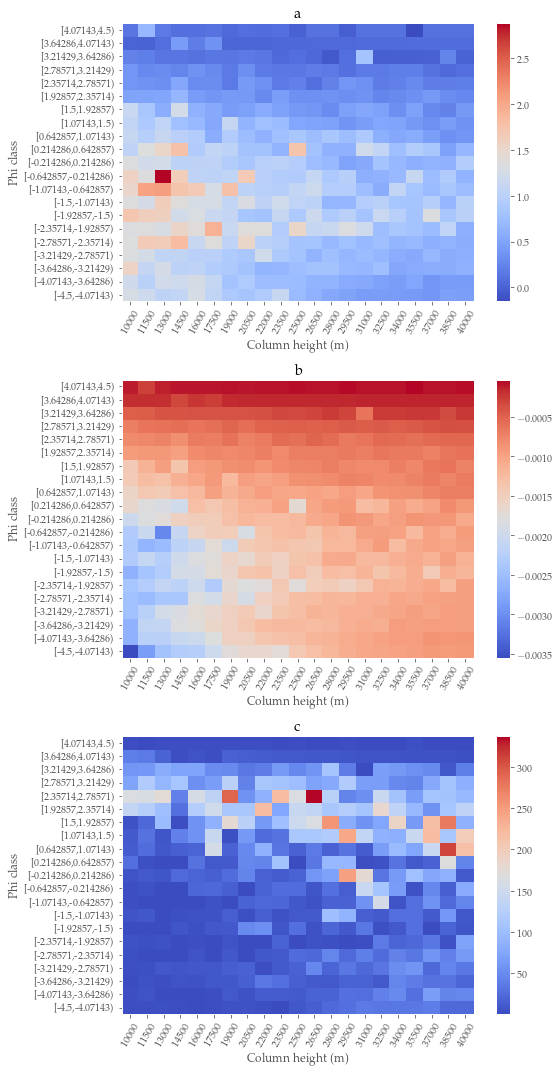

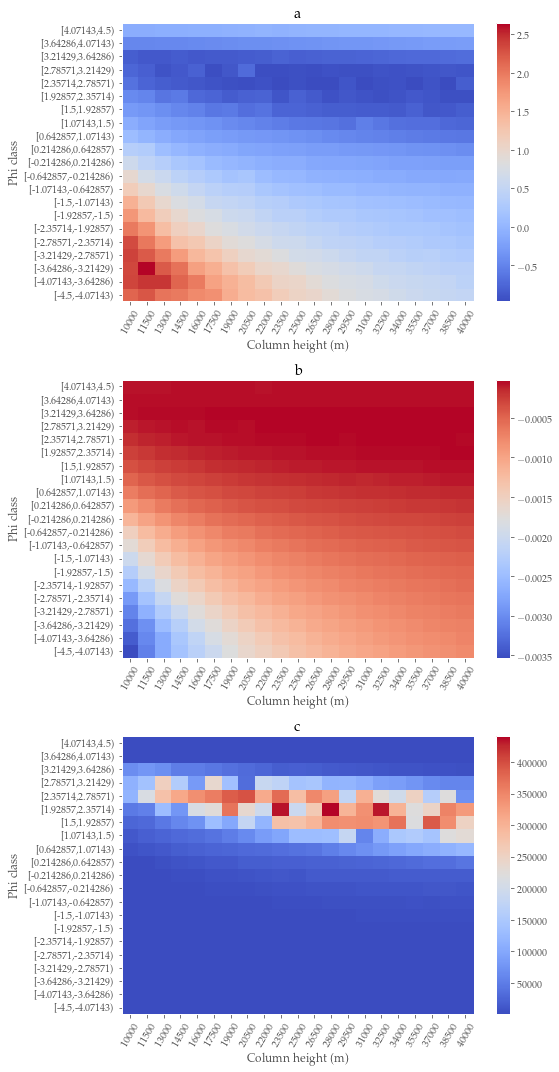

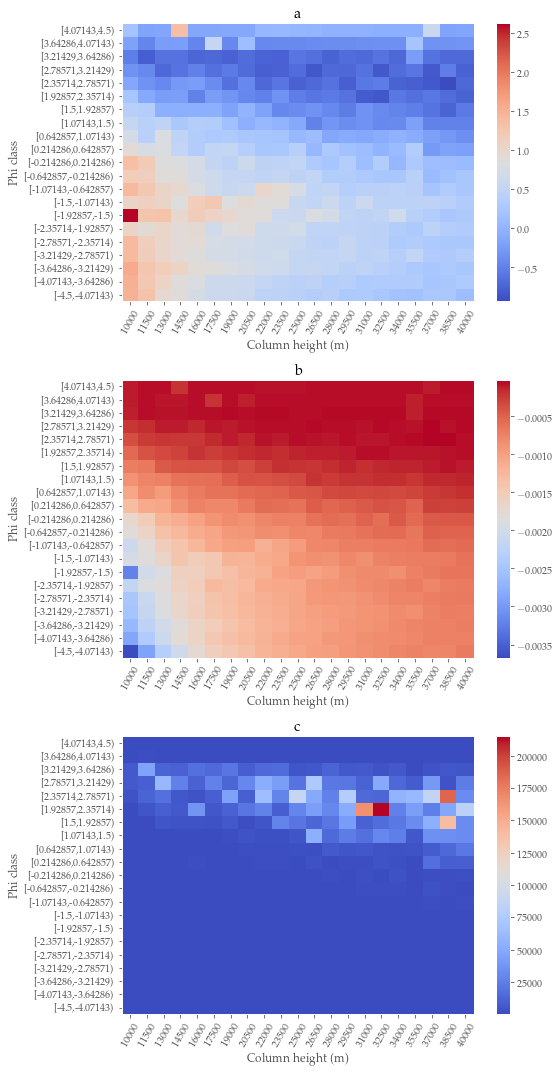

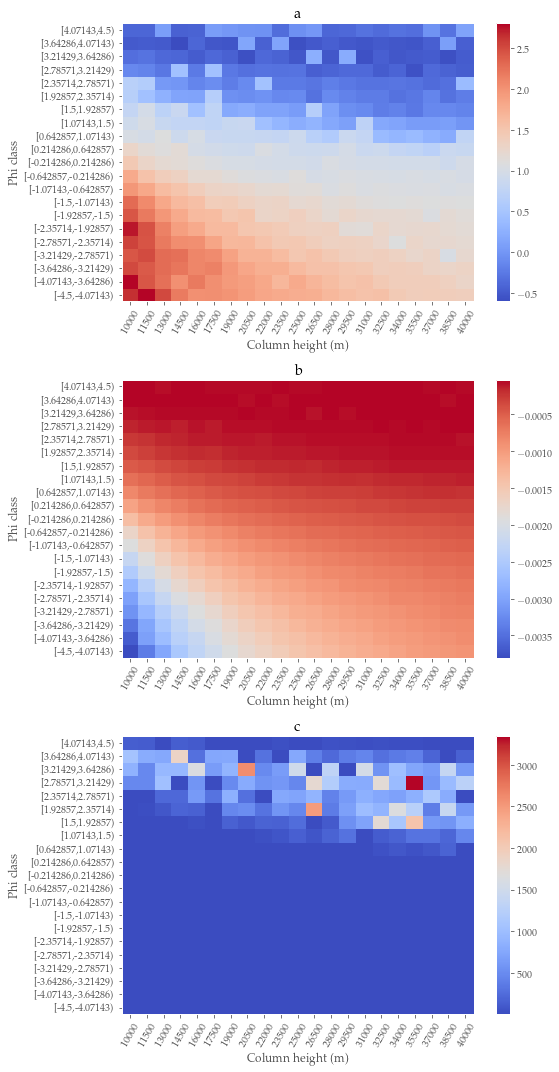

In [17]:
for df, tit in zip([w_gk_df, w_lgk_df, uw_gk_df, uw_lgk_df], ["Weighted Gamma Kernel", "Weighted Log-Gamma Kernel", "Unweighted Gamma Kernel", "Unweighted Log-Gamma Kernel"]):
    a_piv = df.pivot_table(index='Phi', columns='H', values='a')
    b_piv = df.pivot_table(index='Phi', columns='H', values='b')
    c_piv = df.pivot_table(index='Phi', columns='H', values='c')
    a_piv = a_piv.reindex(phis)
    b_piv = b_piv.reindex(phis)
    c_piv = c_piv.reindex(phis)

    print(tit)
    fig, axs = plt.subplots(3, 1, figsize=(
        8, 15), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    for i, piv, p in zip([0, 1, 2], [a_piv, b_piv, c_piv], ['a', 'b', 'c']):
        c = axs[i].pcolor(piv.values, cmap='coolwarm')
        # cont = axs[i].contour(scipy.ndimage.zoom(piv.values, 3), colors='w')
        axs[i].set_yticks(np.arange(0.5, len(piv.index), 1))
        axs[i].set_yticklabels(piv.index)
        axs[i].set_xticks(np.arange(0.5, len(piv.columns), 1))
        axs[i].set_xticklabels(piv.columns, rotation=60)
        fig.colorbar(c, ax=axs[i])
        axs[i].grid(False)
        axs[i].set_title(p)
        # axs[i].clabel(cont, inline=1, fontsize=10)
        axs[i].set_xlabel("Column height (m)")
        axs[i].set_ylabel("Phi class")
    # plt.locator_params(nbins=7)
    plt.tight_layout()
    plt.savefig("../data/%s_trial_%d/param_maps_cont_weights%s.png" %
                (param, trial, tit), format='png')

In [48]:
cf = ["%.2f" % c for c in centroids]
cf

['-4.29',
 '-3.86',
 '-3.43',
 '-3.00',
 '-2.57',
 '-2.14',
 '-1.71',
 '-1.29',
 '-0.86',
 '-0.43',
 '0.00',
 '0.43',
 '0.86',
 '1.29',
 '1.71',
 '2.14',
 '2.57',
 '3.00',
 '3.43',
 '3.86',
 '4.29']

In [64]:
def pivot_map(piv):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    X = np.tile(piv.columns.values, (len(piv.columns.values),1))
    Y = np.tile(np.arange(len(piv.index)), (len(piv.index),1)).T
    Z = piv.values
    ax.plot_surface(X, Y, Z, cmap='coolwarm')
    ax.set_xlabel("Column Height (km)")
    ax.set_yticks(np.arange(0.5, len(piv.index), 1))
    ax.set_yticklabels(cf, rotation=-40)
    ax.set_ylabel(r"$\phi$")
    ax.view_init(azim=-25)

In [65]:
pivot_map(a_piv)
plt.title("a")
plt.savefig("../data/%s_trial_%d/param_maps_a_surf.png" %
            (param, trial), format='png')

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [83]:
pivot_map(-b_piv)
plt.title("-b")
plt.savefig("../data/%s_trial_%d/param_maps_b_surf.png" %
            (param, trial), format='png')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [67]:
pivot_map(c_piv)
plt.title("c")
plt.savefig("../data/%s_trial_%d/param_maps_c_surf.png" %
            (param, trial), format='png')

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [132]:
plt.close("all")

In [119]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), facecolor='w', edgecolor='k', sharey=True)
for i, (k, p) in enumerate(a_piv.T.iterrows()): 
    ax1.plot(p.index, p.values, color=plt.cm.coolwarm(i**2))
ax1.set_title("Grain size vs parameter $a$")
ax1.set_xticks(np.arange(0.5, len(piv.index), 1))
ax1.set_xticklabels(cf, rotation=-50)
ax1.set_ylabel("$a$")
ax1.set_xlabel("$\phi$ centroid")
for i, (k, p) in enumerate(a_piv.iterrows()): 
    c = ax2.plot(p.index, p.values, color=plt.cm.coolwarm(i**2))
ax2.set_title("Column Height vs parameter $a$")
ax2.set_xlabel("Column Height (m)")
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/param_maps_a_lines.png" %
            (param, trial), format='png')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [118]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), facecolor='w', edgecolor='k', sharey=True)
for i, (k, p) in enumerate(b_piv.T.iterrows()): 
    ax1.plot(p.index, -p.values, color=plt.cm.coolwarm(i**2))
ax1.set_title("Grain size vs parameter $-b$")
ax1.set_xticks(np.arange(0.5, len(piv.index), 1))
ax1.set_xticklabels(cf, rotation=-50)
ax1.set_ylabel("$-b$")
ax1.set_xlabel("$\phi$ centroid")
for i, (k, p) in enumerate(b_piv.iterrows()): 
    c = ax2.plot(p.index, -p.values, color=plt.cm.coolwarm(i**2))
ax2.set_title("Column Height vs parameter $-b$")
ax2.set_xlabel("Column Height (m)")
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/param_maps_b_lines.png" %
            (param, trial), format='png')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [117]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), facecolor='w', edgecolor='k', sharey=True)
for i, (k, p) in enumerate(c_piv.T.iterrows()): 
    ax1.plot(p.index, p.values, color=plt.cm.coolwarm(i**2))
ax1.set_title("Grain size vs parameter $c$")
ax1.set_xticks(np.arange(0.5, len(piv.index), 1))
ax1.set_xticklabels(cf, rotation=-50)
ax1.set_ylabel("$c$")
ax1.set_xlabel("$\phi$ centroid")
for i, (k, p) in enumerate(c_piv.iterrows()): 
    c = ax2.plot(p.index, p.values, color=plt.cm.coolwarm(i**2))
ax2.set_title("Column Height vs parameter $c$")
ax2.set_xlabel("Column Height (m)")
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/param_maps_c_lines.png" %
            (param, trial), format='png')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [136]:
entry = fit_df[(fit_df.Phi == phis[-1])]
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=True, sharey=True)
axs = axs.ravel()
for i, (k, en) in enumerate(entry.iterrows()):
    a = en.a
    b = en.b
    c = en.c
    x = en['data'][0]
    y = en['data'][1]
    xf = np.linspace(x.min(), x.max(), 100)
    yf = gamma_kernel(xf, a, b, c)
    axs[i].plot(xf, yf, 'k', lw=1)
    axs[i].scatter(x, y, s=5, facecolors='none', edgecolors='r', label=r'$H$ = %s km' % str(disp_func(en.H)))
    axs[i].legend()
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/anomaly_phi_last.pdf" %
            (param, trial), format='pdf')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [137]:
entry = fit_df[(fit_df.Phi == phis[-2])]
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=True, sharey=True)
axs = axs.ravel()
for i, (k, en) in enumerate(entry.iterrows()):
    a = en.a
    b = en.b
    c = en.c
    x = en['data'][0]
    y = en['data'][1]
    xf = np.linspace(x.min(), x.max(), 100)
    yf = gamma_kernel(xf, a, b, c)
    axs[i].plot(xf, yf, 'k', lw=1)
    axs[i].scatter(x, y, s=5, facecolors='none', edgecolors='r', label=r'$H$ = %s km' % str(disp_func(en.H)))
    axs[i].legend()
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/anomaly_phi_penum.pdf" %
            (param, trial), format='pdf')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [138]:
entry = fit_df[(fit_df.Phi == phis[0])]
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=True, sharey=True)
axs = axs.ravel()
for i, (k, en) in enumerate(entry.iterrows()):
    a = en.a
    b = en.b
    c = en.c
    x = en['data'][0]
    y = en['data'][1]
    xf = np.linspace(x.min(), x.max(), 100)
    yf = gamma_kernel(xf, a, b, c)
    axs[i].plot(xf, yf, 'k', lw=1)
    axs[i].scatter(x, y, s=5, facecolors='none', edgecolors='r', label=r'$H$ = %s km' % str(disp_func(en.H)))
    axs[i].legend()
plt.tight_layout()

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [139]:
entry = fit_df[(fit_df.H == 10000)]
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=True, sharey=True)
axs = axs.ravel()
for i, (k, en) in enumerate(entry.iterrows()):
    a = en.a
    b = en.b
    c = en.c
    x = en['data'][0]
    y = en['data'][1]
    xf = np.linspace(x.min(), x.max(), 100)
    yf = gamma_kernel(xf, a, b, c)
    axs[i].plot(xf, yf, 'k', lw=1)
    axs[i].scatter(x, y, s=5, facecolors='none', edgecolors='r', label=r'$\phi \in %s$' % en.Phi)
    axs[i].legend()
plt.tight_layout()
plt.savefig("../data/%s_trial_%d/anomaly_H_outlier.pdf" %
            (param, trial), format='pdf')

FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [193]:
piv = -b_piv

In [304]:
def lognorm(x, mu, sig):
    return np.exp(((-np.log(x) - mu)**2)/(2*sig**2))

def logit(x, a, b):
    return ((b/a)*(x/a)**(b-1))/((1+((x/a)**b)**2))

def sigmoid(x, A, B):
    return A/(1+np.exp(B*x))

def lnsse(k, x_data, y_data):
    return sum((y_data - (lognorm(x_data, *k))) ** 2)

In [315]:
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=True, sharey=True)
axs = axs.ravel()
for i, (k, row) in enumerate(piv.T.iterrows()):
    bins = np.linspace(0,1,len(centroids))
    x_vals = row.values/row.values.max()
    def lnfun(k): return lnsse(k, bins, x_vals)
    k0 = np.array([-10,0.2], dtype=np.float64)
    popt = minimize(lnfun, k0)
    display(popt)
    xf = np.linspace(0,1, 100)
    yf = lognorm(xf, *popt.x)
    axs[i].plot(bins, x_vals, 'r')
    axs[i].plot(xf, yf, 'b')
#     axs[i].set_xticklabels([])
plt.tight_layout()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


FigureCanvasNbAgg()

c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
c:\users\nmostert\envs\spew\lib\site-packages\scipy\optimize\optimize.py:663: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
c:\users\nmostert\envs\spew\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

      fun: inf
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([nan, nan])
  message: 'Optimization terminated successfully.'
     nfev: 4
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([-10. ,   0.2])

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


In [111]:
plt.close("all")

In [266]:
fig, axs = plt.subplots(7, 3, figsize=(
    8, 12), facecolor='w', edgecolor='k', sharex=False, sharey=False)
axs = axs.ravel()
for i, (k, row) in enumerate(piv.T.iterrows()):
    bins = np.linspace(0,1,len(centroids))
    restored = [np.abs(c*v)+0.001 for c, v in zip(bins, row.values)]
    fit = stats.logistic.fit(restored, floc=0)
    print(fit)
    dist = stats.logistic(*stats.logistic.fit(restored, floc=0))
    x = bins
    y = dist.pdf(x)
    axs[i].plot(x,y,'b',linewidth=2)
    axs[i].plot(bins,row.values,'r',linewidth=2)
plt.show()

FigureCanvasNbAgg()

(0, 0.0008023725338173836)
(0, 0.000777491810171336)
(0, 0.0007587430606621645)
(0, 0.0007439444398098753)
(0, 0.0007350620091296466)
(0, 0.0007245712546956714)
(0, 0.0007198924594941736)
(0, 0.0007145124756940395)
(0, 0.0007087654783824154)
(0, 0.0007055621874387898)
(0, 0.0007031879147401223)
(0, 0.0007010500658831251)
(0, 0.0006968092656446778)
(0, 0.0006951006267295219)
(0, 0.000691486771420435)
(0, 0.0006896949528318107)
(0, 0.0006880268285038701)
(0, 0.000685757007840068)
(0, 0.0006874028645025569)
(0, 0.0006853325449860314)
(0, 0.0006828185850633944)


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
